In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import seaborn as sns
from matplotlib.gridspec import GridSpec
import scanpy as sc
import muon as mu
import graphtools
import magic
from matplotlib.pyplot import rc_context
from matplotlib import gridspec
import os


from datashader.mpl_ext import dsshow
import datashader as ds

import matplotlib.colors
cmap = plt.cm.hsv
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist = cmaplist[0:round(len(cmaplist)*0.7)]
cmaplist.reverse()
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('', cmaplist, cmap.N)

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

import sys
sys.path.append('../../../Code/')
from utils import read_dataset_log


/PHShome/mc1070/anaconda3/envs/cnmf_env2v2/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from matplotlib import rcParams, font_manager
import matplotlib


rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

In [3]:
figdir = '../../../Figures/Components'

In [4]:
harmony_vars = ['Institute', 'Source', 'COMBAT_participant_timepoint_ID']

In [5]:
params = read_dataset_log('Dataset Paths')
params.index = params['dataset']
params

dataset                                           usage_fn  \
dataset                                                                       
AMP-RA            AMP-RA  /data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....   
Pan-Cancer    Pan-Cancer  /data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...   
TBRU                TBRU  /data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...   
HIV-Vaccine  HIV-Vaccine  /data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...   
UK-Covid        UK-Covid  /data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...   
COMBAT            COMBAT  /data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...   
Pan-Tissue    Pan-Tissue  /data/srlab1/TCAT/Data/PerDataset/XTissueImmun...   
Sparks            Sparks                                                NaN   
Stimseq          Stimseq                                                NaN   

                                                gene_scores_fn  \
dataset                                                          
AMP-RA       /data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....   
Pan-Cancer   /data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...   
TBRU         /data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...   
HIV-Vaccine  /data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...   
UK-Covid     /data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...   
COMBAT       /data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...   
Pan-Tissue   /data/srlab1/TCAT/Data/PerDataset/XTissueImmun...   
Sparks                                                     NaN   
Stimseq                                                    NaN   

                                                   gene_tpm_fn  \
dataset                                                          
AMP-RA       /data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....   
Pan-Cancer   /data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...   
TBRU         /data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...   
HIV-Vaccine  /data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...   
UK-Covid     /data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...   
COMBAT       /data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...   
Pan-Tissue   /data/srlab1/TCAT/Data/PerDataset/XTissueImmun...   
Sparks                                                     NaN   
Stimseq                                                    NaN   

                                                       tcat_fn  \
dataset                                                          
AMP-RA       /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
Pan-Cancer   /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
TBRU         /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
HIV-Vaccine  /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
UK-Covid     /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
COMBAT       /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
Pan-Tissue   /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
Sparks       /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
Stimseq      /data/srlab1/TCAT/Data/PerDataset/Stimseq/TCAT...   

                                        tcat_fn_withsingletons  \
dataset                                                          
AMP-RA       /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
Pan-Cancer   /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
TBRU         /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
HIV-Vaccine  /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
UK-Covid     /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
COMBAT       /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
Pan-Tissue   /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
Sparks                                                     NaN   
Stimseq                                                    NaN   

                                              manual_gating_fn  \
dataset                                                          
AMP-RA                                                     NaN   
Pan-Cancer                               

Kaitlyn's defining CM/EM 

for CCA integrating RNA and protein, I used:

```prots_inc = c("AB_CD27", "AB_CD11a", "AB_CX3CR1", "AB_KLRG1_MAFA", "AB_CD4", "AB_CD8", "AB_CD45RO", "AB_CD45RA", "AB_CD197_CCR7", "AB_CD62L")```

then, I clustered cells on that embedding and used CD62L, CCR7, and CD27 to distinguish CM from EM

# Prepare markers

In [6]:
raw_counts_fn = '/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBAT-CITESeq-DATA.Raw.T.ADTfixed.h5ad'

In [14]:
outdir = '../../../Data/PerDataset/COMBAT'

In [40]:
adata = sc.read(raw_counts_fn)
# adata.obs['frac_ADT'] = adata.obs['nCount_ADT'] / (adata.obs['nCount_ADT'] + adata.obs['nCount_RNA'])
ind = adata.var['feature_types']=='Antibody Capture'

Only considering the two last: ['.ADTfixed', '.h5ad'].
Only considering the two last: ['.ADTfixed', '.h5ad'].


In [ ]:
adata_RNA = adata[:,~ind].copy()
sc.pp.highly_variable_genes(adata_RNA, flavor='seurat_v3', n_top_genes=2000)
sc.pp.normalize_per_cell(adata_RNA, counts_per_cell_after=1e4)
sc.pp.log1p(adata_RNA)
sc.pp.scale(adata_RNA, zero_center=False)
sc.tl.pca(adata_RNA, use_highly_variable=True, zero_center=True)
sc.pl.pca_variance_ratio(adata_RNA, log=True, n_pcs=50)

In [53]:
sc.external.pp.harmony_integrate(adata_RNA,  harmony_vars, max_iter_harmony = 30)


2023-08-31 12:03:02,041 - harmonypy - INFO - Iteration 1 of 30
2023-08-31 12:10:03,277 - harmonypy - INFO - Iteration 2 of 30
2023-08-31 12:16:52,673 - harmonypy - INFO - Iteration 3 of 30
2023-08-31 12:23:21,159 - harmonypy - INFO - Iteration 4 of 30
2023-08-31 12:29:55,480 - harmonypy - INFO - Iteration 5 of 30
2023-08-31 12:35:04,763 - harmonypy - INFO - Iteration 6 of 30
2023-08-31 12:38:39,041 - harmonypy - INFO - Iteration 7 of 30
2023-08-31 12:41:54,425 - harmonypy - INFO - Iteration 8 of 30
2023-08-31 12:45:31,187 - harmonypy - INFO - Converged after 8 iterations


In [54]:
sc.pp.neighbors(adata_RNA, n_neighbors=5, n_pcs=39, use_rep='X_pca_harmony')

In [428]:
outfn = os.path.join(outdir, 'RNA_logTP1K_ForMAGIC.h5ad')
print(outfn)

../../../Data/PerDataset/COMBAT/RNA_logTP1K_ForMAGIC.h5ad


In [56]:
adata_RNA.write(outfn)

In [429]:
adata_RNA = sc.read(outfn)

Neighbors function kills kernel. Return to whatever this environment issue is later if necessary.

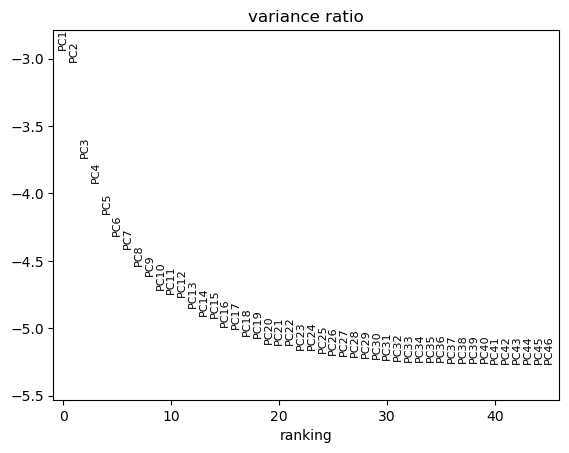

In [57]:
adata_ADT = adata[:,ind].copy()
sc.pp.normalize_per_cell(adata_ADT, counts_per_cell_after=1e4)
Z = adata_ADT.X.todense()
Z[Z==0] = np.nan
gmean = np.exp(np.nansum(np.log(Z+1), axis=1) / Z.shape[1])
Z = np.log((Z / gmean) + 1)
Z[np.isnan(Z)]=0
adata_ADT.X = np.array(Z)

sc.pp.scale(adata_ADT, zero_center=False, max_value=15)

sc.tl.pca(adata_ADT, zero_center=True)
sc.pl.pca_variance_ratio(adata_ADT, log=True, n_pcs=45)

In [58]:
sc.external.pp.harmony_integrate(adata_ADT,  harmony_vars, max_iter_harmony = 30)

2023-08-31 13:18:33,227 - harmonypy - INFO - Iteration 1 of 30
2023-08-31 13:25:42,379 - harmonypy - INFO - Iteration 2 of 30
2023-08-31 13:33:14,047 - harmonypy - INFO - Iteration 3 of 30
2023-08-31 13:39:05,734 - harmonypy - INFO - Iteration 4 of 30
2023-08-31 13:42:55,125 - harmonypy - INFO - Iteration 5 of 30
2023-08-31 13:48:08,531 - harmonypy - INFO - Converged after 5 iterations


In [59]:
sc.pp.neighbors(adata_ADT, n_neighbors=5, n_pcs=44, use_rep='X_pca_harmony')

In [12]:
outfn = os.path.join(outdir, 'ADT_TP10KCLR_ForMAGIC.h5ad')
print(outfn)

../../../Data/PerDataset/COMBAT/ADT_TP10KCLR_ForMAGIC.h5ad


In [62]:
adata_ADT.write(outfn)

In [421]:
adata_ADT = sc.read(outfn)

In [13]:
rna_markers = ['TRAC', 'TRGC1', 'TRDC', 'TRBC1', 'IL2RA', 'FOXP3', 'SELL', 'CCR7', 'KLRB1', 'RTKN2', 'IL7R', 'PASK', 'GATA3',
               'CCR4', 'STAT1', 'IRF4', 'TBX21', 'IFNG', 'CCR5', 'CXCR3', 'CCR6', 'CCL20', 'IL4R', 'IL4', 'STAT4',  'STAT6',  'CCR1', 'IL10',
               'IL17B', 'IL17A', 'IL17F', 'IL17D', 'IL17C', 'RORC', 'RORA', 'STAT3']

In [566]:
set(rna_markers) - set(adata_RNA.var.index)

set()

In [14]:
adt_markers = ['AB_CD3-1', 'AB_CD4-2',
               'AB_CD8', 'AB_CD45RA', 'AB_CD45RO',  'AB_CD18', 'AB_CD161',  'AB_CD194', 'AB_CD195', 'AB_CD196', 'AB_CXCR3',
               'AB_CD25', 'AB_CD127', 
               'AB_CD27-1',
               'AB_TCR-Vd2', 'AB_TCR-V-7.2', 'AB_TCR-V-9', 'AB_abTCR', 'AB_gdTCR',
               'AB_CD31', 'AB_CD62L', 'AB_CCR7',
               'AB_CD314',
               'AB_CD38-1', 'AB_CD39',
              'AB_CD94', 'AB_CD49b', 'AB_CD28'] 

In [568]:
sorted(adata_ADT.var.index)

['AB_B7-H4',
 'AB_CCR3',
 'AB_CCR7',
 'AB_CD10',
 'AB_CD101',
 'AB_CD103',
 'AB_CD106',
 'AB_CD107a',
 'AB_CD112',
 'AB_CD117',
 'AB_CD11a',
 'AB_CD11b-1',
 'AB_CD11c',
 'AB_CD122',
 'AB_CD123',
 'AB_CD124',
 'AB_CD127',
 'AB_CD133-2',
 'AB_CD137',
 'AB_CD137L',
 'AB_CD138-2',
 'AB_CD14-1',
 'AB_CD141',
 'AB_CD144',
 'AB_CD146',
 'AB_CD15',
 'AB_CD150',
 'AB_CD152',
 'AB_CD154',
 'AB_CD155',
 'AB_CD158',
 'AB_CD158b',
 'AB_CD158e1',
 'AB_CD158f',
 'AB_CD16',
 'AB_CD161',
 'AB_CD163',
 'AB_CD169',
 'AB_CD178',
 'AB_CD18',
 'AB_CD184',
 'AB_CD185',
 'AB_CD19',
 'AB_CD194',
 'AB_CD195',
 'AB_CD196',
 'AB_CD1a',
 'AB_CD1c',
 'AB_CD1d',
 'AB_CD2',
 'AB_CD20',
 'AB_CD204',
 'AB_CD206',
 'AB_CD207',
 'AB_CD209',
 'AB_CD21',
 'AB_CD22',
 'AB_CD223',
 'AB_CD224',
 'AB_CD226-2',
 'AB_CD23',
 'AB_CD235ab',
 'AB_CD24',
 'AB_CD244',
 'AB_CD25',
 'AB_CD252',
 'AB_CD254',
 'AB_CD257',
 'AB_CD258',
 'AB_CD26',
 'AB_CD267',
 'AB_CD268',
 'AB_CD269',
 'AB_CD27-1',
 'AB_CD272',
 'AB_CD273',
 'AB_CD274',


In [569]:
set(adt_markers) - set(adata_ADT.var.index)

set()

In [570]:
adt_markers = list(set(adt_markers).intersection(adata_ADT.var.index))

In [571]:
G = graphtools.Graph(data=adata_RNA.obsp['connectivities'], precomputed='affinity')
magic_operator = magic.MAGIC(t=3)
magic_operator.fit(adata_RNA.X, graph=G)
markers_magic = magic_operator.transform(X=adata_RNA[:, rna_markers].X)
markers_magic = pd.DataFrame(markers_magic, index=adata_RNA.obs.index, columns=rna_markers)

Running MAGIC on 400925 cells and 20615 genes.


/PHShome/dk718/miniforge3/envs/cnmf_env/lib/python3.9/site-packages/graphtools/base.py:553: RuntimeWarning: K should have a non-zero diagonal
  warnings.warn("K should have a non-zero diagonal", RuntimeWarning)


Using precomputed graph and diffusion operator...


/PHShome/dk718/.local/lib/python3.9/site-packages/magic/magic.py:425: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn(


Calculating imputation...


/PHShome/dk718/.local/lib/python3.9/site-packages/magic/magic.py:541: UserWarning: Running MAGIC.transform on different data to that which was used for MAGIC.fit may not produce sensible output, unless it comes from the same manifold.
  warnings.warn(


Calculated imputation in 0.84 seconds.


In [572]:
G = graphtools.Graph(data=adata_ADT.obsp['connectivities'], precomputed='affinity')
magic_operator = magic.MAGIC(t=3)
magic_operator.fit(adata_ADT.X, graph=G)
markers_magic_adt = magic_operator.transform(X=adata_ADT[:, adt_markers].X)
markers_magic_adt = pd.DataFrame(markers_magic_adt, index=adata_ADT.obs.index, columns=adt_markers)

Running MAGIC on 400925 cells and 192 genes.
Using precomputed graph and diffusion operator...


/PHShome/dk718/miniforge3/envs/cnmf_env/lib/python3.9/site-packages/graphtools/base.py:553: RuntimeWarning: K should have a non-zero diagonal
  warnings.warn("K should have a non-zero diagonal", RuntimeWarning)


Calculating imputation...


/PHShome/dk718/.local/lib/python3.9/site-packages/magic/magic.py:541: UserWarning: Running MAGIC.transform on different data to that which was used for MAGIC.fit may not produce sensible output, unless it comes from the same manifold.
  warnings.warn(


Calculated imputation in 0.78 seconds.


In [573]:
for g in adt_markers:
    markers_magic[g] = markers_magic_adt[g]
    
# markers_magic['frac_ADT'] = adata.obs['frac_ADT']

In [15]:
outfn = os.path.join(outdir, 'ManualGating.MagicMarker.RNA_LogTP10KADT.ADT_CLRTP10K.tsv')
print(outfn)

../../../Data/PerDataset/COMBAT/ManualGating.MagicMarker.RNA_LogTP10KADT.ADT_CLRTP10K.tsv


In [575]:
markers_magic.to_csv(outfn, sep='\t')

In [16]:
markers_magic = pd.read_csv(outfn, sep='\t', index_col=0)

In [17]:
markers_magic.head()

TRAC     TRGC1      TRDC     TRBC1     IL2RA  \
AAACCTGAGCGGATCA-1-gPlexA1  0.671785  0.152742  0.066597  0.984844  0.081388   
AAACCTGCAGCTCGAC-1-gPlexA1  0.806843  0.000616  0.010191  0.611282  0.285519   
AAACCTGCATCTATGG-1-gPlexA1  0.732119  0.078640  0.039951  0.785795  0.000000   
AAACCTGGTCTCTCTG-1-gPlexA1  0.683763  0.023016  0.008670  0.754012  0.173426   
AAACCTGTCACCGGGT-1-gPlexA1  0.856858  0.407762  0.226991  0.992482  0.000000   

                               FOXP3      SELL      CCR7     KLRB1     RTKN2  \
AAACCTGAGCGGATCA-1-gPlexA1  0.000000  0.289349  0.006257  0.852988  0.000156   
AAACCTGCAGCTCGAC-1-gPlexA1  0.019913  1.043739  0.637578  1.034146  0.216537   
AAACCTGCATCTATGG-1-gPlexA1  0.000000  0.743849  0.274476  0.189331  0.018344   
AAACCTGGTCTCTCTG-1-gPlexA1  0.017443  1.665534  1.315669  0.164243  0.135068   
AAACCTGTCACCGGGT-1-gPlexA1  0.047988  0.366300  0.019988  0.658039  0.310168   

                            ...  AB_CD4-2   AB_CD31   AB_CD18  AB_CD127  \
AAACCTGAGCGGATCA-1-gPlexA1  ...  0.522200  1.308746  3.308349  1.312492   
AAACCTGCAGCTCGAC-1-gPlexA1  ...  2.600563  0.927331  2.565782  3.057368   
AAACCTGCATCTATGG-1-gPlexA1  ...  1.910935  1.219310  3.257366  2.447848   
AAACCTGGTCTCTCTG-1-gPlexA1  ...  2.577428  0.781459  2.419437  2.967827   
AAACCTGTCACCGGGT-1-gPlexA1  ...  0.351156  2.392427  2.833467  0.875060   

                            AB_CXCR3  AB_CD194  AB_CD3-1    AB_CD8  AB_CD49b  \
AAACCTGAGCGGATCA-1-gPlexA1  2.735864  0.694457  4.885272  2.325313  0.622996   
AAACCTGCAGCTCGAC-1-gPlexA1  3.145195  0.970410  5.939430  0.283295  0.611673   
AAACCTGCATCTATGG-1-gPlexA1  2.978127  0.759889  5.104322  0.941336  0.894790   
AAACCTGGTCTCTCTG-1-gPlexA1  2.859445  1.093883  5.731300  0.227843  0.435720   
AAACCTGTCACCGGGT-1-gPlexA1  2.848267  0.674181  5.000405  2.054223  0.880324   

                            AB_CD62L  
AAACCTGAGCGGATCA-1-gPlexA1  1.155068  
AAACCTGCAGCTCGAC-1-gPlexA1  2.212586  
AAACCTGCATCTATGG-1-gPlexA1  1.189908  
AAACCTGGTCTCTCTG-1-gPlexA1  1.788838  
AAACCTGTCACCGGGT-1-gPlexA1  1.033097  

[5 rows x 64 columns]

In [578]:
unsmoothed_markers = pd.DataFrame(np.concatenate([adata_RNA[:, rna_markers].X.toarray(), np.array(adata_ADT[:, adt_markers].X)], axis=1), index=adata_RNA.obs.index,
             columns=(rna_markers+adt_markers))

In [338]:
outfn = os.path.join(outdir, 'ManualGating.UnsmoothedMarker.RNA_LogTP10KADT.ADT_CLRTP10K.tsv')
print(outfn)

../../../Data/PerDataset/COMBAT/ManualGating.UnsmoothedMarker.RNA_LogTP10KADT.ADT_CLRTP10K.tsv


In [580]:
unsmoothed_markers.to_csv(outfn, sep='\t')

In [341]:
unsmoothed_markers = pd.read_csv(outfn, sep='\t', index_col=0)

In [581]:
markers = list(markers_magic.columns)

# Protein-RNA correlations

In [18]:
from scipy.stats import pearsonr

In [481]:
prot_pairs = [('CCR7', 'AB_CCR7'),
              ('CCR4', 'AB_CD194'),
              ('CCR6', 'AB_CD196'),
             ('CXCR3', 'AB_CXCR3'), 
              ('SELL', 'AB_CD62L'),
             ('IL2RA', 'AB_CD25'),
             ('FOXP3', 'AB_CD25'),
             ('TRDC', 'AB_gdTCR'),
             ('TRDC', 'AB_abTCR')]

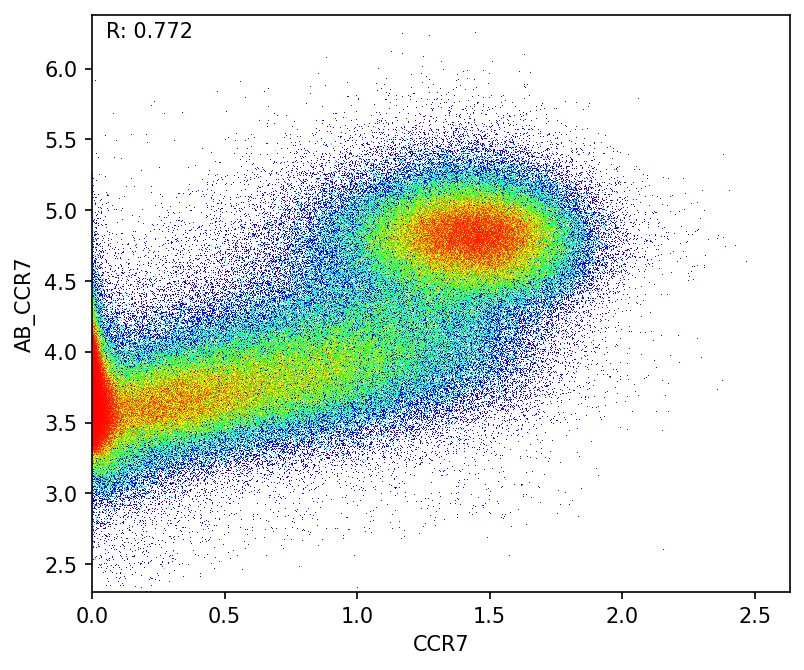

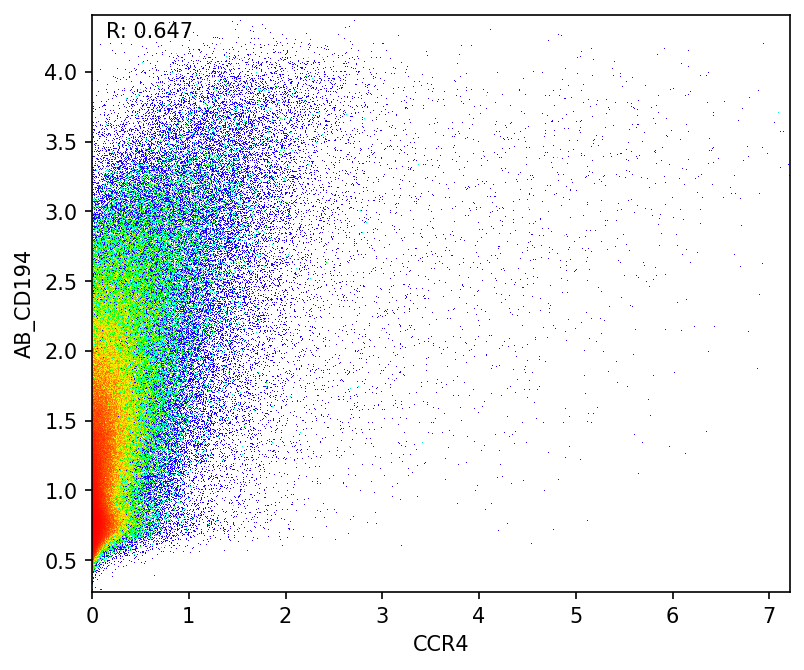

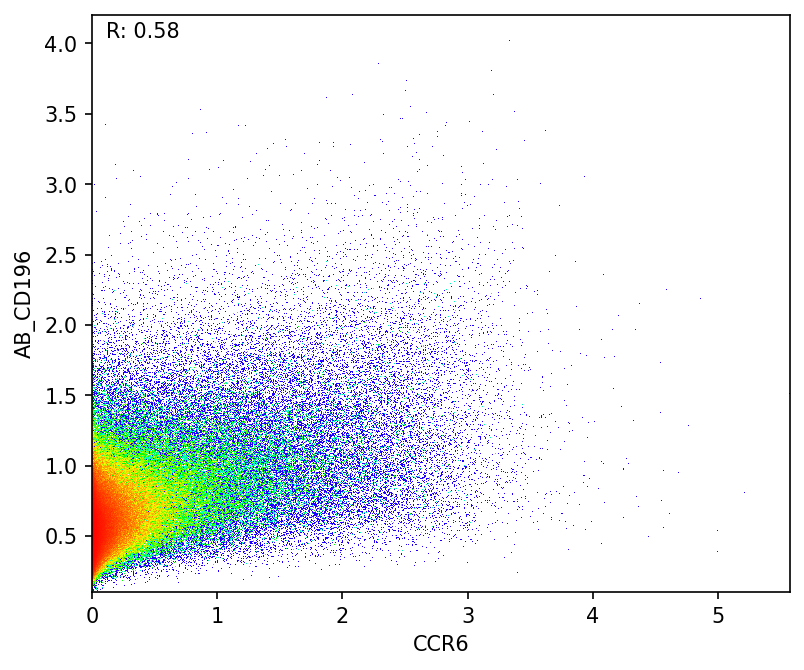

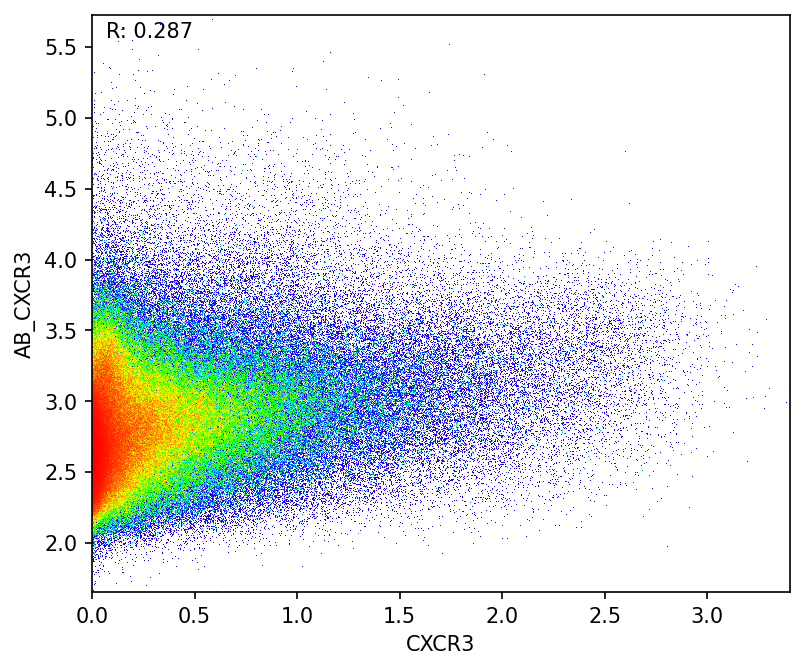

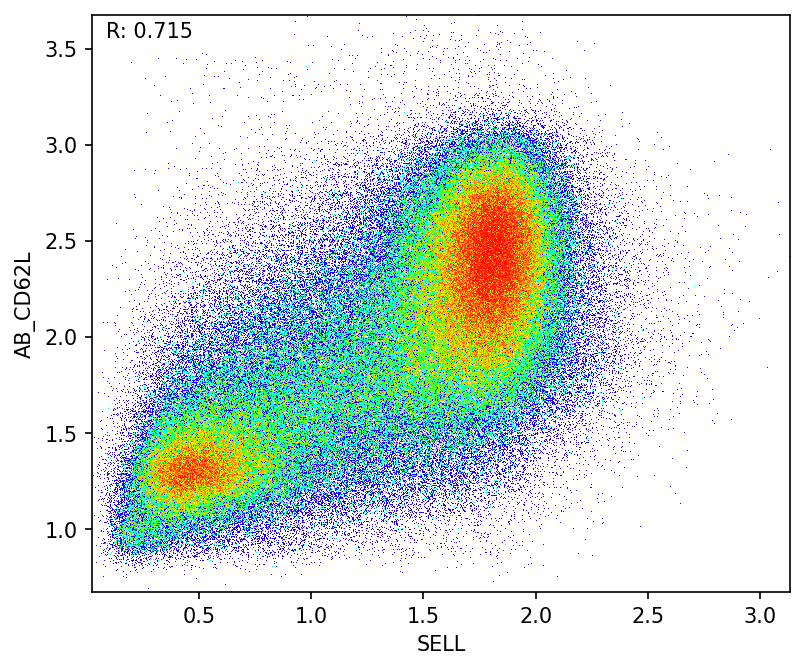

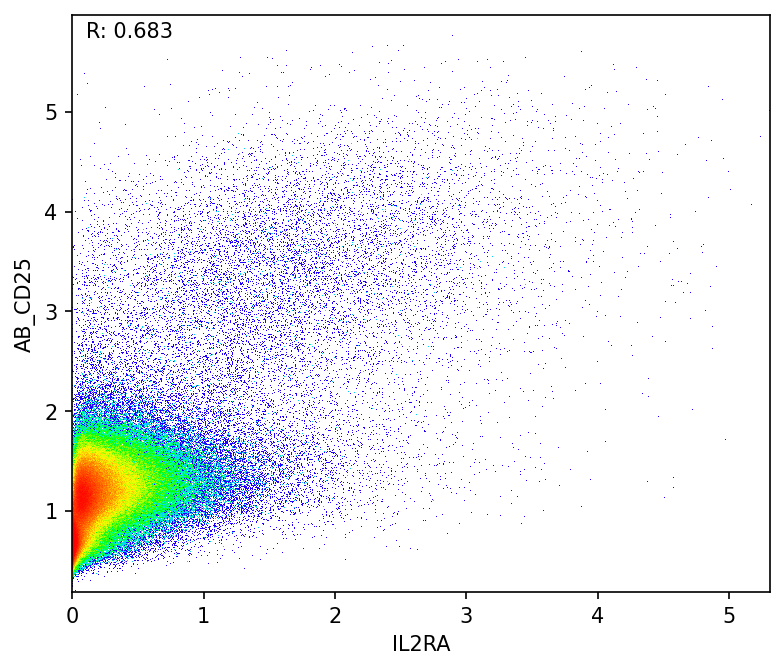

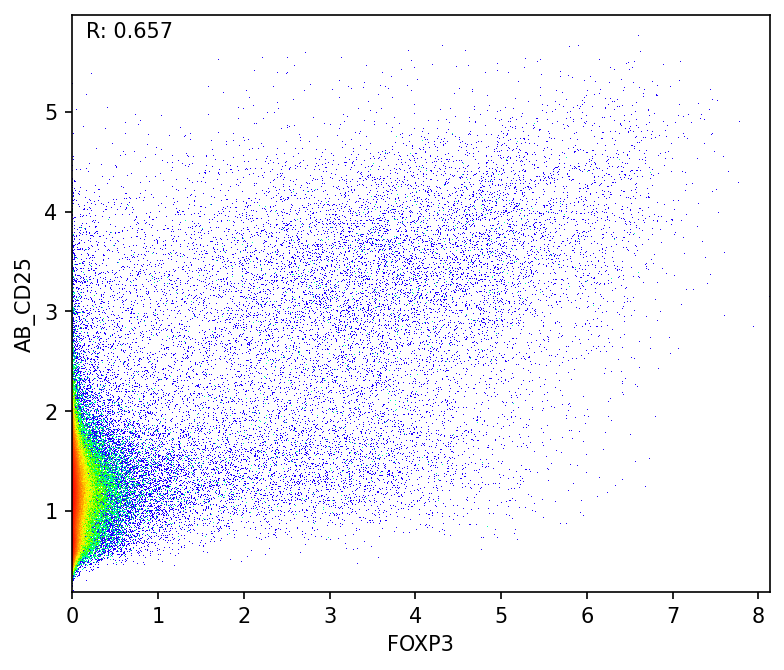

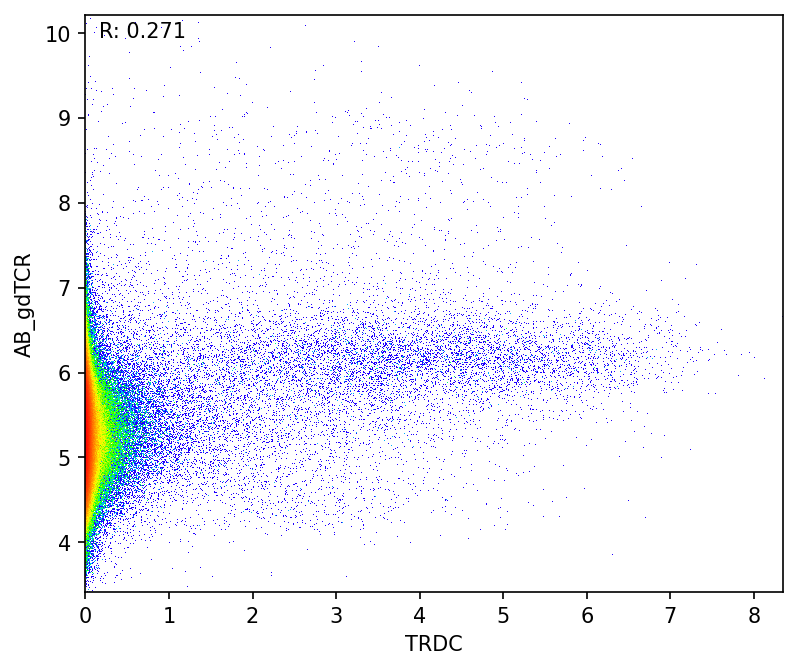

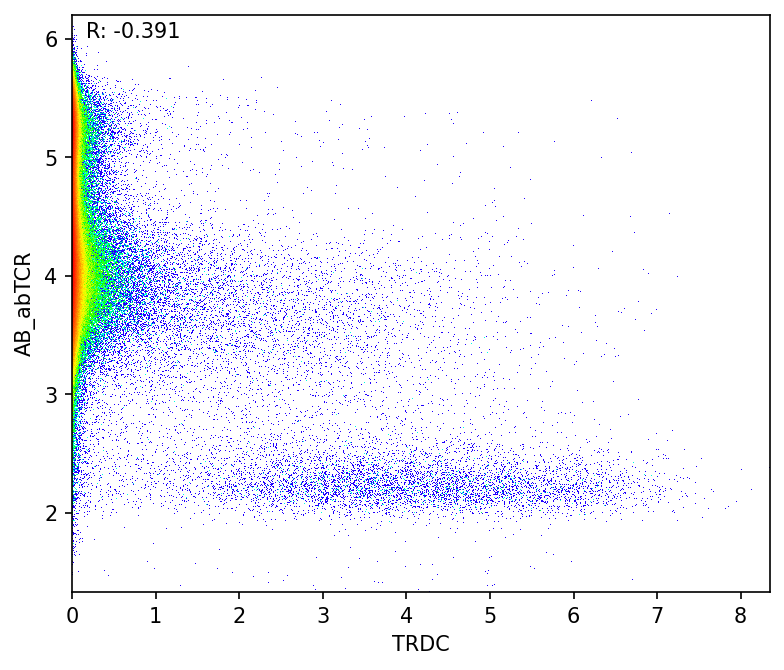

In [482]:
for (gene, prot) in prot_pairs:
    # print(gene, prot)
    r, _ = pearsonr(markers_magic[gene], markers_magic[prot])
    # print(r)
    
    fig, ax = plt.subplots(dpi = 150, figsize=(6,5))
    dsshow(pd.DataFrame({'x':markers_magic[gene], 'y':markers_magic[prot]}), 
           ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
    # ax.scatter(x = markers_magic[gene], y = markers_magic[prot], s = .2, alpha = .3)
    ax.text(.02, .96, ''.join(['R: ', str(round(r, 3))]), transform=ax.transAxes)
    ax.set_xlabel(gene)
    ax.set_ylabel(prot)

Compare non MAGIC-smoothed markers


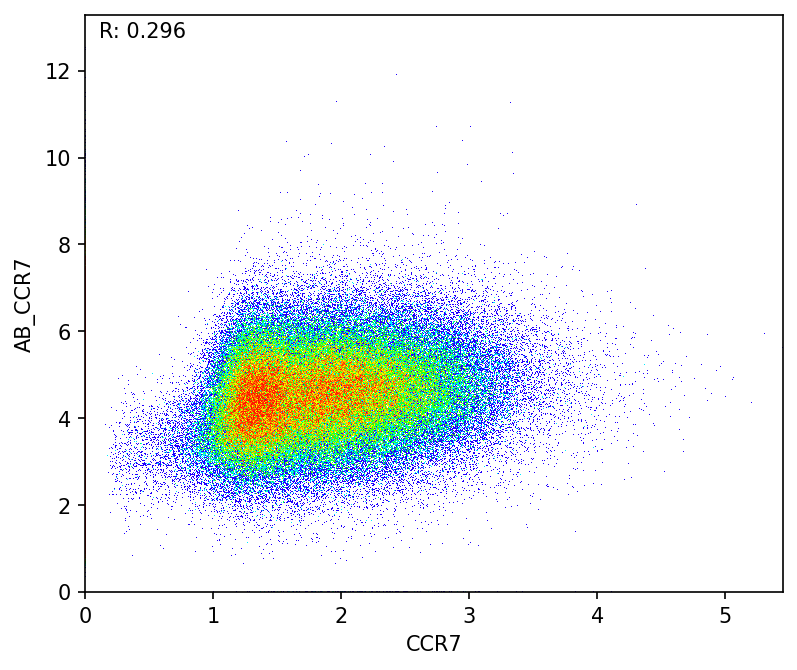

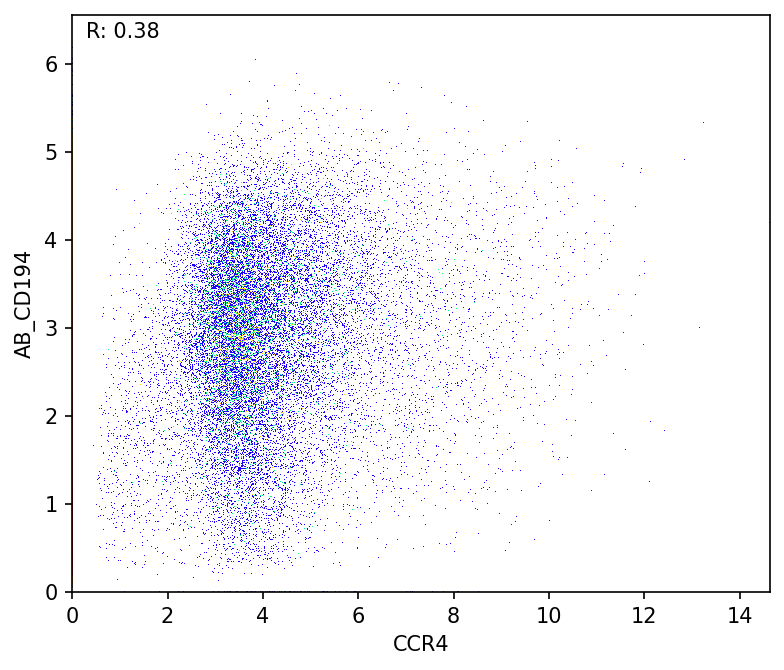

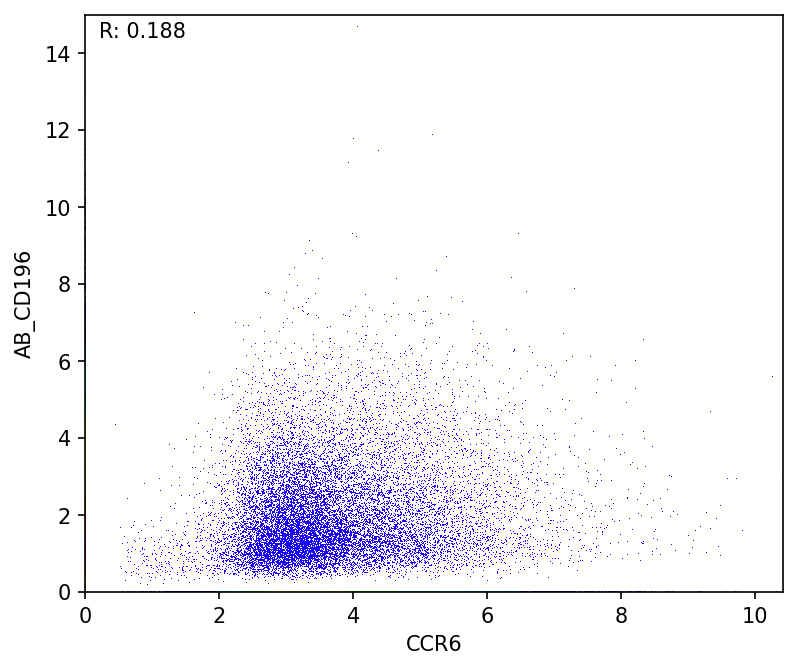

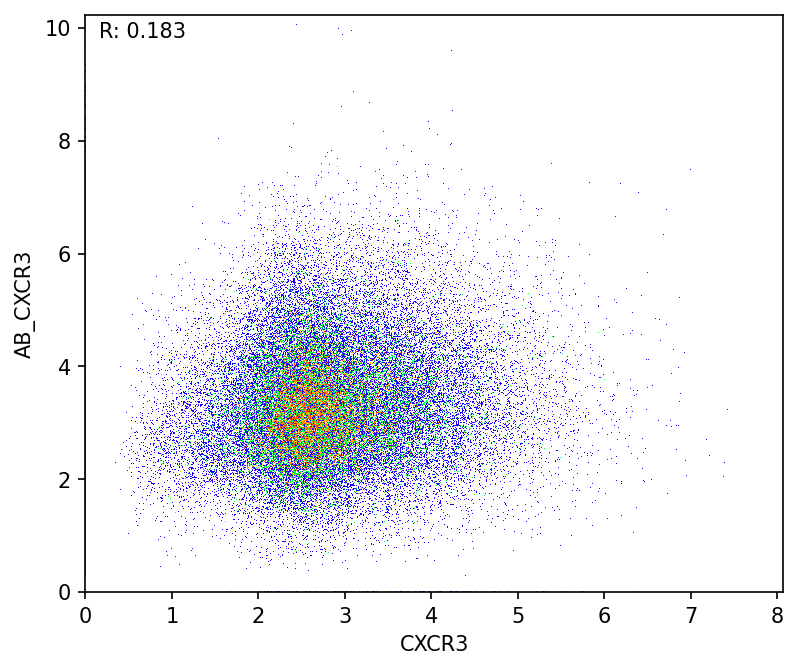

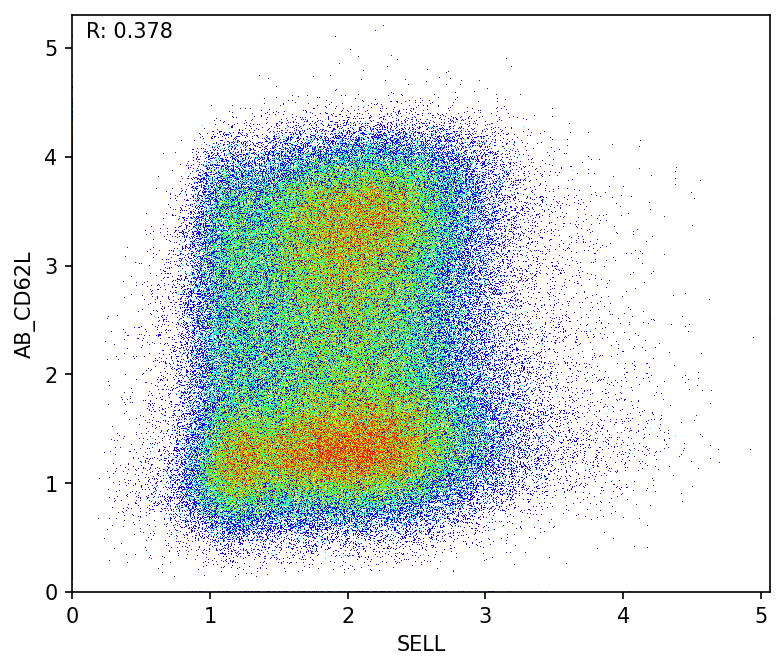

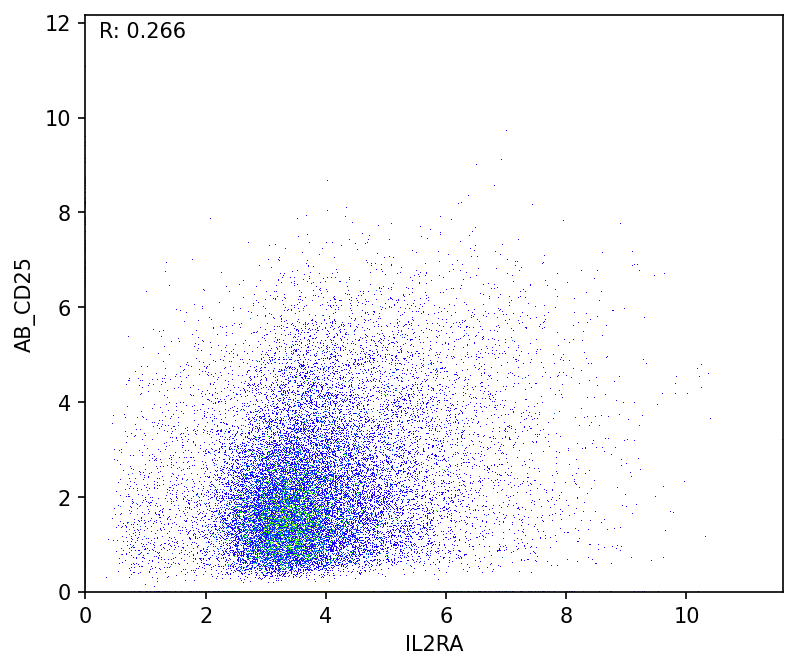

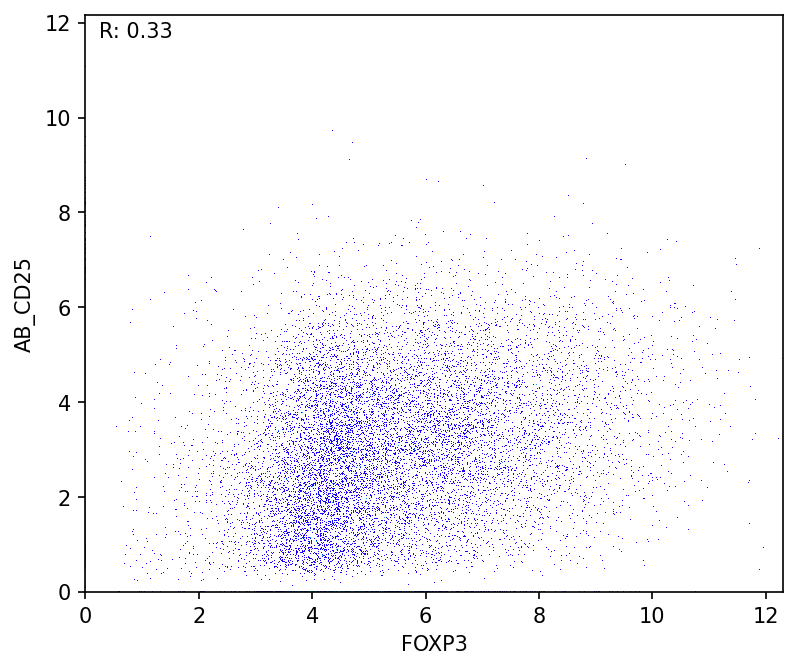

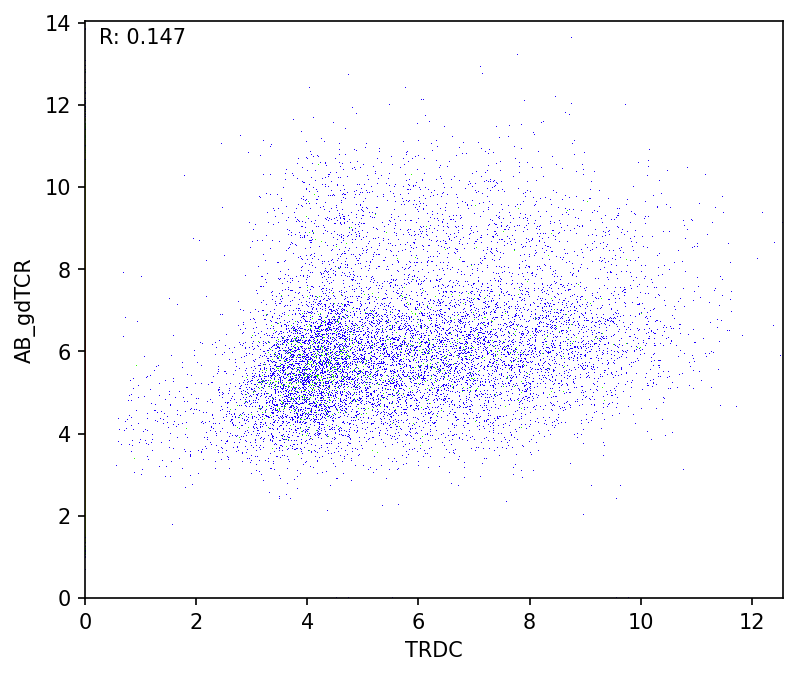

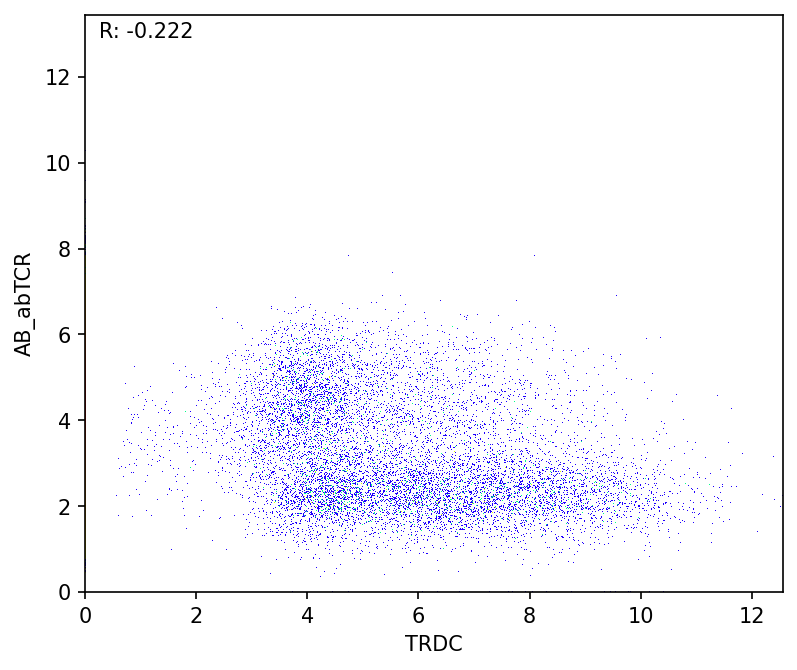

In [483]:
for (gene, prot) in prot_pairs:
    # print(gene, prot)
    r, _ = pearsonr(unsmoothed_markers[gene], unsmoothed_markers[prot])
    # print(r)
    
    fig, ax = plt.subplots(dpi = 150, figsize=(6,5))
    dsshow(pd.DataFrame({'x':unsmoothed_markers[gene], 'y':unsmoothed_markers[prot]}), 
           ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
    # ax.scatter(x = markers_magic[gene], y = markers_magic[prot], s = .2, alpha = .3)
    ax.text(.02, .96, ''.join(['R: ', str(round(r, 3))]), transform=ax.transAxes)
    ax.set_xlabel(gene)
    ax.set_ylabel(prot)

Compare proteins - MAGIC to non-smoothed

In [484]:
prot_pairs

[('CCR7', 'AB_CCR7'),
 ('CCR4', 'AB_CD194'),
 ('CCR6', 'AB_CD196'),
 ('CXCR3', 'AB_CXCR3'),
 ('SELL', 'AB_CD62L'),
 ('IL2RA', 'AB_CD25'),
 ('FOXP3', 'AB_CD25'),
 ('TRDC', 'AB_gdTCR'),
 ('TRDC', 'AB_abTCR')]

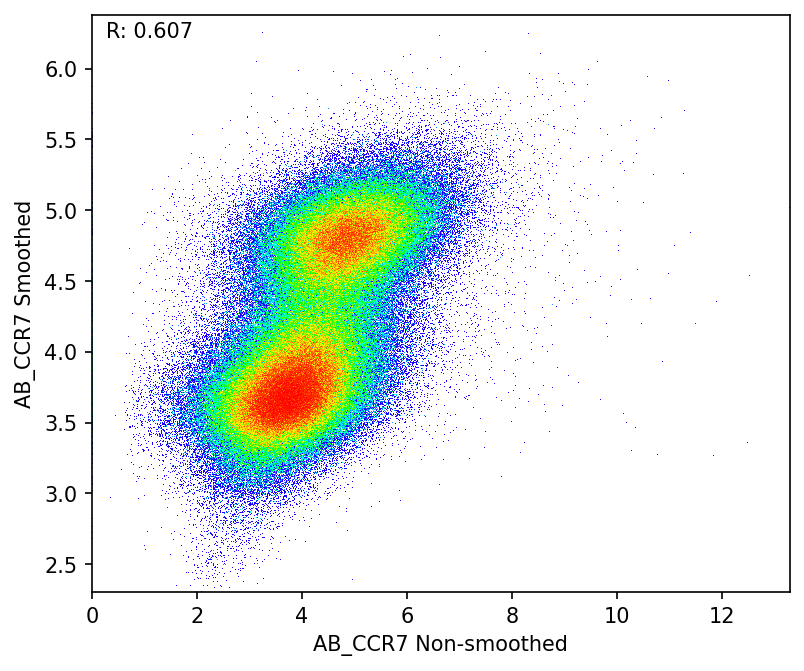

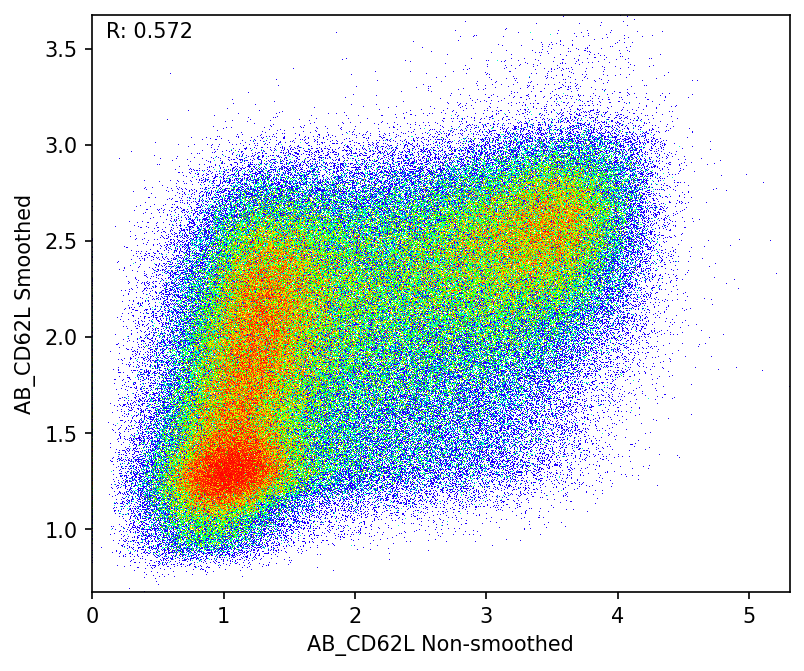

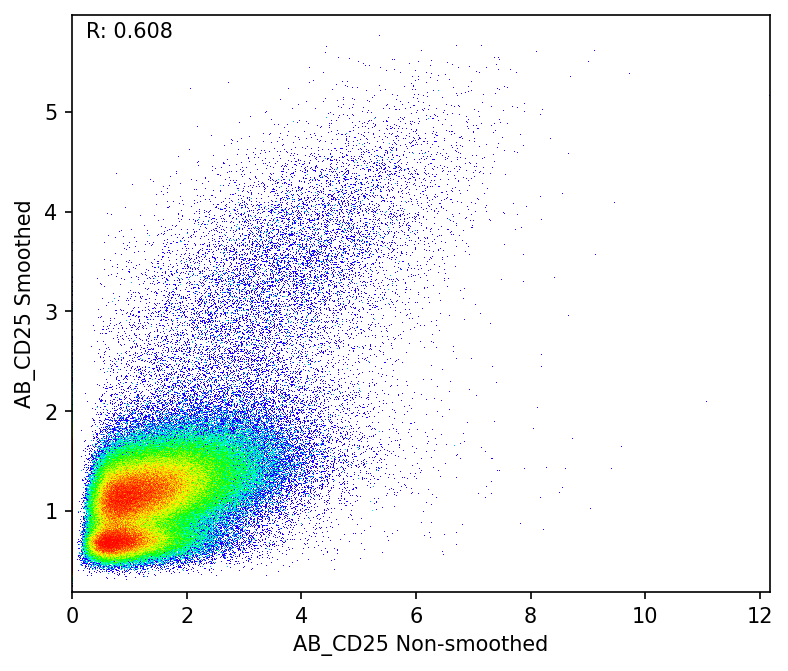

In [485]:
for prot in ['AB_CCR7', 'AB_CD62L', 'AB_CD25']:
    r, _ = pearsonr(unsmoothed_markers[prot], markers_magic[prot])
    # print(r)
    
    fig, ax = plt.subplots(dpi = 150, figsize=(6,5))
    dsshow(pd.DataFrame({'x':unsmoothed_markers[prot], 'y':markers_magic[prot]}), 
           ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
    # ax.scatter(x = markers_magic[gene], y = markers_magic[prot], s = .2, alpha = .3)
    ax.text(.02, .96, ''.join(['R: ', str(round(r, 3))]), transform=ax.transAxes)
    ax.set_xlabel(prot + ' Non-smoothed')
    ax.set_ylabel(prot + ' Smoothed')

What proteins are correlated with CD25?

In [486]:
ADT_corr = pd.DataFrame(adata_ADT.X).corr()
ADT_corr.index = adata_ADT.var.index
ADT_corr.columns = adata_ADT.var.index

In [487]:
ADT_corr['AB_CD25'].sort_values(ascending = False).head(20)

Name_ADT_Fixed
AB_CD25          1.000000
AB_CD194         0.285085
AB_CD4-2         0.252140
AB_CD28          0.227130
AB_CD39          0.193052
AB_CD95          0.193005
AB_mouseCD49f    0.192636
AB_CD52          0.153798
AB_CD47          0.151569
AB_CD278         0.149623
AB_CD5           0.140834
AB_CD82          0.135344
AB_CD27-1        0.134649
AB_CD45RO        0.131724
AB_CD62L         0.125004
AB_CD71          0.122779
AB_CD224         0.112415
AB_CD26          0.108638
AB_abTCR         0.095770
AB_CD44-1        0.078963
Name: AB_CD25, dtype: float64

In [127]:
ADT_corr['AB_CD25'].sort_values(ascending = False).tail(20)

Name_ADT_Fixed
AB_CD226-2      -0.074540
AB_CD360        -0.079013
AB_CD18         -0.083313
AB_CD41         -0.084512
AB_CXCR3        -0.086548
AB_Integrin-7   -0.091136
AB_CD195        -0.094889
AB_CD56-1       -0.096112
AB_CD11a        -0.102303
AB_CX3CR1       -0.116848
AB_CD319        -0.118637
AB_CD94         -0.142765
AB_CD31         -0.157588
AB_CD57         -0.159993
AB_CD45RA       -0.162232
AB_CD49d        -0.167812
AB_CD314        -0.194064
AB_CD244        -0.204573
AB_KLRG1_MAFA   -0.211340
AB_CD8          -0.234791
Name: AB_CD25, dtype: float64

# Lineage marker gating - RNA and proteins

Use both RNA and proteins to gate, including various combinations of CCR7, SELL, CD197, and CD62L.

In [53]:
cmap = plt.cm.hsv
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist = cmaplist[0:round(len(cmaplist)*0.7)]
cmaplist.reverse()
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('', cmaplist, cmap.N)
    
def gate(data, g1, g2, ind=None, vertical_gate=None, horizontal_gate=None, quadrant_gate=None,
         labfontsize=9, plot_labeled=False, upper_only=False, ax=None):
    
    
    if ax is None:
        fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
        gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
        ax = fig.add_subplot(gs[0])

    if ind  is None:
        ind = pd.Series(np.array([True]*data.shape[0]), data.index)
    
    
    x = data.loc[ind, g1]
    y = data.loc[ind, g2]
    
    dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
    ax.set_xlabel(g1, fontsize=labfontsize)
    ax.set_ylabel(g2, fontsize=labfontsize)

    
    if vertical_gate is not None:
        xlim = ax.get_xlim()
        ax.hlines(y=vertical_gate['vthresh'], xmin=xlim[0], xmax=xlim[1], linestyle='--', color='k', linewidth=1)
        ax.set_xlim(xlim)
        
            
        initial_res = (data.loc[ind, g2]>vertical_gate['vthresh']).replace({True:vertical_gate['above_name'], False:vertical_gate['below_name']})
        final_res = ind.copy()
        final_res.loc[ind] = initial_res
        final_res.loc[~ind] = np.nan
    elif horizontal_gate is not None:
        ylim = ax.get_ylim()
        ax.vlines(x=horizontal_gate['hthresh'], ymin=ylim[0], ymax=ylim[1], linestyle='--', color='k', linewidth=1)
        ax.set_ylim(ylim)
        
        initial_res = (data.loc[ind, g1]>horizontal_gate['hthresh']).replace({False:horizontal_gate['left_name'], True:horizontal_gate['right_name']})
        final_res = ind.copy()
        final_res.loc[ind] = initial_res
        final_res.loc[~ind] = np.nan
        
        
    elif quadrant_gate is not None:
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        if not upper_only:
            ax.hlines(y=quadrant_gate['vthresh'], xmin=xlim[0]-1, xmax=xlim[1]+1, linestyle='--', color='k', linewidth=1)
            ax.set_xlim(xlim)
            ax.vlines(x=quadrant_gate['hthresh'], ymin=ylim[0]-1, ymax=ylim[1]+1, linestyle='--', color='k', linewidth=1)
            ax.set_ylim(ylim)
        else:
            ax.hlines(y=quadrant_gate['vthresh'], xmin=quadrant_gate['hthresh'], xmax=xlim[1]+1, linestyle='--', color='k', linewidth=1)
            ax.set_xlim(xlim)
            ax.vlines(x=quadrant_gate['hthresh'], ymin=quadrant_gate['vthresh'], ymax=ylim[1]+1, linestyle='--', color='k', linewidth=1)
            ax.set_ylim(ylim)            
            

        indh = data.loc[ind, g1]> quadrant_gate['hthresh']
        indv = data.loc[ind, g2]> quadrant_gate['vthresh']
        final_res = ind.replace(False,np.nan)
        for hval,vval, lab in [[False, False, quadrant_gate['ll']], [True, False, quadrant_gate['lr']], [False, True, quadrant_gate['ul']], [True, True, quadrant_gate['ur']]]:
            tolab = (indh==hval) & (indv==vval)
            final_res.loc[tolab.index[tolab]] = lab
            
            
    if plot_labeled:
        fig = plt.figure(constrained_layout=True, figsize=(2.4, 2.), dpi=200)
        gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.8, top=.92)
        ax2 = fig.add_subplot(gs[0])
        dat = pd.concat([x,y,final_res], axis=1)
        dat.columns = [g1, g2, 'label']
        for (k,g) in dat.groupby('label'):
            ax2.scatter(g[g1], g[g2], label=k, s=.5, edgecolor='None')
        ax2.legend(bbox_to_anchor=(1,1), markerscale=3, fontsize=6)
        
        
        
    return(final_res, ax)

In [20]:
gating = pd.DataFrame(index=markers_magic.index, columns=['gdT', 'MAIT', 'CD4_vs_CD8', 'Treg', 'CD4_Conv', 'CD8_Conv'])

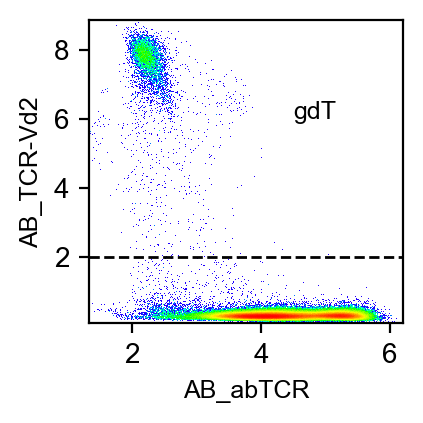

In [21]:
g1 = 'AB_abTCR'
g2 = 'AB_TCR-Vd2'   
vgate = {'vthresh':2, 'above_name':'gdT', 'below_name':'ab'}
gating['gdT'], ax = gate(markers_magic, g1, g2, ind=None, vertical_gate=vgate, plot_labeled=False)
ax.text(4.5,6, 'gdT', fontsize=9)
plt.savefig(os.path.join(figdir, 'ManualGating_COMBAT_gdT.png'))
plt.savefig(os.path.join(figdir, 'ManualGating_COMBAT_gdT.pdf'))

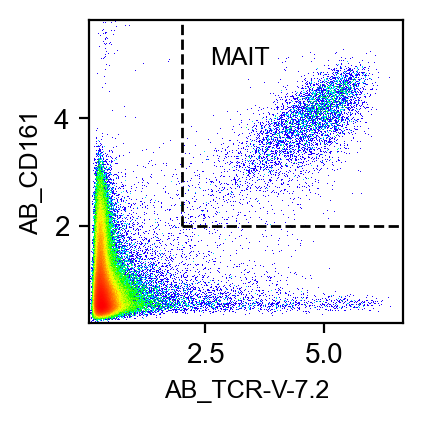

In [22]:
g1 = 'AB_TCR-V-7.2'
g2 = 'AB_CD161'  
gating['MAIT'], ax = gate(markers_magic, g1, g2, ind=gating['gdT']=='ab',
                      quadrant_gate={'vthresh':2, 'hthresh':2, 'ur':'MAIT', 'ul':'ab', 'll':'ab', 'lr':'ab'}, plot_labeled=False, upper_only=True)
ax.text(2.6,5, 'MAIT', fontsize=9)
plt.savefig(os.path.join(figdir, 'ManualGating_COMBAT_MAIT.png'))
plt.savefig(os.path.join(figdir, 'ManualGating_COMBAT_MAIT.pdf'))

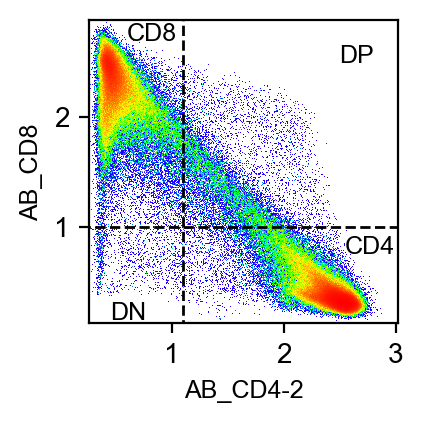

In [23]:
g1 = 'AB_CD4-2'
g2 = 'AB_CD8'    
gating['CD4_vs_CD8'], ax = gate(markers_magic, g1, g2, ind=gating['MAIT']=='ab', quadrant_gate={'vthresh':1, 'hthresh':1.1, 'll':'DN', 'ul':'CD8', 'ur':'DP', 'lr':'CD4'},
                            plot_labeled=False)
ax.text(.6,2.7, 'CD8', fontsize=9)
ax.text(2.55, .75, 'CD4', fontsize=9)
ax.text(2.5,2.5, 'DP', fontsize=9)
ax.text(.45, .15, 'DN', fontsize=9)

xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.set_xlim(xlim[0], xlim[1]+.15)

plt.savefig(os.path.join(figdir, 'ManualGating_COMBAT_CD4CD8.png'))
plt.savefig(os.path.join(figdir, 'ManualGating_COMBAT_CD4CD8.pdf'))

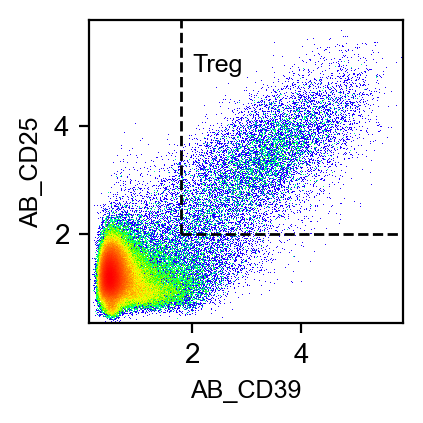

In [32]:
g2 = 'AB_CD25'     
g1 = 'AB_CD39'

gating['Treg'],ax = gate(markers_magic, g1, g2, ind=gating['CD4_vs_CD8']=='CD4', 
               quadrant_gate={'vthresh':2., 'hthresh':1.8, 
                              'll':'CD4', 'ur':'Treg', 'ul':'CD4', 'lr':'CD4'
                             },
                      plot_labeled=False, upper_only=True)

ax.text(2, 5, 'Treg', fontsize=9)

plt.savefig(os.path.join(figdir, 'ManualGating_COMBAT_Treg.png'))
plt.savefig(os.path.join(figdir, 'ManualGating_COMBAT_Treg.pdf'))

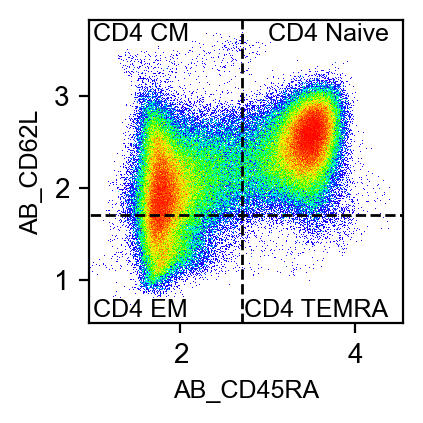

In [33]:
g1 = 'AB_CD45RA'     
g2 = 'AB_CD62L'
gating['CD4_Conv'],ax = gate(markers_magic, g1, g2, ind=(gating['Treg']=='CD4'),
                           quadrant_gate={'vthresh':1.7, 'hthresh':2.7, 'll':'CD4_EM', 'ur':'CD4_Naive', 'ul':'CD4_CM', 'lr':'CD4_TEMRA'},
                           plot_labeled=False)

ax.text(3., 3.6, 'CD4 Naive', fontsize=9)
ax.text(2.73, .6, 'CD4 TEMRA', fontsize=9)

ax.text(1., 3.6, 'CD4 CM', fontsize=9)
ax.text(1., .6, 'CD4 EM', fontsize=9)



xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.set_xlim(xlim[0], xlim[1]+.15)
ax.set_ylim(ylim[0]-.2, ylim[1]+.15)


plt.savefig(os.path.join(figdir, 'ManualGating_COMBAT_CD4Naive.png'))
plt.savefig(os.path.join(figdir, 'ManualGating_COMBAT_CD4Naive.pdf'))

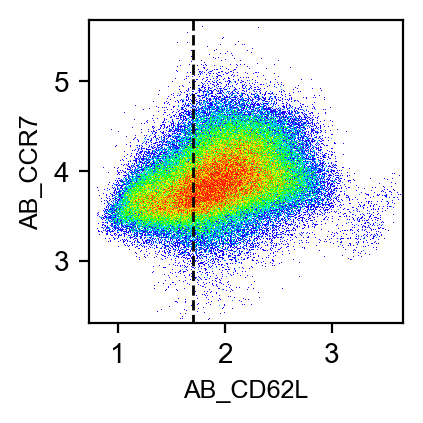

In [34]:
g1 = 'AB_CD62L'     
g2 = 'AB_CCR7'
_ = gate(markers_magic, g1, g2, ind=(gating['CD4_Conv'].isin(['CD4_CM', 'CD4_EM'])), quadrant_gate={'vthresh':1.7, 'hthresh':1.7, 'll':'CD4_Memory', 'ul':'CD4_Naive', 'ur':'CD4_Memory', 'lr':'CD4_Memory'})


Text(0.5, 0, 'SELL RNA')

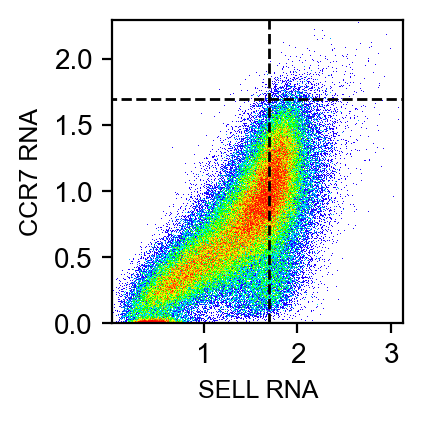

In [35]:
g1 = 'SELL'     
g2 = 'CCR7'
_,ax = gate(markers_magic, g1, g2, ind=(gating['CD4_Conv'].isin(['CD4_CM', 'CD4_EM'])), quadrant_gate={'vthresh':1.7, 'hthresh':1.7, 'll':'CD4_Memory', 'ul':'CD4_Naive', 'ur':'CD4_Memory', 'lr':'CD4_Memory'})
ax.set_ylabel('CCR7 RNA', fontsize=9)
ax.set_xlabel('SELL RNA', fontsize=9)

(AAACCTGAGCGGATCA-1-gPlexA1                     NaN
 AAACCTGCAGCTCGAC-1-gPlexA1              CD4_Memory
 AAACCTGCATCTATGG-1-gPlexA1    CD4_TerminalEffector
 AAACCTGGTCTCTCTG-1-gPlexA1              CD4_Memory
 AAACCTGTCACCGGGT-1-gPlexA1                     NaN
                                       ...         
 TTTGGTTTCCTCAACC-1-gPlexK7                     NaN
 TTTGGTTTCTCGATGA-1-gPlexK7              CD4_Memory
 TTTGTCACACCACGTG-1-gPlexK7                     NaN
 TTTGTCAGTTACCGAT-1-gPlexK7                     NaN
 TTTGTCATCCTCTAGC-1-gPlexK7                     NaN
 Name: CD4_Conv, Length: 400925, dtype: object,
 <AxesSubplot:xlabel='AB_CD62L', ylabel='AB_CD27-1'>)

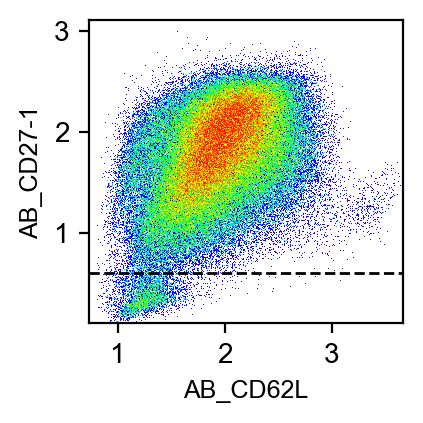

In [36]:
g1 = 'AB_CD62L'
g2 = 'AB_CD27-1'     
gate(markers_magic, g1, g2, ind=(gating['CD4_Conv'].isin(['CD4_CM', 'CD4_EM'])),
                                   vertical_gate={'vthresh':.6, 'above_name':'CD4_Memory', 'below_name':'CD4_TerminalEffector'},
                                   plot_labeled=False)

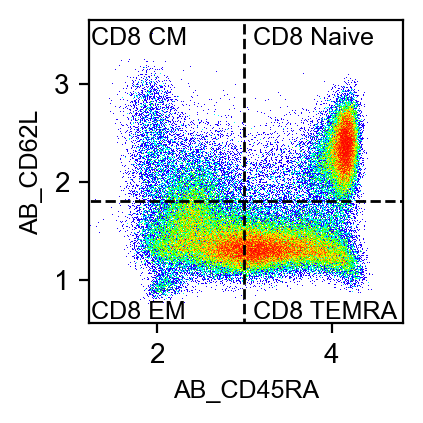

In [37]:
g1 = 'AB_CD45RA'     
g2 = 'AB_CD62L'
gating['CD8_Conv'], ax = gate(markers_magic, g1, g2, ind=(gating['CD4_vs_CD8']=='CD8'),
                           quadrant_gate={'vthresh':1.8, 'hthresh':3, 'll':'CD8_EM', 'ul':'CD8_CM', 'ur':'CD8_Naive', 'lr':'CD8_TEMRA'},
                                                             plot_labeled=False)

ax.text(3.1, 3.4, 'CD8 Naive', fontsize=9)
ax.text(3.1, .6, 'CD8 TEMRA', fontsize=9)

ax.text(1.24, 3.4, 'CD8 CM', fontsize=9)
ax.text(1.24, .6, 'CD8 EM', fontsize=9)



xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.set_xlim(xlim[0], xlim[1]+.35)
ax.set_ylim(ylim[0]-.2, ylim[1]+.15)


plt.savefig(os.path.join(figdir, 'ManualGating_COMBAT_CD8Naive.png'))
plt.savefig(os.path.join(figdir, 'ManualGating_COMBAT_CD8Naive.pdf'))

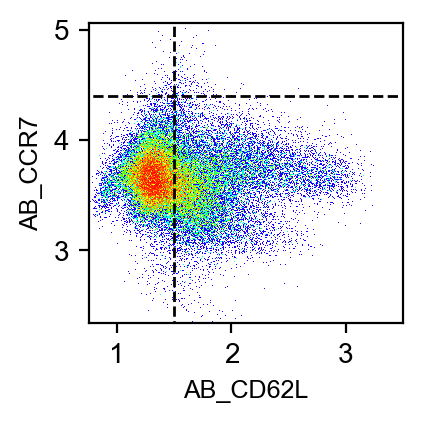

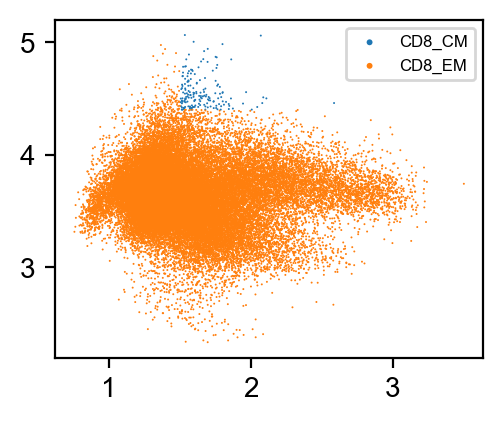

In [38]:
g1 = 'AB_CD62L'   
g2 = 'AB_CCR7'     
_ = gate(markers_magic, g1, g2, ind=(gating['CD8_Conv'].isin(['CD8_CM', 'CD8_EM'])), quadrant_gate={'vthresh':4.4, 'hthresh':1.5, 'll':'CD8_EM', 'lr':'CD8_EM',
                                                                                    'ul':'CD8_EM', 'ur':'CD8_CM'}, plot_labeled=True)


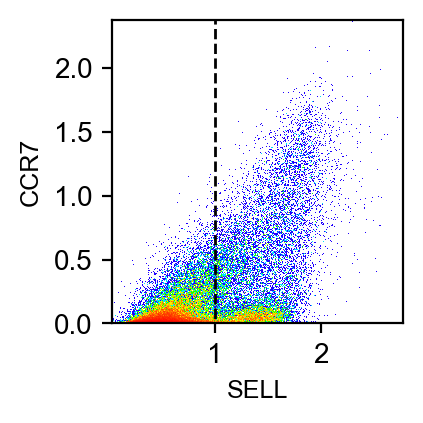

In [39]:
g1 = 'SELL'   
g2 = 'CCR7'     
_ = gate(markers_magic, g1, g2, ind=(gating['CD8_Conv'].isin(['CD8_CM', 'CD8_EM'])), quadrant_gate={'vthresh':4.4, 'hthresh':1, 'll':'CD8_EM', 'lr':'CD8_EM',
                                                                                    'ul':'CD8_EM', 'ur':'CD8_CM'}, plot_labeled=False)


In [40]:
label = gating.apply(lambda x: x[x.last_valid_index()], axis=1)

In [41]:
label.value_counts()

CD4_Naive    116069
CD4_CM        98734
CD4_EM        41164
CD8_TEMRA     36847
CD8_EM        33279
CD8_Naive     25526
DP            13044
Treg          11798
CD8_CM         9706
gdT            6204
MAIT           6048
DN             1386
CD4_TEMRA      1120
dtype: int64

In [42]:
outfn = os.path.join(outdir, 'ManualGating.Magic.20230831.tsv')
print(outfn)

../../../Data/PerDataset/COMBAT/ManualGating.Magic.20230831.tsv


In [43]:
gating.to_csv(outfn, sep='\t')

In [44]:
outfn = os.path.join(outdir, 'ManualGating.Magic.FinalLabel.20230831.tsv')
print(outfn)

../../../Data/PerDataset/COMBAT/ManualGating.Magic.FinalLabel.20230831.tsv


In [45]:
label.to_csv(outfn, sep='\t')

In [46]:
os.path.abspath('../../../Data/PerDataset/COMBAT/ManualGating.Magic.FinalLabel.20230831.tsv')

'/data/srlab1/TCAT/Data/PerDataset/COMBAT/ManualGating.Magic.FinalLabel.20230831.tsv'

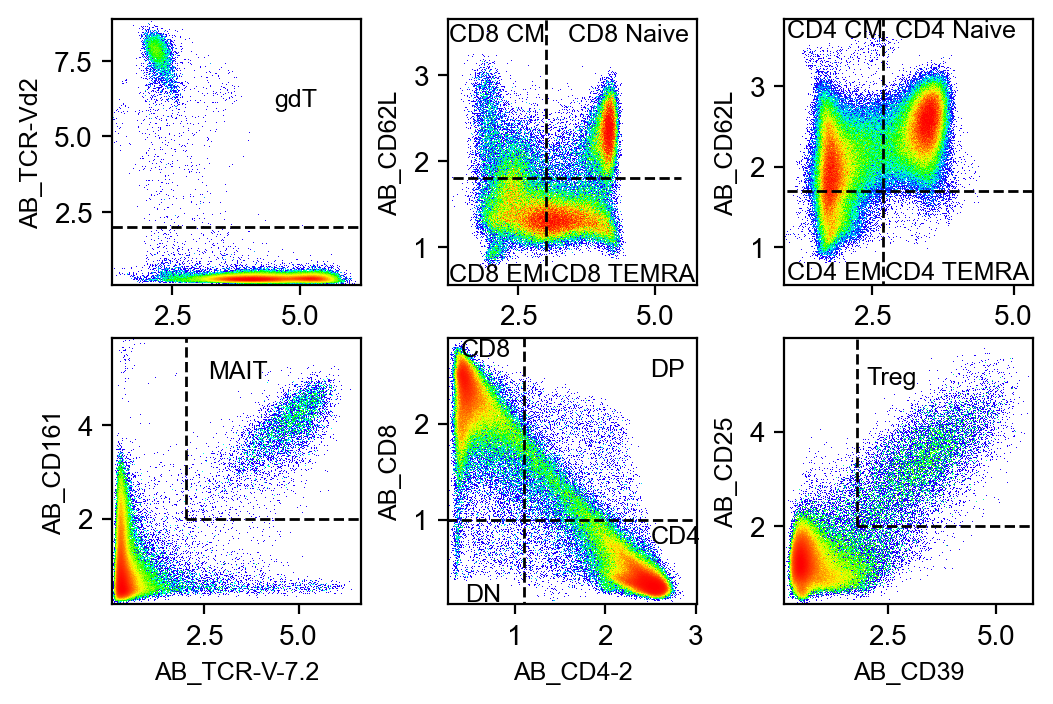

In [105]:
ncols = 3
nrows = 2

umap_dim = 1.5
wspace = 0.35
hspace = 0.15
right = .98
left = .15
bottom = .15
top = .98
fig_width = ncols*umap_dim+(ncols-1)*wspace*umap_dim
fig_height = nrows*umap_dim+(nrows-1)*wspace*umap_dim

fig = plt.figure(constrained_layout=False, figsize=(fig_width, fig_height), dpi=200)
gs = gridspec.GridSpec(2, 3, figure=fig, width_ratios=[umap_dim]*ncols, height_ratios=[umap_dim]*nrows,
                       bottom=bottom, left=left, right=right, top=top,  wspace=wspace)

axes = []
for i in range(nrows):
    rax = []
    for j in range(ncols):
        rax.append(fig.add_subplot(gs[i,j]))
    axes.append(rax)

axes = np.array(axes)





this_ax = axes[0, 0]
g1 = 'AB_abTCR'
g2 = 'AB_TCR-Vd2'   
vgate = {'vthresh':2, 'above_name':'gdT', 'below_name':'ab'}
_, _ = gate(markers_magic, g1, g2, ind=None, vertical_gate=vgate, plot_labeled=False, ax=this_ax)
this_ax.text(4.5,6, 'gdT', fontsize=9)

this_ax = axes[1, 0]
g1 = 'AB_TCR-V-7.2'
g2 = 'AB_CD161'  
_, _ = gate(markers_magic, g1, g2, ind=gating['gdT']=='ab',
                      quadrant_gate={'vthresh':2, 'hthresh':2, 'ur':'MAIT', 'ul':'ab', 'll':'ab', 'lr':'ab'}, plot_labeled=False, upper_only=True, ax=this_ax)
this_ax.text(2.6,5, 'MAIT', fontsize=9)


this_ax = axes[1, 1]
g1 = 'AB_CD4-2'
g2 = 'AB_CD8'    
_, ax = gate(markers_magic, g1, g2, ind=gating['MAIT']=='ab', quadrant_gate={'vthresh':1, 'hthresh':1.1, 'll':'DN', 'ul':'CD8', 'ur':'DP', 'lr':'CD4'},
                            plot_labeled=False, ax=this_ax)
ax.text(.4,2.7, 'CD8', fontsize=9)
ax.text(2.5, .75, 'CD4', fontsize=9)
ax.text(2.5,2.5, 'DP', fontsize=9)
ax.text(.45, .15, 'DN', fontsize=9)

xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.set_xlim(xlim[0], xlim[1]+.15)



this_ax = axes[1, 2]
g2 = 'AB_CD25'     
g1 = 'AB_CD39'

_,ax = gate(markers_magic, g1, g2, ind=gating['CD4_vs_CD8']=='CD4', 
               quadrant_gate={'vthresh':2., 'hthresh':1.8, 
                              'll':'CD4', 'ur':'Treg', 'ul':'CD4', 'lr':'CD4'
                             },
                      plot_labeled=False, upper_only=True, ax=this_ax)

ax.text(2, 5, 'Treg', fontsize=9)


this_ax = axes[0, 2]

g1 = 'AB_CD45RA'     
g2 = 'AB_CD62L'
_,ax = gate(markers_magic, g1, g2, ind=(gating['Treg']=='CD4'),
                           quadrant_gate={'vthresh':1.7, 'hthresh':2.7, 'll':'CD4_EM', 'ur':'CD4_Naive', 'ul':'CD4_CM', 'lr':'CD4_TEMRA'},
                           plot_labeled=False, ax=this_ax)

ax.text(2.9, 3.6, 'CD4 Naive', fontsize=9)
ax.text(2.73, .6, 'CD4 TEMRA', fontsize=9)

ax.text(1., 3.6, 'CD4 CM', fontsize=9)
ax.text(1., .6, 'CD4 EM', fontsize=9)



xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.set_xlim(xlim[0], xlim[1]+.95)
ax.set_ylim(ylim[0]-.2, ylim[1]+.15)



this_ax = axes[0, 1]
g1 = 'AB_CD45RA'     
g2 = 'AB_CD62L'
_, ax = gate(markers_magic, g1, g2, ind=(gating['CD4_vs_CD8']=='CD8'),
                           quadrant_gate={'vthresh':1.8, 'hthresh':3, 'll':'CD8_EM', 'ul':'CD8_CM', 'ur':'CD8_Naive', 'lr':'CD8_TEMRA'},
                                                             plot_labeled=False, ax=this_ax)

ax.text(3.4, 3.4, 'CD8 Naive', fontsize=9)
ax.text(3.1, .6, 'CD8 TEMRA', fontsize=9)

ax.text(1.24, 3.4, 'CD8 CM', fontsize=9)
ax.text(1.24, .6, 'CD8 EM', fontsize=9)



xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.set_xlim(xlim[0], xlim[1]+1.3)
ax.set_ylim(ylim[0]-.2, ylim[1]+.15)

plt.savefig(os.path.join(figdir, 'ManualGating_COMBAT_Merged.png'))
plt.savefig(os.path.join(figdir, 'ManualGating_COMBAT_Merged.pdf'))

# Overlap with GEPs

In [6]:
params = read_dataset_log('Dataset Paths')
params.index = params['dataset']
params.loc['COMBAT', 'tcat_fn']

'/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.20231016.FiltSingletons.Rescaled.COMBAT.tsv'

In [7]:
tcat_gep_info = read_dataset_log('cGEP_Name')
tcat_gep_info.head()

cGep_Name Old_Short_Name             Long_Name     Short_Name  \
0  COMBAT_Cytoskeleton   Cytoskeleton    Actin Cytoskeleton   Cytoskeleton   
1               CD8_EM         CD8-EM   CD8 Effector Memory         CD8-EM   
2        CellCycle-G2M  CellCycle-G2M  Cell Cycle G2M Phase  CellCycle-G2M   
3          CellCycle-S    CellCycle-S    Cell Cycle S Phase    CellCycle-S   
4            Cytotoxic      Cytotoxic             Cytotoxic      Cytotoxic   

  Shortest_Name       Class  Num_Datasets  \
0       Cytosk.  Functional           7.0   
1        CD8-EM     Lineage           7.0   
2     G2M-phase  Functional           7.0   
3       S-phase  Functional           7.0   
4     Cytotoxic  Functional           7.0   

                                               Notes Reviewed Filter  
0                                                NaN        Y    NaN  
1  Need to confirm overlap with gating since the ...        Y    NaN  
2                                                NaN        Y    NaN  
3                                                NaN        Y    NaN  
4                                                NaN        Y    NaN

In [8]:
renmap = dict(zip(tcat_gep_info['cGep_Name'], tcat_gep_info['Short_Name']))

In [9]:
tcat_usage = pd.read_csv(params.loc['COMBAT', 'tcat_fn'], sep='\t', index_col=0).rename(columns=renmap)

In [10]:
tcat_usage_norm = tcat_usage.div(tcat_usage.sum(axis=1), axis=0)

In [11]:
tcat_usage_norm.head()

CellCycle-G2M  Translation       HLA       ISG  \
AAACCTGAGCGGATCA-1-gPlexA1       0.000114     0.000197  0.050447  0.000394   
AAACCTGCAGCTCGAC-1-gPlexA1       0.000134     0.234478  0.002651  0.011165   
AAACCTGCATCTATGG-1-gPlexA1       0.000073     0.011136  0.067649  0.002802   
AAACCTGGTCTCTCTG-1-gPlexA1       0.000524     0.214455  0.004636  0.026641   
AAACCTGTCACCGGGT-1-gPlexA1       0.000784     0.046476  0.064127  0.002578   

                                    Mito  Doublet-RBC       gdT  CellCycle-S  \
AAACCTGAGCGGATCA-1-gPlexA1  2.976725e-07     0.000678  0.026504     0.000456   
AAACCTGCAGCTCGAC-1-gPlexA1  4.850446e-06     0.000582  0.012246     0.002683   
AAACCTGCATCTATGG-1-gPlexA1  2.252025e-04     0.001020  0.034474     0.001005   
AAACCTGGTCTCTCTG-1-gPlexA1  7.475370e-06     0.000764  0.006035     0.004994   
AAACCTGTCACCGGGT-1-gPlexA1  3.487247e-07     0.001031  0.042210     0.000432   

                            Cytotoxic  Doublet-Platelet  ...     Tfh-2  \
AAACCTGAGCGGATCA-1-gPlexA1   0.328680          0.000905  ...  0.004894   
AAACCTGCAGCTCGAC-1-gPlexA1   0.005275          0.001425  ...  0.003794   
AAACCTGCATCTATGG-1-gPlexA1   0.120184          0.001089  ...  0.009841   
AAACCTGGTCTCTCTG-1-gPlexA1   0.010866          0.002153  ...  0.011710   
AAACCTGTCACCGGGT-1-gPlexA1   0.082531          0.001161  ...  0.002736   

                            OX40/EBI3  CD172a/MERTK      IEG3  \
AAACCTGAGCGGATCA-1-gPlexA1   0.002549      0.000733  0.002878   
AAACCTGCAGCTCGAC-1-gPlexA1   0.010843      0.044205  0.014869   
AAACCTGCATCTATGG-1-gPlexA1   0.001386      0.004685  0.004597   
AAACCTGGTCTCTCTG-1-gPlexA1   0.053980      0.021231  0.004090   
AAACCTGTCACCGGGT-1-gPlexA1   0.011504      0.006414  0.003572   

                            Doublet-Fibroblast  SOX4/TOX2  CD40LG/TXNIP  \
AAACCTGAGCGGATCA-1-gPlexA1            0.007332   0.002146      0.002679   
AAACCTGCAGCTCGAC-1-gPlexA1            0.001485   0.005787      0.031758   
AAACCTGCATCTATGG-1-gPlexA1            0.005090   0.001117      0.057629   
AAACCTGGTCTCTCTG-1-gPlexA1            0.001097   0.000952      0.017101   
AAACCTGTCACCGGGT-1-gPlexA1            0.000203   0.001019      0.002647   

                                 Tph  Exhaustion     Tfh-1  
AAACCTGAGCGGATCA-1-gPlexA1  0.016983    0.016611  0.012907  
AAACCTGCAGCTCGAC-1-gPlexA1  0.004158    0.001973  0.007829  
AAACCTGCATCTATGG-1-gPlexA1  0.006502    0.012211  0.017336  
AAACCTGGTCTCTCTG-1-gPlexA1  0.003815    0.002443  0.010850  
AAACCTGTCACCGGGT-1-gPlexA1  0.001083    0.056630  0.004602  

[5 rows x 52 columns]

In [12]:
tcat_gep_info.loc[tcat_gep_info['Class'] == 'Lineage', :]

cGep_Name Old_Short_Name                   Long_Name  \
1                  CD8_EM         CD8-EM         CD8 Effector Memory   
7                    MAIT           MAIT                        MAIT   
8                    Treg           Treg                        Treg   
9          CD4-Naive_TBRU      CD4-Naive                   CD4 Naive   
16         KLRC2/GNLY_gdT        NK-like                       TEMRA   
17            CD4 TCM_Tfh         CD4-CM        CD4 T Central Memory   
23              gdT-Blood      gdT-Blood               Gamma Delta T   
28                   Th17           Th17                Th17 Resting   
29                    Th2          Th2-1                 Th2 Resting   
31                CD4 TEM         CD4-EM                    Th1-Like   
32              CD8-Naive      CD8-Naive                   CD8 Naive   
33              CD8/KLRC2   CD8-Trm-Like  CD8 Tissue Resident Memory   
38             AMP-RA_Tfh          Tfh-2       T follicular helper 2   
39              CCR3+-Th2          Th2-2               Th2-Activated   
42              IL26/CTSH         Th17-2              Th17-Activated   
49      AMP-RA:Tph_Single            Tph         T peripheral helper   
50  Pan-Cancer:Tfh_Single          Tfh-1       T follicular helper 1   

        Short_Name Shortest_Name    Class  Num_Datasets  \
1           CD8-EM        CD8-EM  Lineage           7.0   
7             MAIT          MAIT  Lineage           7.0   
8             Treg          Treg  Lineage           7.0   
9        CD4-Naive     CD4-Naive  Lineage           6.0   
16           TEMRA         TEMRA  Lineage           6.0   
17          CD4-CM        CD4-CM  Lineage           5.0   
23             gdT           gdT  Lineage           4.0   
28    Th17-Resting    Th17-Rest.  Lineage           4.0   
29     Th2-Resting     Th2-Rest.  Lineage           4.0   
31        Th1-Like      Th1-Like  Lineage           3.0   
32       CD8-Naive     CD8-Naive  Lineage           3.0   
33         CD8-Trm       CD8-Trm  Lineage           3.0   
38           Tfh-2         Tfh-2  Lineage           3.0   
39   Th2-Activated      Th2-Act.  Lineage           2.0   
42  Th17-Activated     Th17-Act.  Lineage           2.0   
49             Tph           Tph  Lineage           1.0   
50           Tfh-1         Tfh-1  Lineage           1.0   

                                                Notes Reviewed Filter  
1   Need to confirm overlap with gating since the ...        Y    NaN  
7                                                 NaN        Y    NaN  
8                                                 NaN        Y    NaN  
9                                                 NaN        Y    NaN  
16                                                NaN        Y    NaN  
17                                                NaN        Y    NaN  
23                                                NaN        Y    NaN  
28        Need to confirm enrichment for TH17 geneset        Y    NaN  
29                                                NaN        Y    NaN  
31  Need to confirm overlap with gating since the ...        Y    NaN  
32                                                NaN        Y    NaN  
33  Should probably confirm it is only a tiny port...        Y    NaN  
38               This vs the Pan-cancer singleton Tfh        Y    NaN  
39                                                NaN        Y    NaN  
42  Top genes are IL26, IL17A, IL17F, IL22,  RORC ...        Y    NaN  
49                                                NaN      NaN    NaN  
50                  Comparison with the AMPRA:Tfh GEP        Y    NaN

In [18]:
tcat_usage_norm.columns

Index(['CellCycle-G2M', 'Translation', 'HLA', 'ISG', 'Mito', 'Doublet-RBC',
       'gdT-Blood', 'CellCycle-S', 'Cytotoxic', 'Doublet-Platelet',
       'Early-Activation', 'CCR10-Migration', 'MAIT', 'CellCycle-Late-S',
       'Cytoskeleton', 'HeatShock', 'Multi-Cytokine', 'NK-like',
       'Doublet-Myeloid', 'Metallothionein', 'CD4-CM', 'IEG', 'CD8-EM', 'IEG2',
       'CD4-Naive', 'Treg', 'Th17', 'MALAT1', 'CD8-Naive', 'RGCC/MYADM',
       'TIMD4/TIM3-Activation', 'Doublet-Plasmablast', 'BCL2-Survival',
       'IL10/IL19-Secretion', 'Th2-2', 'Th2-1', 'ICOS/CD38-Activation',
       'Doublet-Bcell', 'CD4-EM', 'CTLA4+/CD38+-Activation', 'CD8-Trm-Like',
       'Th17-2', 'Tfh-2', 'OX40/EBI3-Activation', 'TXNIP/H1FX', 'YPEL5/JUNB',
       'Doublet-Fibroblast', 'SOX4/TOX2', 'CD40LG/TXNIP', 'Tph', 'Exhaustion',
       'Tfh-1'],
      dtype='object')

In [15]:
outfn = os.path.join(outdir, 'ManualGating.Magic.FinalLabel.20230831.tsv')
print(outfn)

../../../Data/PerDataset/COMBAT/ManualGating.Magic.FinalLabel.20230831.tsv


In [16]:
label = pd.read_csv(outfn, sep='\t', index_col=0)['0']
label.head()

AAACCTGAGCGGATCA-1-gPlexA1       CD8_EM
AAACCTGCAGCTCGAC-1-gPlexA1       CD4_CM
AAACCTGCATCTATGG-1-gPlexA1       CD4_EM
AAACCTGGTCTCTCTG-1-gPlexA1       CD4_CM
AAACCTGTCACCGGGT-1-gPlexA1    CD8_TEMRA
Name: 0, dtype: object

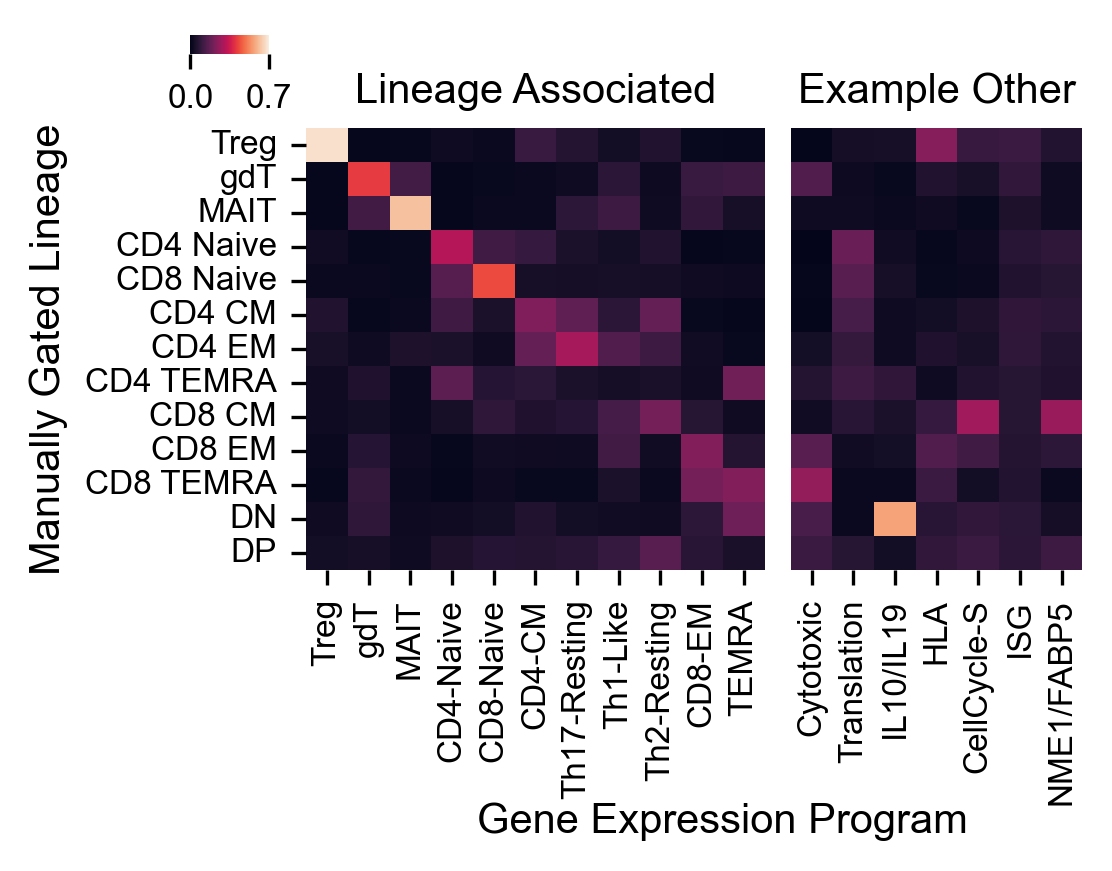

In [20]:
cluster = tcat_usage_norm.groupby(label).mean()

lineage_order = ['Treg', 'gdT', 'MAIT','CD4_Naive',  'CD8_Naive', 'CD4_CM', 'CD4_EM', 'CD4_TEMRA', 
                 'CD8_CM', 'CD8_EM',  'CD8_TEMRA',
                 'DN', 'DP',  ]


max_usage = cluster.max(axis=0).sort_values(ascending=False)


lineage_geps = ['Treg', 'gdT', 'MAIT', 'CD4-Naive', 'CD8-Naive',  'CD4-CM', 'Th17-Resting', 'Th1-Like',  'Th2-Resting',  'CD8-EM', 'TEMRA']
other_geps = ['Cytotoxic', 'Translation', 'IL10/IL19', 'HLA', 'CellCycle-S', 'ISG',  'NME1/FABP5']
'''
other_geps = [ 'IL10/CD38', 'CTLA4+CD38+',
 'CellCycle-G2M',
 'CellCycle-Histone',
 'CellCycle-S',
 'Cytoskeleton',
 'IL26/CTSH',
 'Metallothionein',
'S100A10/LMNA', 'MALAT1',  'ISG', 'Mito', 'HLA',  'Cytotoxic',  'HeatShock2', 'IEG']
'''
gep_order = lineage_geps + other_geps

cluster = cluster.loc[lineage_order, gep_order]


cluster_norm = cluster.div(cluster.sum(axis=0), axis=1)
vmax=0.7


frac_lineage = (len(lineage_geps) / len(lineage_geps+other_geps))
frac_other = 1-frac_lineage



fig = plt.figure(figsize=(4, 3), dpi=300)
gs = gridspec.GridSpec(2, 3, width_ratios=[0.05, frac_lineage, frac_other], height_ratios=[.1,.9], wspace=0.1, bottom=0.3, top=.9, left=0.2)

# Colorbar axis
top_ax = fig.add_subplot(gs[0, 0:2])
lin_ax = fig.add_subplot(gs[1,1])
other_ax = fig.add_subplot(gs[1, 2])
top_ax.axis('off')


cax = top_ax.inset_axes([-0.1, .5, 0.15, 0.4], transform=top_ax.transAxes)
#fig.colorbar(scim, ax=axes[x,y], cax=cax, orientation='horizontal')



sns.heatmap(cluster_norm.loc[:,lineage_geps], ax=lin_ax, cbar_ax=cax,
            xticklabels=True, cbar_kws={'orientation':'horizontal', 'ticks':[0,vmax], 'shrink':0.1, 'aspect':30},
            vmin=0, vmax=vmax)
sns.heatmap(cluster_norm.loc[:,other_geps], ax=other_ax, cbar=False, vmin=0, vmax=vmax, xticklabels=True)
other_ax.set_yticks([])
lin_ax.set_ylabel('Manually Gated Lineage', fontsize=10)
other_ax.set_ylabel('')
fig.text(0.6, 0.02, 'Gene Expression Program', ha='center', va='center', fontsize=10)

lin_ax.set_yticks(np.arange(cluster_norm.shape[0])+0.5)
lin_ax.set_yticklabels([x.replace('_', ' ') for x in cluster_norm.index], fontsize=8)

lin_ax.set_xticks(np.arange(len(lineage_geps))+0.5)
lin_ax.set_xticklabels(lineage_geps, fontsize=8)

other_ax.set_xticks(np.arange(len(other_geps))+0.5)
other_ax.set_xticklabels([x.replace('-Secretion', '') for x in other_geps], fontsize=8)

lin_ax.set_title('Lineage Associated', fontsize=10)
other_ax.set_title('Example Other', fontsize=10)


cax.tick_params(labelsize=8)

plt.savefig(os.path.join(figdir, 'LineageAssociate_COMBAT_Relative.png'))
plt.savefig(os.path.join(figdir, 'LineageAssociate_COMBAT_Relative.pdf'))

## Quantify strength of association

In [ ]:
lineage_geps = ['Treg', 'gdT', 'MAIT', 'CD4-Naive', 'CD8-Naive',  'CD4-CM', 'Th17-Resting', 'Th1-Like',  'Th2-Resting',  'CD8-EM', 'TEMRA']
other_geps = ['Cytotoxic', 'Translation', 'IL10/IL19', 'HLA', 'CellCycle-S', 'ISG',  'NME1/FABP5']


In [22]:
import scipy.stats as stats


In [23]:

mapping = {'Treg':'Treg', 'gdT':'gdT', 'MAIT':'MAIT', 'CD4_Naive':'CD4-Naive', 'CD8_Naive':'CD8-Naive',
           'CD4_TEMRA':'TEMRA',  'CD8_TEMRA':'TEMRA'}
for gate in ['Treg', 'gdT', 'MAIT', 'CD4_Naive', 'CD8_Naive', 'CD4_TEMRA', 'CD8_TEMRA']:
    print(gate, mapping[gate], stats.ranksums(tcat_usage_norm.loc[label==gate, mapping[gate]], 
               tcat_usage_norm.loc[label!=gate, mapping[gate]]))

Treg Treg RanksumsResult(statistic=176.93755943783427, pvalue=0.0)
gdT gdT RanksumsResult(statistic=126.99029564360295, pvalue=0.0)
MAIT MAIT RanksumsResult(statistic=124.11264662202213, pvalue=0.0)
CD4_Naive CD4-Naive RanksumsResult(statistic=431.13397534520703, pvalue=0.0)
CD8_Naive CD8-Naive RanksumsResult(statistic=242.23603680656882, pvalue=0.0)
CD4_TEMRA TEMRA RanksumsResult(statistic=12.548334379789612, pvalue=4.0595950219992616e-36)
CD8_TEMRA TEMRA RanksumsResult(statistic=271.3824379043271, pvalue=0.0)


In [24]:
allP = pd.DataFrame(np.nan, index=cluster_norm.index, columns=gep_order)
allH = pd.DataFrame(np.nan, index=cluster_norm.index, columns=gep_order)

for gate in allP.index:
    for gep in gep_order:
        H,P = stats.ranksums(tcat_usage_norm.loc[label==gate, gep], 
               tcat_usage_norm.loc[label!=gate, gep])
        allP.at[gate, gep] = P
        allH.at[gate, gep] = H

In [25]:
allP_positive = allP.copy()
allP_positive.values[allH<0] = np.nan
allP_positive

Treg           gdT          MAIT     CD4-Naive     CD8-Naive  \
0                                                                         
Treg        0.0           NaN           NaN           NaN           NaN   
gdT         NaN  0.000000e+00  0.000000e+00           NaN           NaN   
MAIT        NaN  0.000000e+00  0.000000e+00           NaN           NaN   
CD4_Naive   NaN           NaN           NaN  0.000000e+00  0.000000e+00   
CD8_Naive   NaN           NaN           NaN  0.000000e+00  0.000000e+00   
CD4_CM      0.0           NaN  8.831147e-01  3.239211e-65           NaN   
CD4_EM      0.0  3.014131e-27  0.000000e+00           NaN           NaN   
CD4_TEMRA   NaN  1.947950e-17           NaN  5.019712e-02           NaN   
CD8_CM      NaN  0.000000e+00  1.278244e-06           NaN  4.889003e-37   
CD8_EM      NaN  0.000000e+00           NaN           NaN           NaN   
CD8_TEMRA   NaN  0.000000e+00           NaN           NaN           NaN   
DN          NaN  4.675188e-57           NaN           NaN           NaN   
DP          NaN  0.000000e+00  3.564331e-78           NaN           NaN   

           CD4-CM  Th17-Resting       Th1-Like    Th2-Resting        CD8-EM  \
0                                                                             
Treg          NaN           NaN            NaN            NaN           NaN   
gdT           NaN           NaN            NaN            NaN  0.000000e+00   
MAIT          NaN           NaN  3.393744e-202            NaN  0.000000e+00   
CD4_Naive     0.0           NaN            NaN   1.852906e-70           NaN   
CD8_Naive     NaN           NaN            NaN            NaN  1.015192e-20   
CD4_CM        0.0           0.0   0.000000e+00   0.000000e+00           NaN   
CD4_EM        0.0           0.0   0.000000e+00   0.000000e+00           NaN   
CD4_TEMRA     NaN           NaN            NaN            NaN           NaN   
CD8_CM        NaN           NaN   0.000000e+00  2.335044e-149  0.000000e+00   
CD8_EM        NaN           NaN   0.000000e+00            NaN  0.000000e+00   
CD8_TEMRA     NaN           NaN            NaN            NaN  0.000000e+00   
DN            NaN           NaN            NaN            NaN  1.968887e-86   
DP            NaN           NaN  3.282904e-247   5.506782e-09  0.000000e+00   

                   TEMRA      Cytotoxic  Translation      IL10/IL19  \
0                                                                     
Treg                 NaN            NaN          NaN   0.000000e+00   
gdT         0.000000e+00   0.000000e+00          NaN            NaN   
MAIT        0.000000e+00  1.418744e-235          NaN            NaN   
CD4_Naive            NaN            NaN          0.0   0.000000e+00   
CD8_Naive            NaN            NaN          0.0  2.349203e-279   
CD4_CM               NaN            NaN          0.0   3.838891e-23   
CD4_EM               NaN  5.102418e-215          NaN            NaN   
CD4_TEMRA   4.059595e-36   2.231162e-05          NaN            NaN   
CD8_CM      0.000000e+00   0.000000e+00          NaN   0.000000e+00   
CD8_EM      0.000000e+00   0.000000e+00          NaN   7.936152e-07   
CD8_TEMRA   0.000000e+00   0.000000e+00          NaN            NaN   
DN         3.084145e-151   1.674016e-83          NaN   1.257686e-17   
DP          0.000000e+00   0.000000e+00          NaN            NaN   

                     HLA    CellCycle-S            ISG     NME1/FABP5  
0                                                                      
Treg        0.000000e+00   2.583134e-14   3.236980e-23            NaN  
gdT        2.227966e-101            NaN            NaN            NaN  
MAIT                 NaN            NaN            NaN            NaN  
CD4_Naive            NaN   0.000000e+00  3.454625e-247   0.000000e+00  
CD8_Naive            NaN   3.804981e-02            NaN  1.481714e-308  
CD4_CM               NaN   2.038988e-67   0.000000e+00   0.000000e+00  
CD4_EM     7.453587e-272            NaN   2.977087e-55   

In [26]:
allP

Treg            gdT          MAIT     CD4-Naive  \
0                                                                    
Treg       0.000000e+00   0.000000e+00  0.000000e+00  0.000000e+00   
gdT        0.000000e+00   0.000000e+00  0.000000e+00  0.000000e+00   
MAIT       0.000000e+00   0.000000e+00  0.000000e+00  0.000000e+00   
CD4_Naive  3.441536e-06   0.000000e+00  0.000000e+00  0.000000e+00   
CD8_Naive  0.000000e+00  1.516029e-210  2.999809e-46  0.000000e+00   
CD4_CM     0.000000e+00   0.000000e+00  8.831147e-01  3.239211e-65   
CD4_EM     0.000000e+00   3.014131e-27  0.000000e+00  0.000000e+00   
CD4_TEMRA  9.400718e-24   1.947950e-17  2.088562e-04  5.019712e-02   
CD8_CM     3.127554e-20   0.000000e+00  1.278244e-06  0.000000e+00   
CD8_EM     0.000000e+00   0.000000e+00  1.657926e-02  0.000000e+00   
CD8_TEMRA  0.000000e+00   0.000000e+00  0.000000e+00  0.000000e+00   
DN         4.464800e-35   4.675188e-57  2.357703e-69  0.000000e+00   
DP         1.083873e-32   0.000000e+00  3.564331e-78  0.000000e+00   

               CD8-Naive         CD4-CM   Th17-Resting       Th1-Like  \
0                                                                       
Treg        0.000000e+00   1.770401e-01  1.080769e-111   0.000000e+00   
gdT         0.000000e+00   0.000000e+00   0.000000e+00   6.976948e-02   
MAIT        0.000000e+00   0.000000e+00   5.433187e-03  3.393744e-202   
CD4_Naive   0.000000e+00   0.000000e+00   3.183122e-47   0.000000e+00   
CD8_Naive   0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   
CD4_CM      0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   
CD4_EM      0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   
CD4_TEMRA   2.874482e-06   4.491166e-22   1.499680e-39   9.294196e-58   
CD8_CM      4.889003e-37  5.025684e-277   4.397402e-24   0.000000e+00   
CD8_EM      0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   
CD8_TEMRA   0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   
DN         1.235979e-228  1.088283e-124  1.352925e-302  7.265410e-160   
DP         5.101743e-252   0.000000e+00   1.276833e-28  3.282904e-247   

             Th2-Resting         CD8-EM          TEMRA      Cytotoxic  \
0                                                                       
Treg       1.480224e-210  1.162397e-290   0.000000e+00  2.942129e-206   
gdT         0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   
MAIT        0.000000e+00   0.000000e+00   0.000000e+00  1.418744e-235   
CD4_Naive   1.852906e-70   0.000000e+00   0.000000e+00   0.000000e+00   
CD8_Naive   0.000000e+00   1.015192e-20   1.912722e-26   0.000000e+00   
CD4_CM      0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   
CD4_EM      0.000000e+00   9.009343e-55   0.000000e+00  5.102418e-215   
CD4_TEMRA   3.643335e-46   5.564260e-18   4.059595e-36   2.231162e-05   
CD8_CM     2.335044e-149   0.000000e+00   0.000000e+00   0.000000e+00   
CD8_EM      0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   
CD8_TEMRA   0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   
DN          0.000000e+00   1.968887e-86  3.084145e-151   1.674016e-83   
DP          5.506782e-09   0.000000e+00   0.000000e+00   0.000000e+00   

             Translation      IL10/IL19            HLA    CellCycle-S  \
0                                                                       
Treg        0.000000e+00   0.000000e+00   0.000000e+00   2.583134e-14   
gdT         0.000000e+00   0.000000e+00  2.227966e-101   0.000000e+00   
MAIT        0.000000e+00  7.744001e-228   7.968002e-53   0.000000e+00   
CD4_Naive   0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   
CD8_Naive   0.000000e+00  2.349203e-279   0.000000e+00   3.804981e-02   
CD4_CM      0.000000e+00   3.838891e-23   8.307454e-08   2.038988e-67   
CD4_EM     1.524230e-177   1.592635e-88  7.453587e-272   2.973202e-55   
CD4_TEMRA   3.130115e-09   5.346814e-02   1.849598e-65   4.828607e-04   
CD8_CM     1.536127e-246   0.000000e+00   0.00

In [27]:
allH

Treg         gdT        MAIT   CD4-Naive   CD8-Naive  \
0                                                                       
Treg       176.937559  -76.028892  -67.107096  -94.399219  -99.543443   
gdT        -73.801079  126.990296   60.319174  -89.707214  -83.557912   
MAIT       -70.024590   91.332634  124.112647  -86.847365  -71.924546   
CD4_Naive   -4.642539 -183.330202  -65.981165  431.133975  298.634674   
CD8_Naive  -77.009996  -30.966661  -14.278026   60.406448  242.236037   
CD4_CM     176.404372 -130.077797    0.147022   17.054448  -46.692966   
CD4_EM      49.370030   10.812182  123.476885 -105.510401 -122.659903   
CD4_TEMRA  -10.047731    8.496856   -3.708056    1.958280   -4.679591   
CD8_CM      -9.214492   37.691578    4.843107  -59.362382   12.714873   
CD8_EM     -99.261302  175.079799   -2.395908 -200.128454 -132.690728   
CD8_TEMRA -173.648534  225.617616  -60.755188 -239.968562 -202.798480   
DN         -12.357006   15.919037  -17.602480  -37.842598  -32.282387   
DP         -11.907334   50.051034   18.717509  -68.971104  -33.907862   

               CD4-CM  Th17-Resting    Th1-Like  Th2-Resting      CD8-EM  \
0                                                                          
Treg        -1.349925    -22.457510  -55.872135   -30.967432  -36.435617   
gdT        -90.012034    -62.594440   -1.813404   -76.608986   73.066168   
MAIT       -89.223006     -2.780161   30.340102   -71.584350   60.432565   
CD4_Naive   96.502896    -14.433541 -139.969927    17.745935 -232.009542   
CD8_Naive  -85.492543    -45.404089  -56.515740   -80.102004    9.334448   
CD4_CM     255.681092    210.331712   98.081703   265.659866 -127.643039   
CD4_EM      62.819048    163.127948  137.255261    75.655595  -15.586382   
CD4_TEMRA   -9.659255    -13.159554  -16.019805   -14.264473   -8.641165   
CD8_CM     -35.564128    -10.122347   39.147998    26.028856   55.349135   
CD8_EM    -164.330433   -151.876517   48.782138  -151.205240  231.822784   
CD8_TEMRA -240.556217   -215.917485  -82.031477  -217.131411  240.042651   
DN         -23.750402    -37.181611  -26.941035   -40.386475   19.704601   
DP         -43.528059    -11.098418   33.580029     5.831086   56.043791   

                TEMRA   Cytotoxic  Translation   IL10/IL19         HLA  \
0                                                                        
Treg       -39.957124  -30.646501   -81.272208   39.716896  101.978183   
gdT         91.580121   84.161422   -72.597530  -42.290535   21.376144   
MAIT        52.090799   32.773202   -62.646388  -32.225548  -15.297312   
CD4_Naive -170.389340 -266.637723   237.534512   52.469652 -223.255664   
CD8_Naive  -10.641381  -68.511436    68.824665   35.714564  -72.265614   
CD4_CM    -144.735987  -83.337270    54.450364    9.908097   -5.360320   
CD4_EM     -46.374274   31.297148   -28.409939  -19.946966   35.228001   
CD4_TEMRA   12.548334    4.240406    -5.924625   -1.931121  -17.087162   
CD8_CM      40.031230   49.522664   -33.534085   40.189740   51.085337   
CD8_EM     180.306039  201.761129  -146.868078    4.936931  144.278545   
CD8_TEMRA  271.382438  268.535570  -184.005261 -122.735089  124.205327   
DN          26.194323   19.360149   -39.615433    8.547514    9.931714   
DP          50.392410   71.453400   -42.860984   -4.456577   52.476964   

           CellCycle-S        ISG  NME1/FABP5  
0                                              
Treg          7.617661   9.925125  -37.047600  
gdT         -41.491679  -8.035859  -61.515016  
MAIT        -46.294046 -35.644339  -56.972925  
CD4_Naive    74.168518  33.578512  156.887876  
CD8_Naive     2.074318 -19.961298   37.548658  
CD4_CM       17.348094  47.534300   38.115840  
CD4_EM      -15.657062  15.656979  -24.670094  
CD4_TEMRA    -3.490088  -2.697750   -7.754169  
CD8_CM       22.351750  -3.856486   19.560535  
CD8_EM      -27.582331 -41.021043  -86.923193  
CD8_TEMRA   -80.199108 -67.083391 -150.562210  
DN           -5.624664  -7.603231  -23.842925

In [28]:
import statsmodels.api as sm

In [29]:
set(gep_order) - set(tcat_usage_norm.std(axis=0).sort_values(ascending=False).index[:30]) 

{'CellCycle-S', 'HLA'}

In [30]:
geps = list(set(tcat_usage_norm.std(axis=0).sort_values(ascending=False).index[:30]) )

#X = tcat_usage_norm.loc[:,gep_order]
X = tcat_usage_norm.loc[:,geps]

allP = pd.DataFrame(np.nan, index=cluster_norm.index, columns=X.columns)
allH = pd.DataFrame(np.nan, index=cluster_norm.index, columns=X.columns)

X_norm = X.subtract(X.mean(axis=0), axis=1)
X_norm = X_norm.div(X_norm.std(axis=0), axis=1)
label_for_test = label.loc[X_norm.index]
X_norm = X_norm.loc[label_for_test.index, :]

for gate in allP.index:
    Y = (label_for_test==gate).astype(int)
    logit_mod = sm.Logit(Y, X_norm)
    logit_res = logit_mod.fit(disp=0)
    print(gate)
    summ = pd.concat([logit_res.params, logit_res.pvalues], axis=1)
    summ.columns = ['Beta', 'P-value']
    allH.loc[gate, :] = summ['Beta']
    allP.loc[gate, :] = summ['P-value']
    summ = summ.sort_values(by='Beta', ascending=False)
    display(summ)


Treg


Beta        P-value
Treg                 2.336282   0.000000e+00
NME1/FABP5           0.024603   3.741962e-09
Translation          0.020685   7.088238e-05
CD8-Naive            0.017542   2.097323e-04
Cytotoxic            0.017371   6.389731e-03
gdT                  0.012968   1.067045e-03
Th22                 0.011909   6.640819e-03
MAIT                 0.010032   1.323126e-02
CD8-Trm              0.009933   8.081949e-03
IEG                  0.005464   1.752831e-01
SOX4/TOX2            0.002946   4.030338e-01
TEMRA                0.000214   9.609570e-01
Doublet-Fibroblast  -0.000934   7.907190e-01
Mito                -0.002663   4.588404e-01
ISG                 -0.004476   2.609313e-01
Th1-Like            -0.011404   4.003961e-03
TIMD4/TIM3          -0.012584   1.767848e-03
IEG2                -0.012630   1.024765e-03
CD8-EM              -0.014508   4.474591e-03
Doublet-Myeloid     -0.016534   1.177856e-05
CD4-Naive           -0.018984   1.145452e-03
Th17-Resting        -0.024325   4.176009e-09
Doublet-Plasmablast -0.024778   2.024609e-10
IL10/IL19           -0.027139   5.037676e-13
Th2-Resting         -0.032487   1.137703e-14
BCL2/FAM13A         -0.048252   1.801089e-31
Poor-Quality        -0.050100   3.339036e-25
CD172a/MERTK        -0.052294   2.574459e-35
CD40LG/TXNIP        -0.065620   2.672611e-53
CD4-CM              -0.138734  1.273970e-216

gdT


Beta       P-value
gdT                  0.613020  0.000000e+00
Poor-Quality         0.022270  5.262662e-07
ISG                  0.007986  3.007005e-02
IL10/IL19            0.005827  8.770554e-02
Treg                 0.003777  3.896147e-01
IEG                  0.003402  3.707259e-01
BCL2/FAM13A          0.002396  5.328777e-01
CD172a/MERTK         0.001924  6.221437e-01
CD8-Naive            0.001839  6.820947e-01
NME1/FABP5           0.001441  7.194899e-01
Doublet-Myeloid      0.001263  7.172880e-01
CD40LG/TXNIP         0.001198  7.594984e-01
SOX4/TOX2            0.001127  7.354084e-01
CD4-Naive            0.000708  8.968050e-01
IEG2                -0.000241  9.476176e-01
CD4-CM              -0.000330  9.323319e-01
Th2-Resting         -0.001173  7.632986e-01
Doublet-Fibroblast  -0.001249  7.061289e-01
Th22                -0.003141  4.304515e-01
Th17-Resting        -0.003710  3.376965e-01
Translation         -0.004977  3.059311e-01
Doublet-Plasmablast -0.005229  1.481408e-01
Mito                -0.006295  6.437057e-02
MAIT                -0.021451  1.024929e-07
Th1-Like            -0.021853  8.976162e-09
TIMD4/TIM3          -0.030235  2.270535e-14
CD8-Trm             -0.044159  4.562679e-31
TEMRA               -0.045031  2.451562e-25
CD8-EM              -0.075784  2.389392e-53
Cytotoxic           -0.077513  7.590939e-37

MAIT


Beta       P-value
MAIT                 1.756156  0.000000e+00
IEG2                 0.020497  1.519018e-07
IEG                  0.018179  3.771078e-06
CD172a/MERTK         0.016937  1.982559e-05
TEMRA                0.016152  1.401349e-04
BCL2/FAM13A          0.016059  4.046633e-05
CD4-CM               0.015310  1.081279e-04
Th2-Resting          0.014714  1.985377e-04
Treg                 0.014313  1.323503e-03
Cytotoxic            0.011514  5.886481e-02
Th22                 0.011374  5.146212e-03
CD4-Naive            0.010471  5.903099e-02
Poor-Quality         0.007500  9.648806e-02
IL10/IL19            0.007493  2.967978e-02
ISG                  0.006106  1.026787e-01
NME1/FABP5           0.005459  1.795300e-01
CD8-Naive            0.005335  2.409305e-01
SOX4/TOX2            0.005285  1.177944e-01
Doublet-Fibroblast   0.004737  1.586645e-01
CD8-Trm              0.004567  2.195413e-01
Doublet-Plasmablast  0.002502  4.965679e-01
CD8-EM               0.001845  7.074103e-01
Mito                 0.000501  8.853143e-01
TIMD4/TIM3          -0.001788  6.497679e-01
Doublet-Myeloid     -0.005382  1.311379e-01
CD40LG/TXNIP        -0.013442  7.876529e-04
Translation         -0.031358  2.608138e-10
gdT                 -0.069502  3.928061e-58
Th1-Like            -0.074451  9.549596e-78
Th17-Resting        -0.182374  0.000000e+00

CD4_Naive


Beta        P-value
CD4-Naive            2.648290   0.000000e+00
BCL2/FAM13A          0.231189   0.000000e+00
Doublet-Plasmablast  0.090966   4.008378e-73
Doublet-Myeloid      0.083712   3.294706e-73
ISG                  0.068441   6.240013e-41
CD172a/MERTK         0.057241   7.955463e-24
SOX4/TOX2            0.038892   1.709839e-20
IEG                  0.035237   1.964775e-11
Doublet-Fibroblast   0.018190   3.510039e-05
IL10/IL19            0.017679   1.936046e-05
Translation          0.007168   3.048358e-01
NME1/FABP5           0.002851   5.758552e-01
IEG2                -0.016766   1.014378e-03
Poor-Quality        -0.039090   1.592548e-10
gdT                 -0.042434   1.934492e-15
CD8-Trm             -0.045740   1.177868e-16
TEMRA               -0.048401   9.245552e-18
TIMD4/TIM3          -0.050318   5.836023e-19
MAIT                -0.066169   1.316637e-33
Mito                -0.085778   5.993050e-64
Th22                -0.088208   1.765760e-43
CD8-EM              -0.124282   3.238533e-73
Treg                -0.151099  1.970308e-119
Cytotoxic           -0.168862   6.762081e-91
Th1-Like            -0.177377  3.467386e-195
Th17-Resting        -0.260283   0.000000e+00
CD40LG/TXNIP        -0.288916   0.000000e+00
Th2-Resting         -0.349960   0.000000e+00
CD8-Naive           -0.776577   0.000000e+00
CD4-CM              -0.779672   0.000000e+00

CD8_Naive


Beta        P-value
CD8-Naive            2.195576   0.000000e+00
Mito                 0.071617   4.392179e-77
TEMRA                0.038189   1.206924e-18
Cytotoxic            0.032349   3.210609e-07
Poor-Quality         0.029195   5.021601e-10
SOX4/TOX2            0.022156   1.164555e-09
IEG2                 0.019679   2.522510e-07
Treg                 0.019330   3.113582e-05
ISG                  0.017623   8.597438e-06
CD40LG/TXNIP         0.016223   1.294070e-04
Th22                 0.012746   2.635521e-03
CD4-CM               0.008734   3.587301e-02
TIMD4/TIM3           0.008335   3.957858e-02
Doublet-Myeloid      0.008310   2.891188e-02
Doublet-Fibroblast   0.008196   2.393971e-02
IEG                  0.007853   5.642002e-02
MAIT                 0.007546   6.447307e-02
IL10/IL19            0.006003   1.002192e-01
CD8-EM               0.001065   8.344168e-01
gdT                 -0.002666   5.139495e-01
Th17-Resting        -0.007330   7.589972e-02
BCL2/FAM13A         -0.023607   3.241401e-08
Doublet-Plasmablast -0.027322   2.222677e-11
CD8-Trm             -0.031432   9.363552e-15
NME1/FABP5          -0.046140   3.583804e-25
Th2-Resting         -0.047040   1.272085e-27
Th1-Like            -0.052750   1.699399e-37
Translation         -0.052905   1.682888e-22
CD172a/MERTK        -0.133444  3.128302e-191
CD4-Naive           -0.604417   0.000000e+00

CD4_CM


Beta        P-value
CD4-CM               0.744693   0.000000e+00
Th2-Resting          0.473086   0.000000e+00
CD40LG/TXNIP         0.338193   0.000000e+00
Th17-Resting         0.113028  4.658911e-135
CD172a/MERTK         0.074234   1.691598e-62
Th22                 0.055273   3.541602e-30
BCL2/FAM13A          0.018104   2.210552e-05
Doublet-Fibroblast  -0.005026   1.643695e-01
Poor-Quality        -0.005226   2.897910e-01
ISG                 -0.006462   1.207172e-01
NME1/FABP5          -0.013592   1.468955e-03
Doublet-Myeloid     -0.014198   2.139914e-04
IEG2                -0.014794   2.700987e-04
Doublet-Plasmablast -0.017539   1.000574e-05
IEG                 -0.018681   1.055726e-05
Translation         -0.018968   4.489123e-04
Mito                -0.021102   4.073344e-08
SOX4/TOX2           -0.021983   1.967177e-09
TIMD4/TIM3          -0.055497   1.467908e-32
IL10/IL19           -0.057629   6.852936e-47
TEMRA               -0.074649   4.516453e-53
gdT                 -0.087433   2.234063e-77
Th1-Like            -0.089267  5.310452e-100
Treg                -0.130525  5.139789e-160
MAIT                -0.143114  1.035178e-190
CD8-Trm             -0.150039  1.512770e-207
CD8-EM              -0.205834  2.532559e-289
Cytotoxic           -0.220044  2.257436e-224
CD8-Naive           -0.257481   0.000000e+00
CD4-Naive           -0.473613   0.000000e+00

CD4_EM


Beta        P-value
Th17-Resting         0.361721   0.000000e+00
Th1-Like             0.221515   0.000000e+00
CD4-CM               0.060949   1.398189e-49
Th22                 0.059915   2.103668e-43
CD40LG/TXNIP         0.013268   1.116063e-03
Mito                -0.002578   4.587380e-01
Doublet-Fibroblast  -0.021162   3.089664e-10
IEG2                -0.024565   5.042530e-11
SOX4/TOX2           -0.024750   2.801068e-13
IEG                 -0.025857   3.404278e-11
TIMD4/TIM3          -0.032180   3.492384e-16
Doublet-Myeloid     -0.034502   3.009150e-22
Poor-Quality        -0.036136   1.315608e-15
Doublet-Plasmablast -0.036797   2.054499e-23
ISG                 -0.037448   3.791589e-23
MAIT                -0.039042   6.506907e-23
IL10/IL19           -0.044632   9.017641e-37
NME1/FABP5          -0.060364   2.396279e-49
Translation         -0.062619   8.361355e-36
gdT                 -0.081923   2.884913e-94
Cytotoxic           -0.090147   2.140730e-49
CD172a/MERTK        -0.095102  9.979387e-123
TEMRA               -0.098617  9.548215e-116
BCL2/FAM13A         -0.103466  2.842383e-148
CD8-Trm             -0.110506  2.285745e-176
Th2-Resting         -0.119454  4.154364e-190
CD8-Naive           -0.138648  9.359279e-196
Treg                -0.148373  2.703577e-233
CD8-EM              -0.189395   0.000000e+00
CD4-Naive           -0.250100   0.000000e+00

CD4_TEMRA


Beta   P-value
TEMRA                0.017561  0.000023
IL10/IL19            0.006336  0.062515
Mito                 0.003128  0.352168
CD4-Naive            0.002601  0.631137
gdT                  0.002546  0.504463
Doublet-Fibroblast   0.002368  0.470211
Poor-Quality         0.001225  0.779272
Translation          0.000954  0.843426
BCL2/FAM13A          0.000854  0.823195
Doublet-Myeloid      0.000715  0.836025
SOX4/TOX2            0.000513  0.877083
Doublet-Plasmablast  0.000220  0.951177
ISG                  0.000162  0.964337
IEG                 -0.000147  0.968553
CD40LG/TXNIP        -0.000194  0.960261
TIMD4/TIM3          -0.000253  0.947543
CD172a/MERTK        -0.000524  0.892734
IEG2                -0.000651  0.855437
NME1/FABP5          -0.000841  0.832865
Th1-Like            -0.000858  0.818075
Th17-Resting        -0.000927  0.809528
MAIT                -0.000974  0.800353
Th22                -0.000978  0.805091
Th2-Resting         -0.001312  0.735069
Treg                -0.001372  0.753159
CD4-CM              -0.001554  0.688182
CD8-Naive           -0.002535  0.569167
CD8-Trm             -0.002701  0.454356
Cytotoxic           -0.002892  0.625444
CD8-EM              -0.006362  0.182555

CD8_CM


Beta        P-value
TIMD4/TIM3           0.113832  8.149102e-153
NME1/FABP5           0.086294   1.128732e-87
Th2-Resting          0.083544   5.343234e-97
CD8-Trm              0.055132   8.495109e-49
Th1-Like             0.044781   1.006183e-32
Poor-Quality         0.030743   2.899090e-12
CD8-Naive            0.024397   5.114385e-08
IEG2                 0.022768   2.355170e-10
IEG                  0.014765   8.549474e-05
Th22                 0.012521   1.663222e-03
CD8-EM               0.010386   3.053567e-02
CD172a/MERTK         0.010271   8.390817e-03
IL10/IL19            0.009515   5.383532e-03
Mito                 0.004902   1.464062e-01
ISG                  0.004224   2.462712e-01
TEMRA                0.004098   3.254074e-01
SOX4/TOX2            0.003738   2.603915e-01
Doublet-Fibroblast   0.003311   3.138702e-01
Translation          0.001840   7.047147e-01
Doublet-Plasmablast  0.001201   7.384701e-01
Doublet-Myeloid     -0.001018   7.691310e-01
Treg                -0.003576   4.153669e-01
BCL2/FAM13A         -0.004576   2.334913e-01
MAIT                -0.006744   8.174617e-02
gdT                 -0.008290   3.075305e-02
CD40LG/TXNIP        -0.011296   3.887713e-03
Th17-Resting        -0.012873   8.688027e-04
CD4-CM              -0.017568   6.417834e-06
CD4-Naive           -0.020837   1.337962e-04
Cytotoxic           -0.028260   2.250490e-06

CD8_EM


Beta        P-value
CD8-EM               0.512796   0.000000e+00
TIMD4/TIM3           0.251723   0.000000e+00
CD8-Trm              0.241911   0.000000e+00
Cytotoxic            0.107345   8.662060e-64
Th1-Like             0.065172   1.259915e-58
Poor-Quality         0.055262   6.171378e-33
IEG2                 0.030260   1.809297e-15
Doublet-Myeloid      0.010512   3.387543e-03
Doublet-Fibroblast   0.009592   4.454456e-03
IEG                  0.009043   2.096713e-02
NME1/FABP5           0.006052   1.496880e-01
SOX4/TOX2           -0.003499   3.045398e-01
Mito                -0.003885   2.687527e-01
CD172a/MERTK        -0.007689   5.453558e-02
Doublet-Plasmablast -0.008163   2.779618e-02
ISG                 -0.010773   4.428355e-03
IL10/IL19           -0.014687   3.040075e-05
Translation         -0.016309   1.151165e-03
BCL2/FAM13A         -0.016798   2.080856e-05
Th2-Resting         -0.023541   4.349255e-09
Th17-Resting        -0.029835   7.324296e-14
CD4-Naive           -0.031903   1.673651e-08
Th22                -0.036082   1.781881e-18
Treg                -0.036765   5.734050e-16
CD4-CM              -0.041053   1.865874e-24
CD40LG/TXNIP        -0.041662   5.992353e-25
MAIT                -0.052302   3.920661e-38
CD8-Naive           -0.057441   5.644366e-35
gdT                 -0.090548  1.397008e-106
TEMRA               -0.157024  1.434040e-253

CD8_TEMRA


Beta        P-value
TEMRA                2.719820   0.000000e+00
Cytotoxic            0.400187   0.000000e+00
CD8-EM               0.159927  6.945400e-165
Th17-Resting         0.035411   8.608081e-17
CD8-Naive            0.027994   1.577193e-08
IEG                  0.024833   2.871714e-09
CD40LG/TXNIP         0.024232   2.062966e-08
Poor-Quality         0.022999   5.749426e-06
Translation          0.020524   1.421241e-04
IL10/IL19            0.020355   2.209987e-08
CD4-Naive            0.016454   6.799627e-03
BCL2/FAM13A          0.015739   2.059325e-04
CD4-CM               0.012848   2.771129e-03
CD172a/MERTK         0.008050   6.060638e-02
CD8-Trm              0.007269   1.028620e-01
Th2-Resting          0.006488   1.343721e-01
Mito                 0.006101   1.074911e-01
Treg                 0.005461   2.667172e-01
Doublet-Fibroblast   0.002043   5.910615e-01
SOX4/TOX2            0.001951   6.088933e-01
Doublet-Plasmablast -0.000455   9.102771e-01
Doublet-Myeloid     -0.001118   7.759332e-01
ISG                 -0.003876   3.517451e-01
NME1/FABP5          -0.007770   8.753314e-02
Th22                -0.010838   1.521321e-02
IEG2                -0.013093   1.446476e-03
MAIT                -0.043351   2.066895e-21
Th1-Like            -0.077148   3.259843e-71
TIMD4/TIM3          -0.091894   7.575843e-96
gdT                 -0.189062  2.543636e-278

DN


Beta       P-value
IL10/IL19            0.079025  4.662422e-85
TEMRA                0.017452  2.627502e-05
gdT                  0.006315  9.810727e-02
Cytotoxic            0.005824  3.263397e-01
Mito                 0.004411  1.899262e-01
SOX4/TOX2            0.004272  1.980290e-01
Th17-Resting         0.001267  7.419998e-01
Th2-Resting          0.000467  9.041340e-01
IEG                  0.000366  9.219993e-01
Doublet-Fibroblast   0.000102  9.751411e-01
Doublet-Myeloid      0.000029  9.932414e-01
CD40LG/TXNIP        -0.000060  9.876447e-01
IEG2                -0.000111  9.751678e-01
ISG                 -0.000255  9.440885e-01
CD172a/MERTK        -0.000488  9.000811e-01
Th22                -0.001003  8.002861e-01
MAIT                -0.001059  7.835410e-01
BCL2/FAM13A         -0.001139  7.660281e-01
Translation         -0.001467  7.614423e-01
Doublet-Plasmablast -0.001549  6.660071e-01
Poor-Quality        -0.002055  6.383750e-01
CD8-Naive           -0.002262  6.117192e-01
TIMD4/TIM3          -0.002413  5.302096e-01
CD4-CM              -0.003511  3.648880e-01
NME1/FABP5          -0.003684  3.555593e-01
Treg                -0.004344  3.197132e-01
Th1-Like            -0.005008  1.794820e-01
CD4-Naive           -0.005931  2.739257e-01
CD8-Trm             -0.006445  7.445981e-02
CD8-EM              -0.007177  1.329366e-01

DP


Beta       P-value
Th2-Resting          0.051138  2.486969e-38
Cytotoxic            0.037612  2.524004e-10
Th1-Like             0.022500  1.791621e-09
NME1/FABP5           0.014668  2.589508e-04
Mito                 0.013064  1.052413e-04
Th22                 0.009580  1.596707e-02
TIMD4/TIM3           0.007297  5.857244e-02
Poor-Quality         0.005674  1.952339e-01
CD8-Trm              0.003631  3.160785e-01
IEG2                 0.002101  5.572524e-01
Doublet-Fibroblast   0.000413  8.998982e-01
IL10/IL19           -0.000060  9.858821e-01
CD8-Naive           -0.001028  8.176933e-01
SOX4/TOX2           -0.002784  4.012646e-01
ISG                 -0.005555  1.262945e-01
Doublet-Myeloid     -0.006562  5.768664e-02
IEG                 -0.006592  7.842331e-02
CD172a/MERTK        -0.009184  1.827641e-02
Doublet-Plasmablast -0.009492  8.208220e-03
MAIT                -0.017334  7.055230e-06
CD40LG/TXNIP        -0.019007  1.084611e-06
Translation         -0.020393  2.485750e-05
gdT                 -0.020821  5.084629e-08
BCL2/FAM13A         -0.023290  1.208655e-09
TEMRA               -0.028299  9.404960e-12
CD8-EM              -0.029068  1.199046e-09
Th17-Resting        -0.029603  1.600234e-14
Treg                -0.030239  4.612670e-12
CD4-CM              -0.031100  1.206251e-15
CD4-Naive           -0.058747  2.761986e-27

In [50]:
allH.to_csv(os.path.join(outdir, 'MultiLR_GEPPredictGating_Beta.tsv'), sep = 't')
allP.to_csv(os.path.join(outdir, 'MultiLR_GEPPredictGating_P.tsv'), sep = 't')

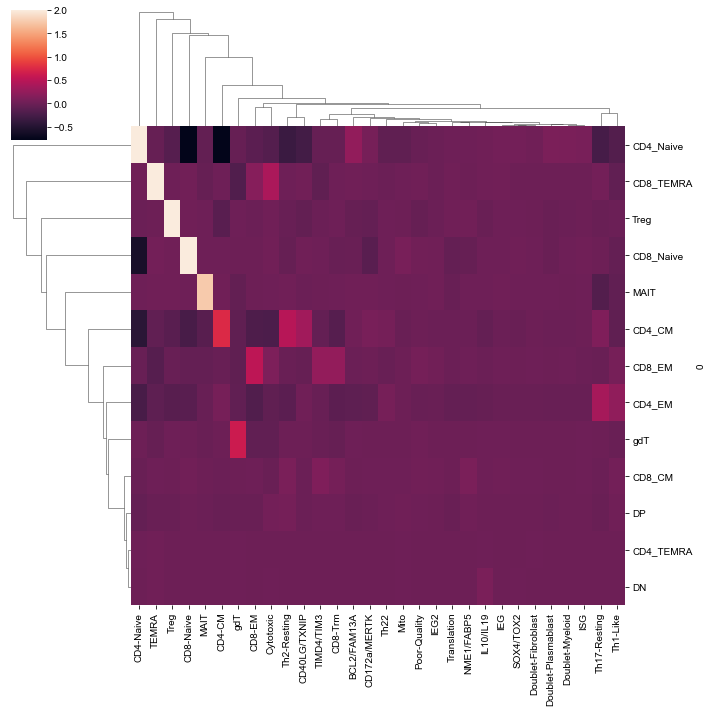

In [31]:
sns.clustermap(allH, vmax=2)

In [32]:
forsumm = allH.T

for c in ['Treg', 'gdT', 'MAIT', 'CD4_Naive', 'CD8_Naive', 'CD4_CM', 'CD4_EM', 'CD8_TEMRA']:
    Z = forsumm[c].sort_values(ascending=False)
    maxind = Z.index[0]
    print(c, maxind, Z.iloc[0], Z.iloc[0] - Z.iloc[1], allP.loc[c, maxind])

Treg Treg 2.3362821478400293 2.3116788090781037 0.0
gdT gdT 0.6130202682915281 0.5907503686473667 0.0
MAIT MAIT 1.7561558427192405 1.73565928974489 0.0
CD4_Naive CD4-Naive 2.6482902789763276 2.4171014348078597 0.0
CD8_Naive CD8-Naive 2.1955760157256217 2.1239593863041195 0.0
CD4_CM CD4-CM 0.744693191313853 0.2716076586757223 0.0
CD4_EM Th17-Resting 0.3617206532897407 0.14020540066325238 0.0
CD8_TEMRA TEMRA 2.7198200499174545 2.319633514893871 0.0


In [33]:
allH.loc['CD4_EM', :].sort_values(ascending=False)

Th17-Resting           0.361721
Th1-Like               0.221515
CD4-CM                 0.060949
Th22                   0.059915
CD40LG/TXNIP           0.013268
Mito                  -0.002578
Doublet-Fibroblast    -0.021162
IEG2                  -0.024565
SOX4/TOX2             -0.024750
IEG                   -0.025857
TIMD4/TIM3            -0.032180
Doublet-Myeloid       -0.034502
Poor-Quality          -0.036136
Doublet-Plasmablast   -0.036797
ISG                   -0.037448
MAIT                  -0.039042
IL10/IL19             -0.044632
NME1/FABP5            -0.060364
Translation           -0.062619
gdT                   -0.081923
Cytotoxic             -0.090147
CD172a/MERTK          -0.095102
TEMRA                 -0.098617
BCL2/FAM13A           -0.103466
CD8-Trm               -0.110506
Th2-Resting           -0.119454
CD8-Naive             -0.138648
Treg                  -0.148373
CD8-EM                -0.189395
CD4-Naive             -0.250100
Name: CD4_EM, dtype: float64

In [34]:
allP.loc['CD4_EM', :].sort_values(ascending=True)

Th1-Like                0.000000e+00
Th17-Resting            0.000000e+00
CD8-EM                  0.000000e+00
CD4-Naive               0.000000e+00
Treg                   2.703577e-233
CD8-Naive              9.359279e-196
Th2-Resting            4.154364e-190
CD8-Trm                2.285745e-176
BCL2/FAM13A            2.842383e-148
CD172a/MERTK           9.979387e-123
TEMRA                  9.548215e-116
gdT                     2.884913e-94
CD4-CM                  1.398189e-49
Cytotoxic               2.140730e-49
NME1/FABP5              2.396279e-49
Th22                    2.103668e-43
IL10/IL19               9.017641e-37
Translation             8.361355e-36
Doublet-Plasmablast     2.054499e-23
ISG                     3.791589e-23
MAIT                    6.506907e-23
Doublet-Myeloid         3.009150e-22
TIMD4/TIM3              3.492384e-16
Poor-Quality            1.315608e-15
SOX4/TOX2               2.801068e-13
IEG                     3.404278e-11
IEG2                    5.042530e-11
D

In [ ]:
allH = pd.read_csv(os.path.join(outdir, 'MultiLR_GEPPredictGating_Beta.tsv'), index_col = 0, sep = 't')
allP = pd.read_csv(os.path.join(outdir, 'MultiLR_GEPPredictGating_P.tsv'), index_col = 0, sep = 't')

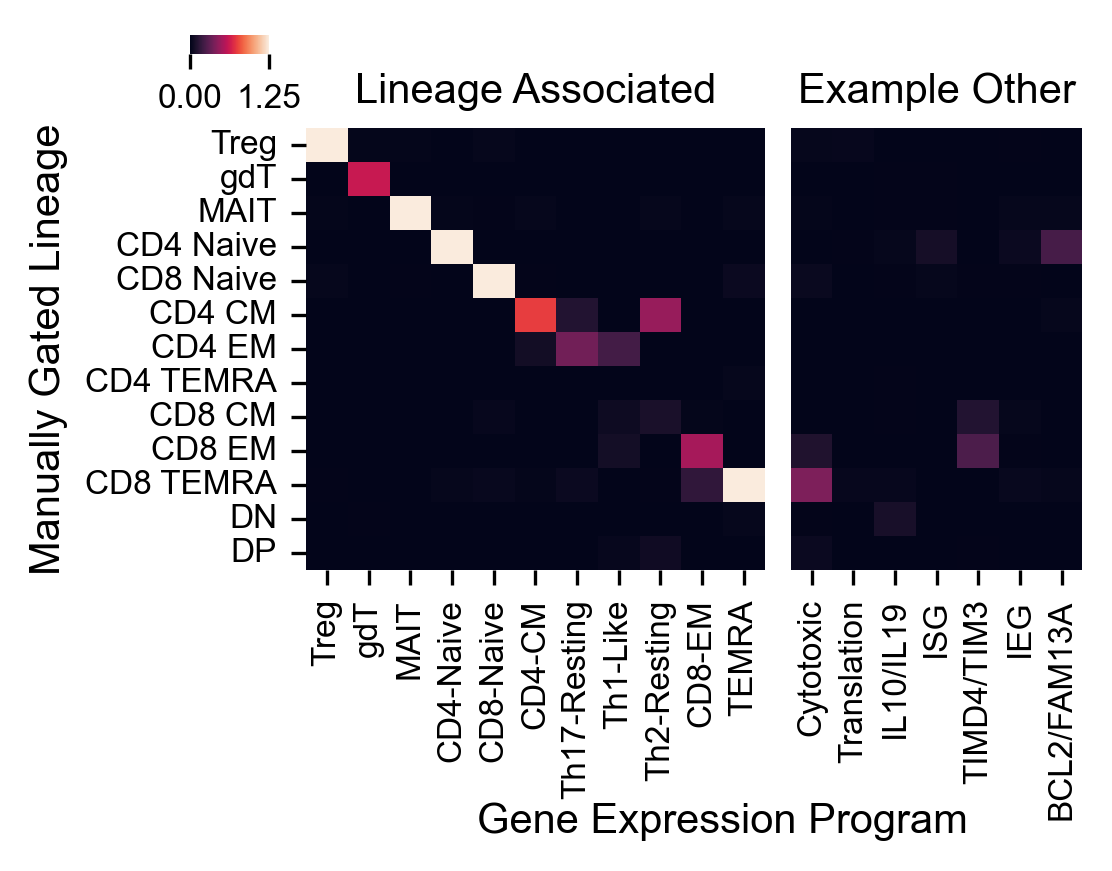

In [39]:

lineage_geps = ['Treg', 'gdT', 'MAIT', 'CD4-Naive', 'CD8-Naive',  'CD4-CM', 'Th17-Resting', 'Th1-Like',  'Th2-Resting',  'CD8-EM', 'TEMRA']
other_geps = ['Cytotoxic', 'Translation', 'IL10/IL19', 'ISG', 'TIMD4/TIM3', 'IEG', 'BCL2/FAM13A']
#other_geps = ['Cytotoxic', 'Translation', 'IL10/IL19-Secretion', 'HLA', 'CellCycle-S', 'ISG',  'Early-Activation']


'''
other_geps = [ 'IL10/CD38', 'CTLA4+CD38+',
 'CellCycle-G2M',
 'CellCycle-Histone',
 'CellCycle-S',
 'Cytoskeleton',
 'IL26/CTSH',
 'Metallothionein',
'S100A10/LMNA', 'MALAT1',  'ISG', 'Mito', 'HLA',  'Cytotoxic',  'HeatShock2', 'IEG']
'''
gep_order = lineage_geps + other_geps

vmin = 0 #allH.min().min()
vmax= 1.25


fig = plt.figure(figsize=(4, 3), dpi=300)
gs = gridspec.GridSpec(2, 3, width_ratios=[0.05, frac_lineage, frac_other], height_ratios=[.1,.9], wspace=0.1, bottom=0.3, top=.9, left=0.2)

# Colorbar axis
top_ax = fig.add_subplot(gs[0, 0:2])
lin_ax = fig.add_subplot(gs[1,1])
other_ax = fig.add_subplot(gs[1, 2])
top_ax.axis('off')


cax = top_ax.inset_axes([-0.1, .5, 0.15, 0.4], transform=top_ax.transAxes)
#fig.colorbar(scim, ax=axes[x,y], cax=cax, orientation='horizontal')



sns.heatmap(allH.loc[:,lineage_geps], ax=lin_ax, cbar_ax=cax,
            xticklabels=True, cbar_kws={'orientation':'horizontal', 'ticks':[vmin,vmax], 'shrink':0.1, 'aspect':30},
            vmin=vmin, vmax=vmax)
sns.heatmap(allH.loc[:,other_geps], ax=other_ax, cbar=False, vmin=vmin, vmax=vmax, xticklabels=True)
other_ax.set_yticks([])
lin_ax.set_ylabel('Manually Gated Lineage', fontsize=10)
other_ax.set_ylabel('')
fig.text(0.6, 0.02, 'Gene Expression Program', ha='center', va='center', fontsize=10)

lin_ax.set_yticks(np.arange(cluster_norm.shape[0])+0.5)
lin_ax.set_yticklabels([x.replace('_', ' ') for x in cluster_norm.index], fontsize=8)

lin_ax.set_xticks(np.arange(len(lineage_geps))+0.5)
lin_ax.set_xticklabels(lineage_geps, fontsize=8)

other_ax.set_xticks(np.arange(len(other_geps))+0.5)
other_ax.set_xticklabels([x.replace('-Secretion', '').replace('-Activation', '') for x in other_geps], fontsize=8)

lin_ax.set_title('Lineage Associated', fontsize=10)
other_ax.set_title('Example Other', fontsize=10)


cax.tick_params(labelsize=8)

plt.savefig(os.path.join(figdir, 'LineageAssociate_Logistic_COMBAT.png'))
plt.savefig(os.path.join(figdir, 'LineageAssociate_Logistic_COMBAT.pdf'))

In [151]:
len(set(allH.columns) - set(lineage_geps)), len(other_geps)

(19, 7)

<AxesSubplot:ylabel='0'>

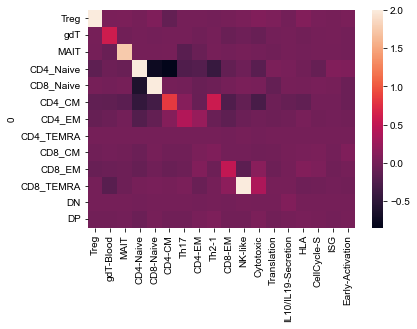

In [98]:
sns.heatmap(allH, vmax=2)

In [78]:
label.index

Index(['AAACCTGAGCGGATCA-1-gPlexA1', 'AAACCTGCAGCTCGAC-1-gPlexA1',
       'AAACCTGCATCTATGG-1-gPlexA1', 'AAACCTGGTCTCTCTG-1-gPlexA1',
       'AAACCTGTCACCGGGT-1-gPlexA1', 'AAACCTGTCAGAGCTT-1-gPlexA1',
       'AAACCTGTCCAAACAC-1-gPlexA1', 'AAACCTGTCCAAATGC-1-gPlexA1',
       'AAACCTGTCCTTGCCA-1-gPlexA1', 'AAACCTGTCGGTCCGA-1-gPlexA1',
       ...
       'TTTGGTTGTAGCCTCG-1-gPlexK7', 'TTTGGTTGTCAGGACA-1-gPlexK7',
       'TTTGGTTGTCTAGAGG-1-gPlexK7', 'TTTGGTTGTCTGCAAT-1-gPlexK7',
       'TTTGGTTGTTGTCGCG-1-gPlexK7', 'TTTGGTTTCCTCAACC-1-gPlexK7',
       'TTTGGTTTCTCGATGA-1-gPlexK7', 'TTTGTCACACCACGTG-1-gPlexK7',
       'TTTGTCAGTTACCGAT-1-gPlexK7', 'TTTGTCATCCTCTAGC-1-gPlexK7'],
      dtype='object', length=400925)

In [43]:
tcat_usage_norm.loc[label==gate, mapping[gate]]

Series([], Name: CD8-Naive, dtype: float64)

In [46]:
gate
               

'CD4 Naive'

In [174]:
import matplotlib
matplotlib.figure.Figure.colorbar(

In [164]:
cluster_norm

Treg  gdT-Blood      MAIT  CD4-Naive  CD8-Naive    CD4-CM  \
Treg       0.678289   0.009151  0.012540   0.026159   0.017456  0.105966   
gdT        0.010226   0.414525  0.123993   0.010334   0.015418  0.017462   
MAIT       0.010620   0.120702  0.622088   0.009169   0.017704  0.016955   
CD4_Naive  0.030085   0.011689  0.015024   0.314125   0.118913  0.100101   
CD8_Naive  0.016660   0.017728  0.015891   0.158562   0.436646  0.042493   
CD4_CM     0.061160   0.012751  0.021567   0.116816   0.050986  0.224482   
CD4_EM     0.045179   0.024936  0.053359   0.051703   0.029889  0.182011   
CD4_TEMRA  0.029457   0.059192  0.021256   0.169275   0.068923  0.077709   
CD8_CM     0.027195   0.035327  0.021137   0.041216   0.086357  0.059780   
CD8_EM     0.017098   0.068438  0.023869   0.012615   0.031468  0.029976   
CD8_TEMRA  0.011082   0.095272  0.017634   0.009047   0.022215  0.014789   
DN         0.028302   0.086886  0.024582   0.027567   0.033744  0.062334   
DP         0.034646   0.043402  0.027060   0.053414   0.070282  0.065941   

               Th17    CD4-EM     Th2-1    CD8-EM   NK-like  Cytotoxic  \
Treg       0.066981  0.033089  0.060261  0.015621  0.012499   0.007329   
gdT        0.026670  0.080098  0.022672  0.104771  0.111563   0.145403   
MAIT       0.084145  0.114746  0.024720  0.092320  0.042481   0.026804   
CD4_Naive  0.050963  0.034895  0.062046  0.010863  0.012441   0.004970   
CD8_Naive  0.039157  0.042940  0.038912  0.029188  0.022941   0.009888   
CD4_CM     0.174521  0.079573  0.180914  0.015536  0.010536   0.007794   
CD4_EM     0.287860  0.145010  0.114456  0.032241  0.014874   0.037119   
CD4_TEMRA  0.050607  0.039341  0.048930  0.027353  0.201152   0.067123   
CD8_CM     0.068940  0.126937  0.209123  0.073351  0.028660   0.031683   
CD8_EM     0.027237  0.122189  0.032578  0.232059  0.065678   0.160567   
CD8_TEMRA  0.014663  0.049824  0.017525  0.210439  0.231035   0.257964   
DN         0.034372  0.031471  0.028689  0.082419  0.199066   0.134990   
DP         0.073884  0.099886  0.159173  0.073839  0.047076   0.108365   

           Translation  IL10/IL19-Secretion       HLA  CellCycle-S       ISG  \
Treg          0.040633             0.041524  0.235913     0.101439  0.109023   
gdT           0.022574             0.014747  0.061786     0.044662  0.092293   
MAIT          0.027174             0.017832  0.029790     0.016074  0.054112   
CD4_Naive     0.188690             0.031962  0.011703     0.022518  0.074165   
CD8_Naive     0.159623             0.041364  0.016137     0.021040  0.062615   
CD4_CM        0.128569             0.026500  0.034660     0.052432  0.087690   
CD4_EM        0.097048             0.025186  0.057694     0.044952  0.086077   
CD4_TEMRA     0.113969             0.088002  0.026080     0.062541  0.071485   
CD8_CM        0.075303             0.051516  0.100132     0.281164  0.071876   
CD8_EM        0.030953             0.036362  0.147569     0.118390  0.067568   
CD8_TEMRA     0.021139             0.018807  0.109217     0.035307  0.065109   
DN            0.021182             0.571023  0.076483     0.091662  0.078134   
DP            0.073145             0.035175  0.092837     0.107817  0.079853   

           Early-Activation  
Treg               0.064294  
gdT                0.025537  
MAIT               0.025176  
CD4_Naive          0.086178  
CD8_Naive          0.071313  
CD4_CM             0.080830  
CD4_EM             0.063040  
CD4_TEMRA          0.058888  
CD8_CM             0.268688  
CD8_EM             0.084236  
CD8_TEMRA          0.021424  
DN                 0.040757  
DP                 0.109639

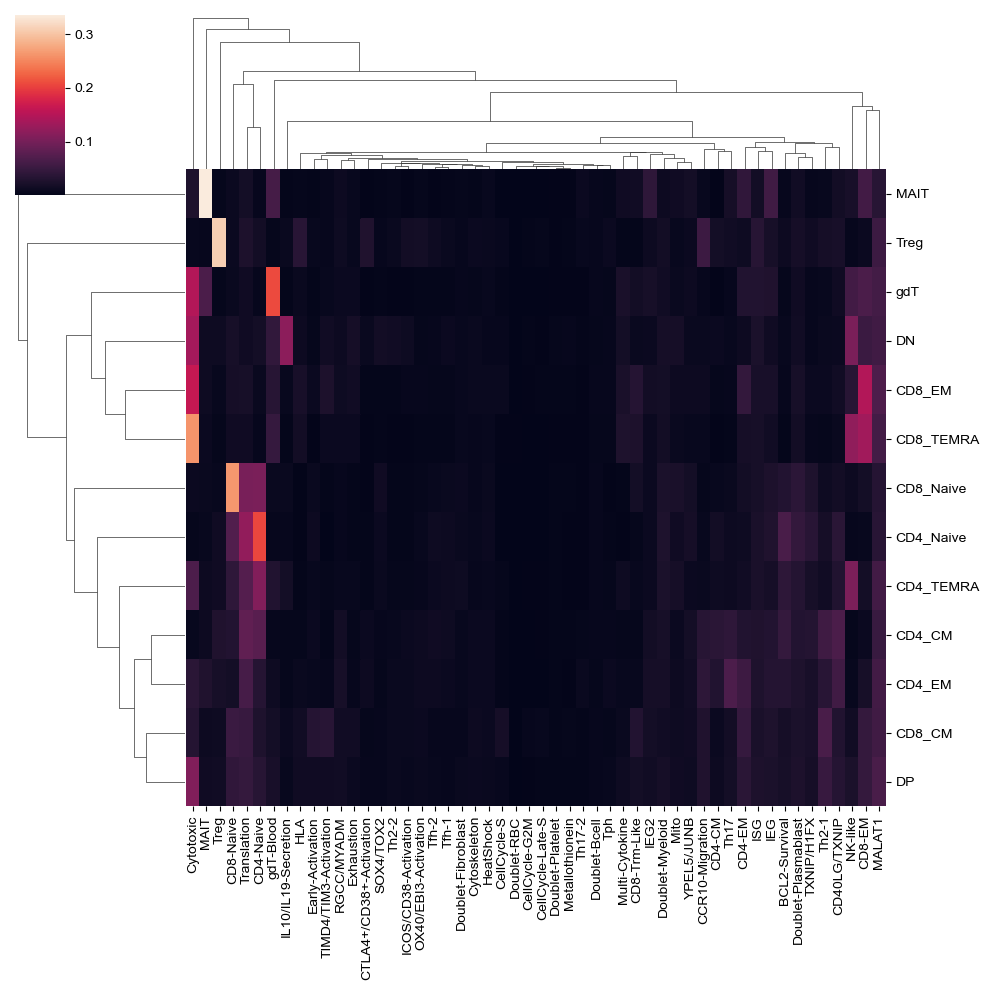

In [134]:
cluster = tcat_usage_norm.groupby(label).mean()

sns.clustermap(cluster, xticklabels=True, yticklabels=True)

In [149]:
cluster = tcat_usage_norm.groupby(label).mean()
cluster_norm = cluster.div(cluster.sum(axis=0), axis=1)

cluster.max(axis=0).sort_values(ascending=False)

MAIT                       0.336009
Treg                       0.309885
CD8-Naive                  0.264405
Cytotoxic                  0.262474
gdT-Blood                  0.208910
CD4-Naive                  0.206468
CD8-EM                     0.148302
Translation                0.122491
NK-like                    0.121076
IL10/IL19-Secretion        0.118910
MALAT1                     0.069545
Th17                       0.068153
CD40LG/TXNIP               0.066489
Th2-1                      0.065517
BCL2-Survival              0.064927
IEG                        0.056785
CD4-EM                     0.054522
CCR10-Migration            0.052808
Doublet-Plasmablast        0.045497
IEG2                       0.041976
CD4-CM                     0.037428
TXNIP/H1FX                 0.036427
HLA                        0.036077
TIMD4/TIM3-Activation      0.035859
ISG                        0.034937
Early-Activation           0.034047
CD8-Trm-Like               0.033528
CTLA4+/CD38+-Activation    0

In [150]:
cluster_norm.max(axis=0).sort_values(ascending=False)

Treg                       0.678289
MAIT                       0.622088
IL10/IL19-Secretion        0.571023
CD8-Naive                  0.436646
gdT-Blood                  0.414525
CTLA4+/CD38+-Activation    0.315872
CD4-Naive                  0.314125
Th17                       0.287860
CellCycle-S                0.281164
Early-Activation           0.268688
Cytotoxic                  0.257964
TIMD4/TIM3-Activation      0.255774
CellCycle-G2M              0.246800
HLA                        0.235913
CD8-EM                     0.232059
CellCycle-Late-S           0.231854
NK-like                    0.231035
CD4-CM                     0.224482
BCL2-Survival              0.221834
CCR10-Migration            0.214421
Th2-1                      0.209123
IEG2                       0.199292
Translation                0.188690
Th2-2                      0.188141
CD40LG/TXNIP               0.184946
ICOS/CD38-Activation       0.184116
Th17-2                     0.182808
OX40/EBI3-Activation       0

# Scratch

## Scratch - Polarization gating

In [ ]:
ind = gating['CD4_Conv'].isin(['CD4_CM', 'CD4_EM']) | gating['CD8_Conv'].isin(['CD8_CM', 'CD8_EM'])
gep = 'Th2'

pairs = [('AB_CD194', 'GATA3'), ('CCR4', 'GATA3'), ('IL4', 'GATA3'), ('IL4R', 'GATA3')]
vmax=0.3

    
for g1,g2 in pairs:

    x = markers_magic.loc[ind, g1]
    y = markers_magic.loc[ind, g2]
    c = tcat_usage_ren.loc[ind, gep]

    (fig,ax) = plt.subplots(1,1, figsize=(2,2), dpi=200)
    ax.scatter(x,y,c=c, vmin=0, vmax=vmax, s=1, edgecolor='None')
    
    if 'AB_' in g1:
        ax.set_xlabel(g1)
    else:
        ax.set_xlabel(g1 + ' RNA')
        
    if 'AB_' in g2:
        ax.set_ylabel(g2)
    else:
        ax.set_ylabel(g2 + ' RNA')
        
        
        ax.set_title(gep + ' Usage')

In [48]:
ind = gating['CD4_Conv'].isin(['CD4_CM', 'CD4_EM']) | gating['CD8_Conv'].isin(['CD8_CM', 'CD8_EM'])
gep = 'CCR3+-Th2'

pairs = [('AB_CD194', 'GATA3'), ('CCR4', 'GATA3'), ('IL4', 'GATA3'), ('IL4R', 'GATA3')]
vmax=0.3

for g1,g2 in pairs:

    x = markers_magic.loc[ind, g1]
    y = markers_magic.loc[ind, g2]
    c = tcat_usage_ren.loc[ind, gep]

    (fig,ax) = plt.subplots(1,1, figsize=(2,2), dpi=200)
    ax.scatter(x,y,c=c, vmin=0, vmax=vmax, s=1, edgecolor='None')
    
    if 'AB_' in g1:
        ax.set_xlabel(g1)
    else:
        ax.set_xlabel(g1 + ' RNA')
        
    if 'AB_' in g2:
        ax.set_ylabel(g2)
    else:
        ax.set_ylabel(g2 + ' RNA')
        
        
        ax.set_title(gep + ' Usage')

NameError: name 'tcat_usage_ren' is not defined

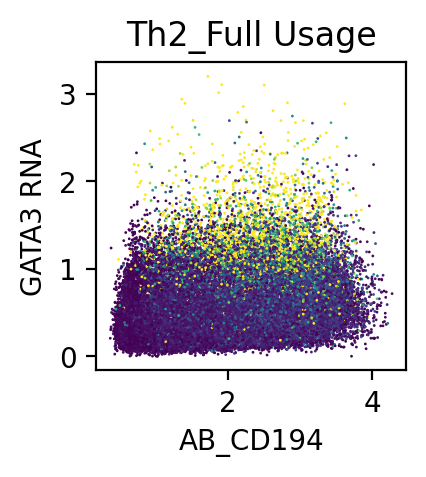

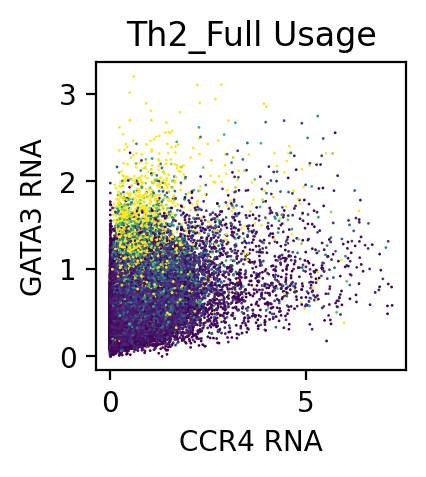

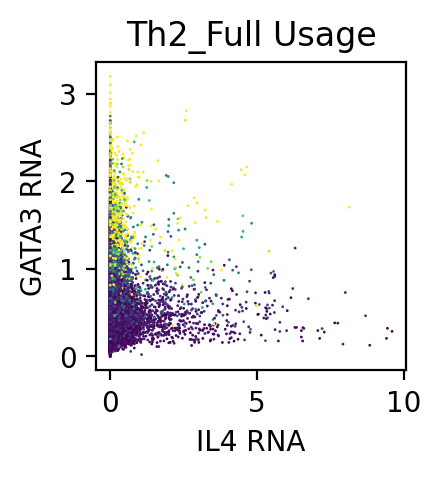

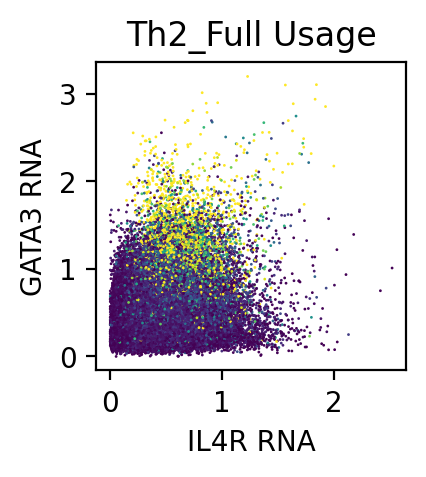

In [595]:
ind = gating['CD4_Conv'].isin(['CD4_CM', 'CD4_EM']) | gating['CD8_Conv'].isin(['CD8_CM', 'CD8_EM'])

pairs = [('AB_CD194', 'GATA3'), ('CCR4', 'GATA3'), ('IL4', 'GATA3'), ('IL4R', 'GATA3')]
vmax=0.3

tcat_usage_ren2 = tcat_usage_ren.copy()
tcat_usage_ren2['Th2_Full'] = tcat_usage_ren2['Th2'] + tcat_usage_ren2['CCR3+-Th2']
gep = 'Th2_Full'


for g1,g2 in pairs:

    x = markers_magic.loc[ind, g1]
    y = markers_magic.loc[ind, g2]
    c = tcat_usage_ren2.loc[ind, gep]

    (fig,ax) = plt.subplots(1,1, figsize=(2,2), dpi=200)
    ax.scatter(x,y,c=c, vmin=0, vmax=vmax, s=1, edgecolor='None')
    
    if 'AB_' in g1:
        ax.set_xlabel(g1)
    else:
        ax.set_xlabel(g1 + ' RNA')
        
    if 'AB_' in g2:
        ax.set_ylabel(g2)
    else:
        ax.set_ylabel(g2 + ' RNA')
        
        
        ax.set_title(gep + ' Usage')

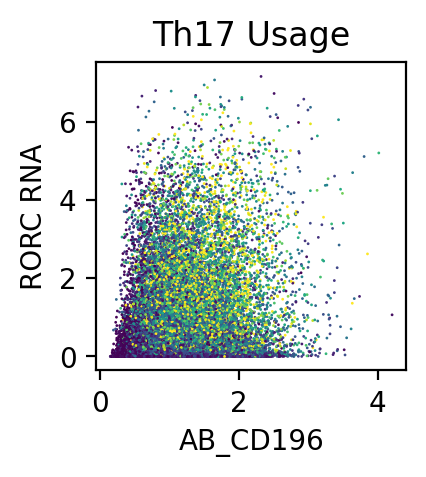

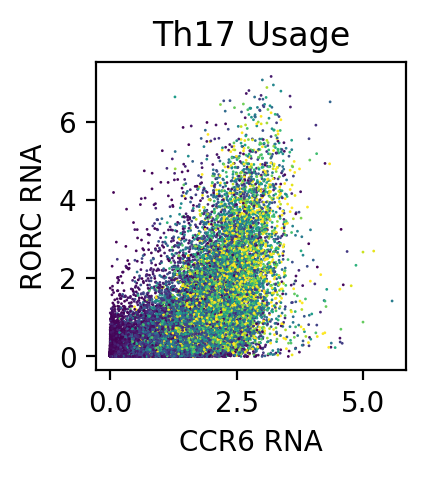

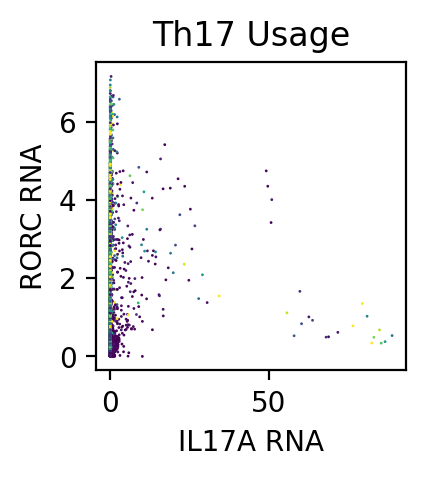

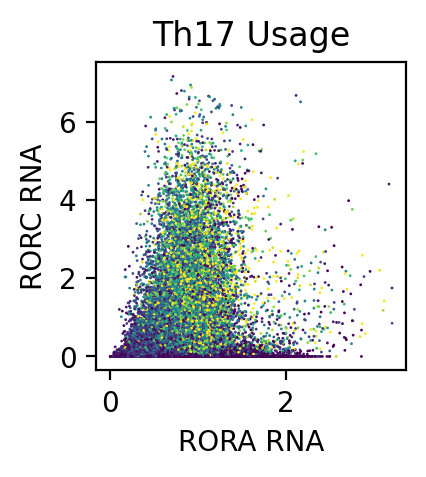

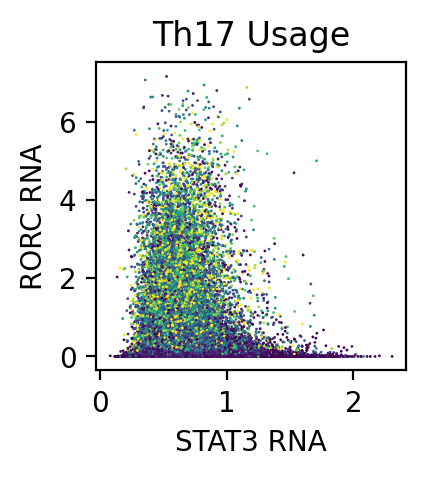

In [594]:
ind = gating['CD4_Conv'].isin(['CD4_CM', 'CD4_EM']) | gating['CD8_Conv'].isin(['CD8_CM', 'CD8_EM'])
gep = 'Th17'

pairs = [('AB_CD196', 'RORC'), ('CCR6', 'RORC'), ('IL17A', 'RORC'), ('RORA', 'RORC'), ('STAT3', 'RORC')]
vmax=0.3

for g1,g2 in pairs:

    x = markers_magic.loc[ind, g1]
    y = markers_magic.loc[ind, g2]
    c = tcat_usage_ren.loc[ind, gep]

    (fig,ax) = plt.subplots(1,1, figsize=(2,2), dpi=200)
    ax.scatter(x,y,c=c, vmin=0, vmax=vmax, s=1, edgecolor='None')
    
    if 'AB_' in g1:
        ax.set_xlabel(g1)
    else:
        ax.set_xlabel(g1 + ' RNA')
        
    if 'AB_' in g2:
        ax.set_ylabel(g2)
    else:
        ax.set_ylabel(g2 + ' RNA')
        
        
        ax.set_title(gep + ' Usage')

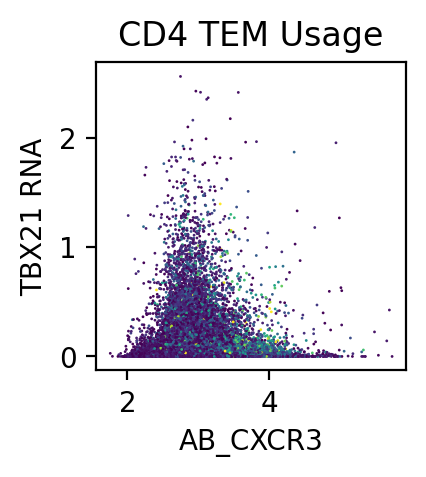

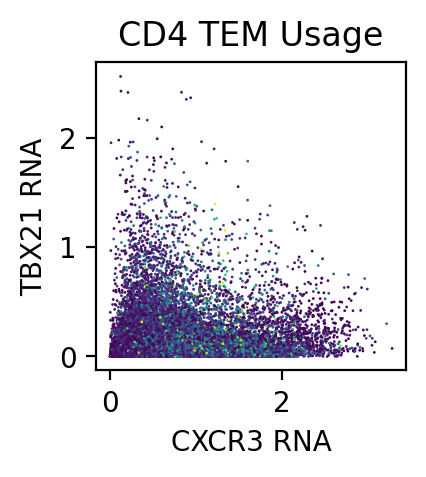

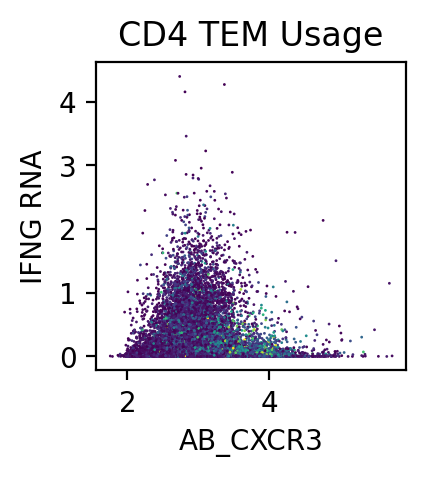

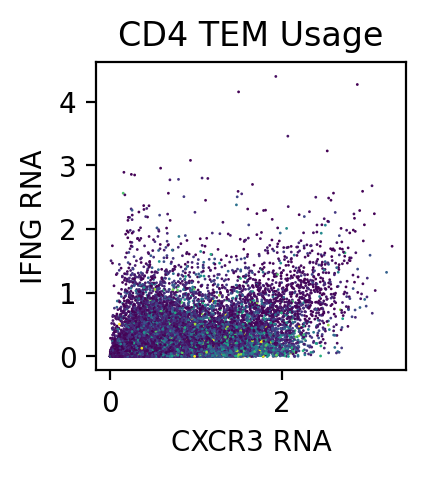

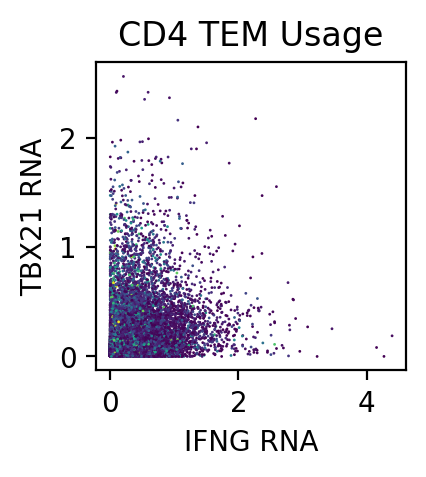

In [590]:
ind = gating['CD4_Conv'].isin([ 'CD4_EM'])
gep = 'CD4 TEM'

pairs = [('AB_CXCR3', 'TBX21'), ('CXCR3', 'TBX21'), ('AB_CXCR3', 'IFNG'), ('CXCR3', 'IFNG'), ('IFNG', 'TBX21')]
vmax=0.3

for g1,g2 in pairs:

    x = markers_magic.loc[ind, g1]
    y = markers_magic.loc[ind, g2]
    c = tcat_usage_ren.loc[ind, gep]

    (fig,ax) = plt.subplots(1,1, figsize=(2,2), dpi=200)
    ax.scatter(x,y,c=c, vmin=0, vmax=vmax, s=1, edgecolor='None')
    
    if 'AB_' in g1:
        ax.set_xlabel(g1)
    else:
        ax.set_xlabel(g1 + ' RNA')
        
    if 'AB_' in g2:
        ax.set_ylabel(g2)
    else:
        ax.set_ylabel(g2 + ' RNA')
        
        
        ax.set_title(gep + ' Usage')

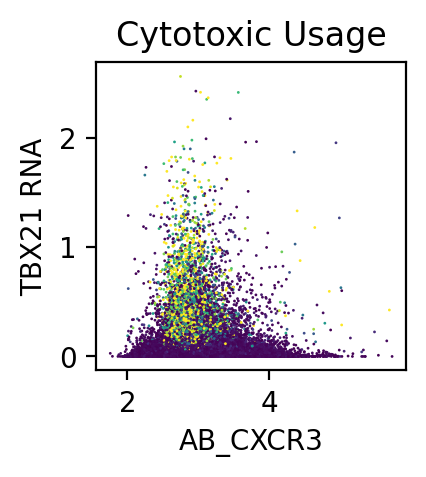

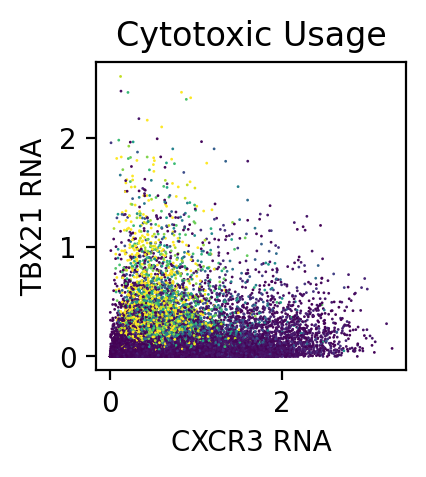

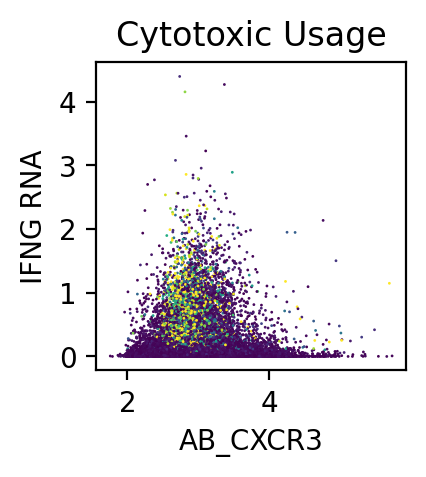

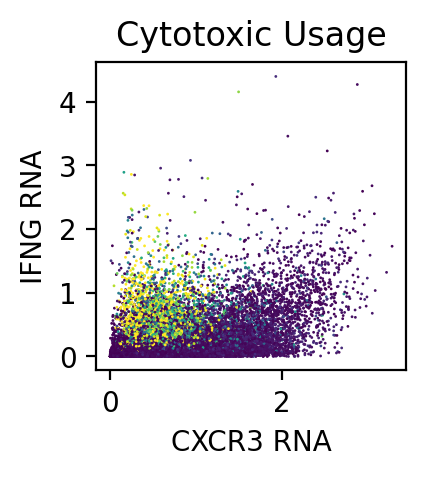

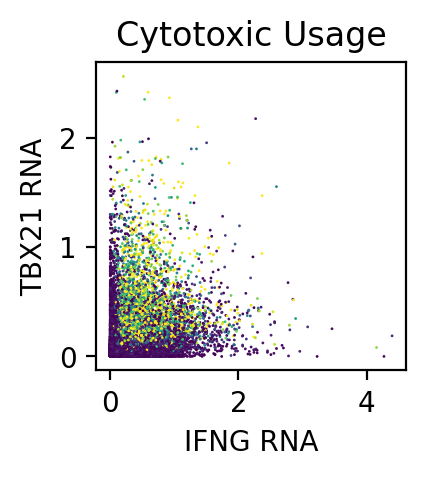

In [591]:
ind = gating['CD4_Conv'].isin([ 'CD4_EM'])
gep = 'Cytotoxic'

pairs = [('AB_CXCR3', 'TBX21'), ('CXCR3', 'TBX21'), ('AB_CXCR3', 'IFNG'), ('CXCR3', 'IFNG'), ('IFNG', 'TBX21')]
vmax=0.3

for g1,g2 in pairs:

    x = markers_magic.loc[ind, g1]
    y = markers_magic.loc[ind, g2]
    c = tcat_usage_ren.loc[ind, gep]

    (fig,ax) = plt.subplots(1,1, figsize=(2,2), dpi=200)
    ax.scatter(x,y,c=c, vmin=0, vmax=vmax, s=1, edgecolor='None')
    
    if 'AB_' in g1:
        ax.set_xlabel(g1)
    else:
        ax.set_xlabel(g1 + ' RNA')
        
    if 'AB_' in g2:
        ax.set_ylabel(g2)
    else:
        ax.set_ylabel(g2 + ' RNA')
        
        
        ax.set_title(gep + ' Usage')

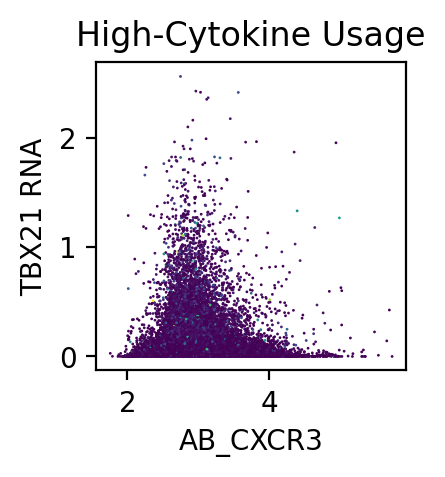

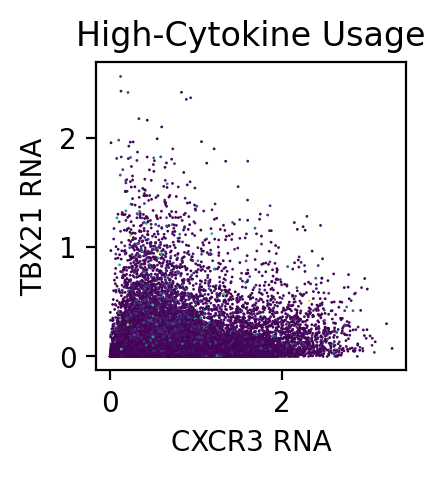

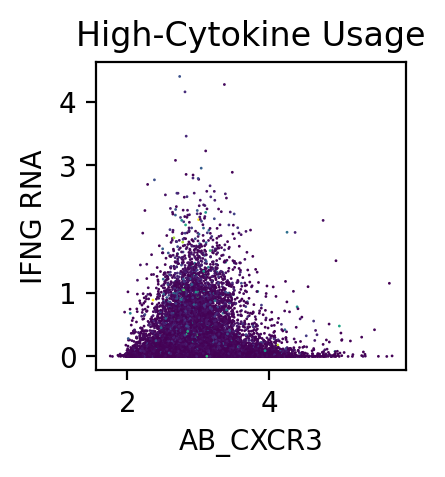

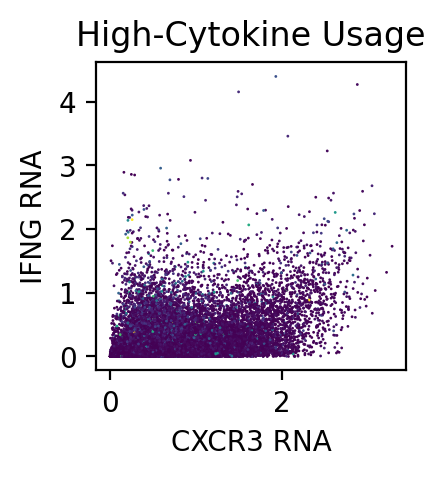

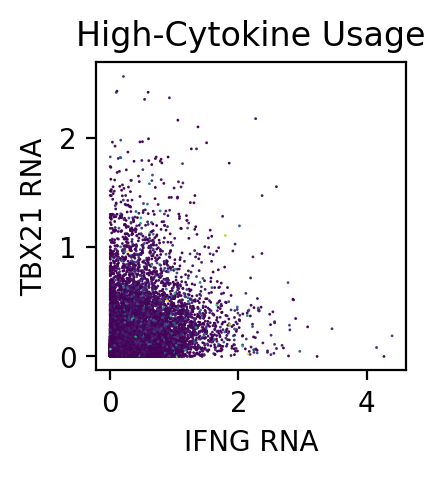

In [599]:
ind = gating['CD4_Conv'].isin([ 'CD4_EM'])
gep = 'High-Cytokine'

pairs = [('AB_CXCR3', 'TBX21'), ('CXCR3', 'TBX21'), ('AB_CXCR3', 'IFNG'), ('CXCR3', 'IFNG'), ('IFNG', 'TBX21')]
vmax=0.3

for g1,g2 in pairs:

    x = markers_magic.loc[ind, g1]
    y = markers_magic.loc[ind, g2]
    c = tcat_usage_ren.loc[ind, gep]

    (fig,ax) = plt.subplots(1,1, figsize=(2,2), dpi=200)
    ax.scatter(x,y,c=c, vmin=0, vmax=vmax, s=1, edgecolor='None')
    
    if 'AB_' in g1:
        ax.set_xlabel(g1)
    else:
        ax.set_xlabel(g1 + ' RNA')
        
    if 'AB_' in g2:
        ax.set_ylabel(g2)
    else:
        ax.set_ylabel(g2 + ' RNA')
        
        
        ax.set_title(gep + ' Usage')

Text(0.5, 1.0, 'Th2 Usage')

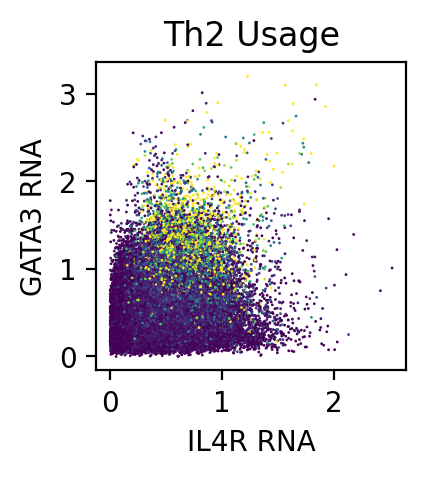

In [524]:
ind = gating['CD4_Conv'].isin(['CD4_CM', 'CD4_EM', 'CD4_TEMRA']) | gating['CD8_Conv'].isin(['CD8_CM', 'CD8_EM', 'CD8_TEMRA'])
g1 = 'IL4R'   
g2 = 'GATA3'
gep = 'Th2'
x = markers_magic.loc[ind, g1]
y = markers_magic.loc[ind, g2]
c = tcat_usage_ren.loc[ind, gep]
vmax=0.3

(fig,ax) = plt.subplots(1,1, figsize=(2,2), dpi=200)
ax.scatter(x,y,c=c, vmin=0, vmax=vmax, s=1, edgecolor='None')
ax.set_xlabel(g1 + ' RNA')
ax.set_ylabel(g2 + ' RNA')
ax.set_title(gep + ' Usage')

In [ ]:
ind = gating['CD4_Conv'].isin(['CD4_CM', 'CD4_EM', 'CD4_TEMRA']) | gating['CD8_Conv'].isin(['CD8_CM', 'CD8_EM', 'CD8_TEMRA'])
g1 = 'AB_CD194'   
g2 = 'GATA3'
gep = 'Th2'
x = markers_magic.loc[ind, g1]
y = markers_magic.loc[ind, g2]
c = tcat_usage_ren.loc[ind, gep]
vmax=0.3

(fig,ax) = plt.subplots(1,1, figsize=(2,2), dpi=200)
ax.scatter(x,y,c=c, vmin=0, vmax=vmax, s=1, edgecolor='None')
ax.set_xlabel(g1)
ax.set_ylabel(g2 + ' RNA')
ax.set_title(gep + ' Usage')

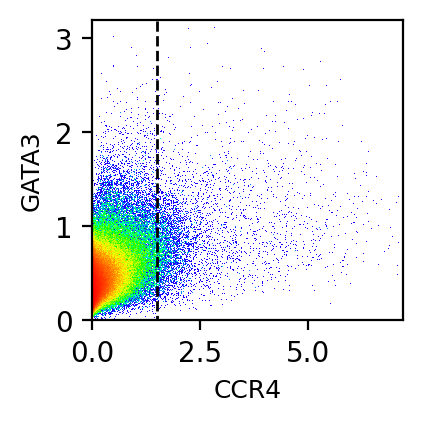

In [488]:

ind = gating['CD4_Conv'].isin(['CD4_CM', 'CD4_EM', 'CD4_TEMRA']) | gating['CD8_Conv'].isin(['CD8_CM', 'CD8_EM', 'CD8_TEMRA'])
_ = gate(markers_magic, g1, g2, ind=ind, quadrant_gate={'vthresh':4.4, 'hthresh':1.5, 'll':'CD8_EM', 'lr':'CD8_EM',
                                                                                    'ul':'CD8_EM', 'ur':'CD8_CM'}, plot_labeled=False)


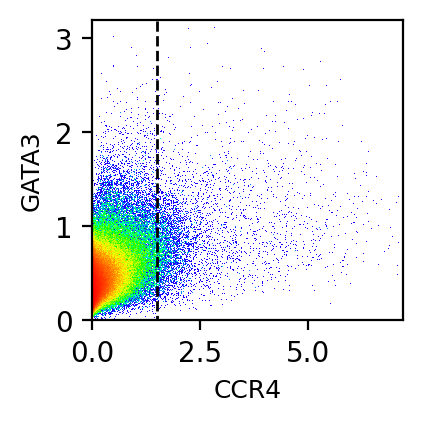

In [489]:
g1 = 'CCR4'   
g2 = 'GATA3'
ind = gating['CD4_Conv'].isin(['CD4_CM', 'CD4_EM', 'CD4_TEMRA']) | gating['CD8_Conv'].isin(['CD8_CM', 'CD8_EM', 'CD8_TEMRA'])
_ = gate(markers_magic, g1, g2, ind=ind, quadrant_gate={'vthresh':4.4, 'hthresh':1.5, 'll':'CD8_EM', 'lr':'CD8_EM',
                                                                                    'ul':'CD8_EM', 'ur':'CD8_CM'}, plot_labeled=False)

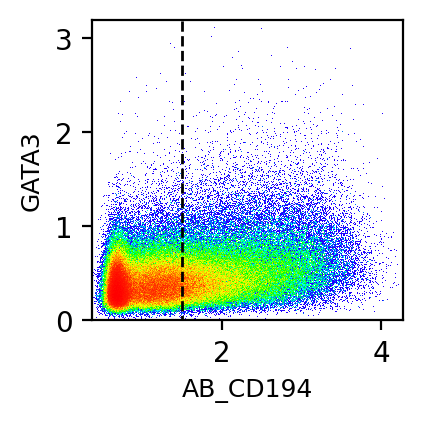

In [490]:
g1 = 'AB_CD194'   
g2 = 'GATA3'
ind = gating['CD4_Conv'].isin(['CD4_CM', 'CD4_EM', 'CD4_TEMRA']) | gating['CD8_Conv'].isin(['CD8_CM', 'CD8_EM', 'CD8_TEMRA'])
_ = gate(markers_magic, g1, g2, ind=ind, quadrant_gate={'vthresh':4.4, 'hthresh':1.5, 'll':'CD8_EM', 'lr':'CD8_EM',
                                                                                    'ul':'CD8_EM', 'ur':'CD8_CM'}, plot_labeled=False)

## Scratch - Overlap with GEPs

In [10]:
params = read_dataset_log('Dataset Paths')
params.index = params['dataset']
params

dataset                                           usage_fn  \
dataset                                                                       
AMP-RA            AMP-RA  /data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....   
Pan-Cancer    Pan-Cancer  /data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...   
TBRU                TBRU  /data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...   
HIV-Vaccine  HIV-Vaccine  /data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...   
UK-Covid        UK-Covid  /data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...   
COMBAT            COMBAT  /data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...   
Pan-Tissue    Pan-Tissue  /data/srlab1/TCAT/Data/PerDataset/XTissueImmun...   
Sparks            Sparks                                                NaN   
Stimseq          Stimseq                                                NaN   

                                                gene_scores_fn  \
dataset                                                          
AMP-RA       /data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....   
Pan-Cancer   /data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...   
TBRU         /data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...   
HIV-Vaccine  /data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...   
UK-Covid     /data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...   
COMBAT       /data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...   
Pan-Tissue   /data/srlab1/TCAT/Data/PerDataset/XTissueImmun...   
Sparks                                                     NaN   
Stimseq                                                    NaN   

                                                   gene_tpm_fn  \
dataset                                                          
AMP-RA       /data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....   
Pan-Cancer   /data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...   
TBRU         /data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...   
HIV-Vaccine  /data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...   
UK-Covid     /data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...   
COMBAT       /data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...   
Pan-Tissue   /data/srlab1/TCAT/Data/PerDataset/XTissueImmun...   
Sparks                                                     NaN   
Stimseq                                                    NaN   

                                                       tcat_fn  \
dataset                                                          
AMP-RA       /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
Pan-Cancer   /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
TBRU         /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
HIV-Vaccine  /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
UK-Covid     /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
COMBAT       /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
Pan-Tissue   /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
Sparks       /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
Stimseq      /data/srlab1/TCAT/Data/PerDataset/Stimseq/TCAT...   

                                        tcat_fn_withsingletons  \
dataset                                                          
AMP-RA       /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
Pan-Cancer   /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
TBRU         /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
HIV-Vaccine  /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
UK-Covid     /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
COMBAT       /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
Pan-Tissue   /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
Sparks                                                     NaN   
Stimseq                                                    NaN   

                                              manual_gating_fn  \
dataset                                                          
AMP-RA                                                     NaN   
Pan-Cancer                               

In [33]:
usage_fn = params.loc['COMBAT', 'usage_fn']
usage = pd.read_csv(usage_fn, sep='\t', index_col=0)
usage = usage.div(usage.sum(axis=1), axis=0)
usage.head()

Translation  Cytoskeleton  CD4_CM-2  \
AAACCTGAGCGGATCA-1-gPlexA1     0.000000      0.039967  0.140465   
AAACCTGCAGCTCGAC-1-gPlexA1     0.352613      0.211923  0.100301   
AAACCTGCATCTATGG-1-gPlexA1     0.031298      0.078306  0.000000   
AAACCTGGTCTCTCTG-1-gPlexA1     0.489791      0.100011  0.050865   
AAACCTGTCACCGGGT-1-gPlexA1     0.000000      0.300108  0.000000   

                            ?AB_CD278/ACTG1  Doublet_Plasmablast  Cytotoxic  \
AAACCTGAGCGGATCA-1-gPlexA1         0.022235             0.017645   0.270219   
AAACCTGCAGCTCGAC-1-gPlexA1         0.072138             0.004305   0.000000   
AAACCTGCATCTATGG-1-gPlexA1         0.002252             0.037020   0.115140   
AAACCTGGTCTCTCTG-1-gPlexA1         0.081117             0.024096   0.000000   
AAACCTGTCACCGGGT-1-gPlexA1         0.058381             0.000000   0.045081   

                            HeatShock  CD8_CD160high  PoorQuality      Mito  \
AAACCTGAGCGGATCA-1-gPlexA1   0.017201       0.021327     0.011049  0.000000   
AAACCTGCAGCTCGAC-1-gPlexA1   0.051446       0.000000     0.000000  0.015186   
AAACCTGCATCTATGG-1-gPlexA1   0.000000       0.199495     0.054947  0.026069   
AAACCTGGTCTCTCTG-1-gPlexA1   0.000000       0.013158     0.030631  0.008986   
AAACCTGTCACCGGGT-1-gPlexA1   0.000000       0.335137     0.000000  0.000000   

                            ...  Metallothionein  CellCycle_Histone2  \
AAACCTGAGCGGATCA-1-gPlexA1  ...         0.008049                 0.0   
AAACCTGCAGCTCGAC-1-gPlexA1  ...         0.000000                 0.0   
AAACCTGCATCTATGG-1-gPlexA1  ...         0.000000                 0.0   
AAACCTGGTCTCTCTG-1-gPlexA1  ...         0.003888                 0.0   
AAACCTGTCACCGGGT-1-gPlexA1  ...         0.000000                 0.0   

                            Doublet_Platelet  Doublet_DC  ?Myeloid      Th17  \
AAACCTGAGCGGATCA-1-gPlexA1          0.000000    0.015403  0.001665  0.000000   
AAACCTGCAGCTCGAC-1-gPlexA1          0.000000    0.000159  0.000000  0.000000   
AAACCTGCATCTATGG-1-gPlexA1          0.000000    0.000167  0.000000  0.000000   
AAACCTGGTCTCTCTG-1-gPlexA1          0.001018    0.000439  0.000000  0.001606   
AAACCTGTCACCGGGT-1-gPlexA1          0.000000    0.000000  0.000000  0.000422   

                            HeatShock2  TRAV24/TBC1D4  Doublet_RBC  \
AAACCTGAGCGGATCA-1-gPlexA1    0.000000       0.000736     0.000000   
AAACCTGCAGCTCGAC-1-gPlexA1    0.000000       0.000000     0.000000   
AAACCTGCATCTATGG-1-gPlexA1    0.000638       0.000000     0.000000   
AAACCTGGTCTCTCTG-1-gPlexA1    0.000927       0.000000     0.000000   
AAACCTGTCACCGGGT-1-gPlexA1    0.000038       0.000000     0.000328   

                            ?PGLYRP1/LTF  
AAACCTGAGCGGATCA-1-gPlexA1      0.000000  
AAACCTGCAGCTCGAC-1-gPlexA1      0.000000  
AAACCTGCATCTATGG-1-gPlexA1      0.000000  
AAACCTGGTCTCTCTG-1-gPlexA1      0.000253  
AAACCTGTCACCGGGT-1-gPlexA1      0.000000  

[5 rows x 44 columns]

In [36]:
outfn = os.path.join(outdir, 'ManualGating.Magic.FinalLabel.20230831.tsv')
print(outfn)

../../../Data/PerDataset/COMBAT/ManualGating.Magic.FinalLabel.20230831.tsv


In [37]:
label = pd.read_csv(outfn, sep='\t', index_col=0)['0']
label.head()

AAACCTGAGCGGATCA-1-gPlexA1       CD8_EM
AAACCTGCAGCTCGAC-1-gPlexA1       CD4_CM
AAACCTGCATCTATGG-1-gPlexA1       CD4_EM
AAACCTGGTCTCTCTG-1-gPlexA1       CD4_CM
AAACCTGTCACCGGGT-1-gPlexA1    CD8_TEMRA
Name: 0, dtype: object

<AxesSubplot: ylabel='0'>

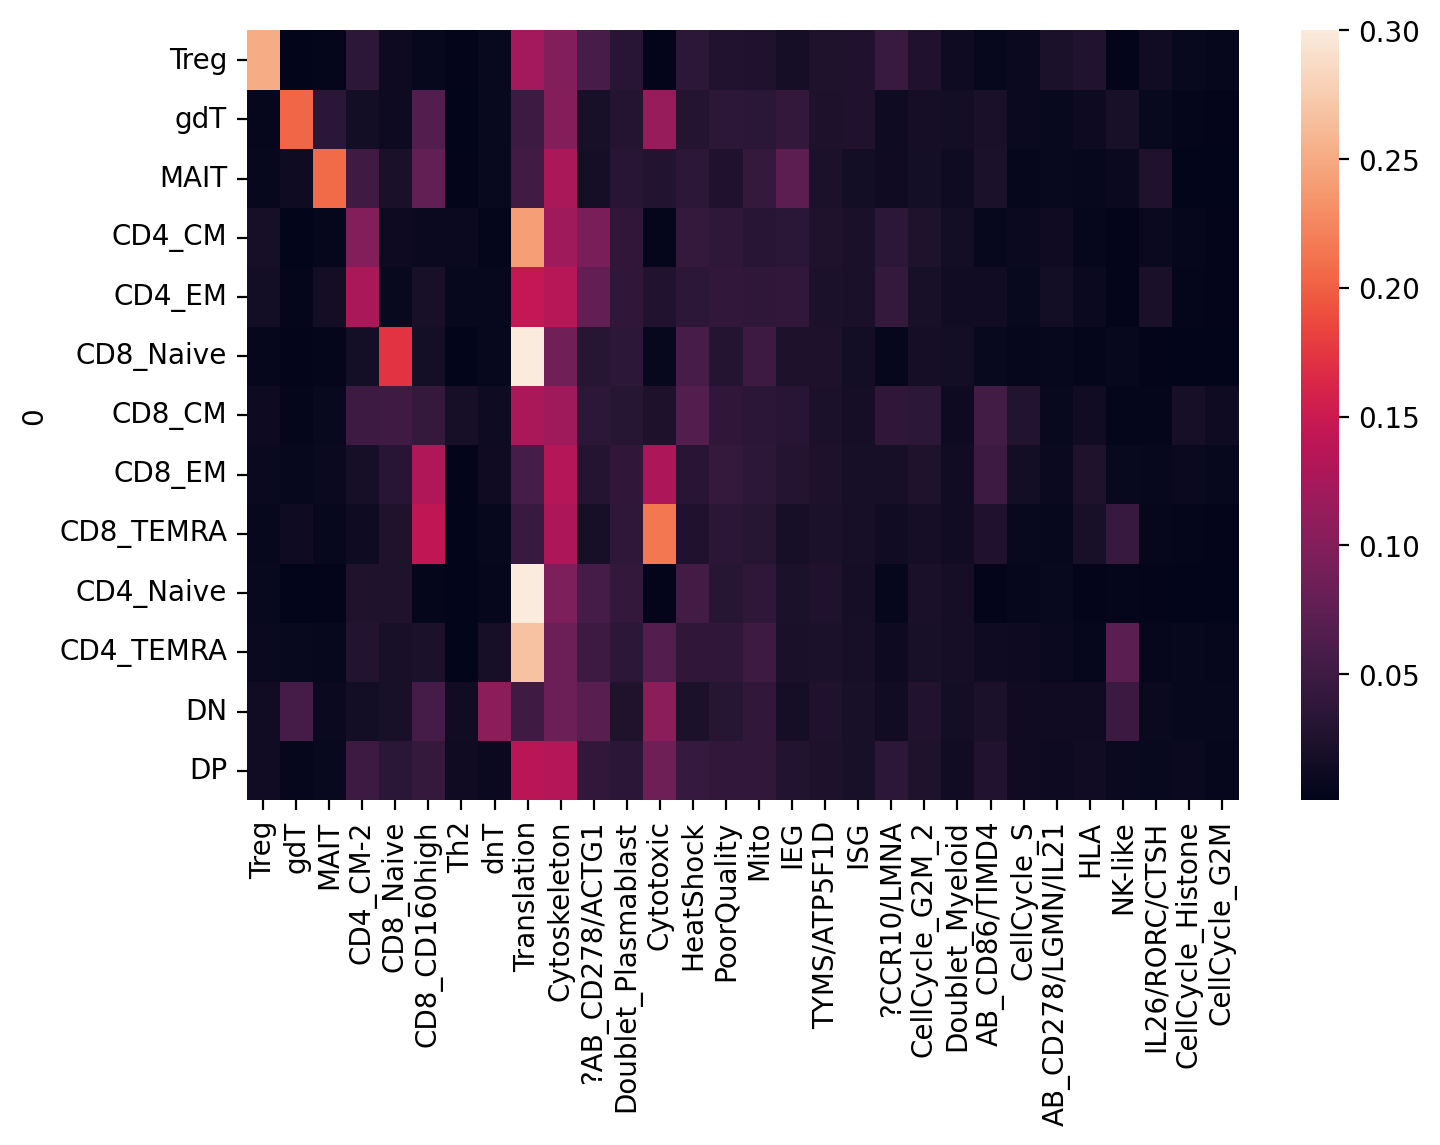

In [38]:
(fig,ax) = plt.subplots(1,1, figsize=(8,5), dpi=200)
cluster = usage.groupby(label).mean()

gep_order = ['Treg',  'gdT','MAIT', 'CD4_CM-2', 'CD8_Naive', 'CD8_CD160high','Th17', 'Th2',  'dnT',
             
        'Translation', 'Cytoskeleton',  '?AB_CD278/ACTG1',
       'Doublet_Plasmablast', 'Cytotoxic', 'HeatShock', 
       'PoorQuality', 'Mito', 'IEG',   'TYMS/ATP5F1D',
       'ISG', '?CCR10/LMNA', 'CellCycle_G2M_2', 'Doublet_Myeloid',
       'AB_CD86/TIMD4', 'CellCycle_S', 'AB_CD278/LGMN/IL21', 'HLA', 'NK-like',
        'IL26/RORC/CTSH',  'CellCycle_Histone', 
       'CellCycle_G2M', 'CellCycle_Histone3', 'Doublet_Plasmablast2',
       'CDO1/IGFL2', 'SFRP4/CADM1', 'Metallothionein', 'CellCycle_Histone2',
       'Doublet_Platelet', 'Doublet_DC', '?Myeloid',  'HeatShock2',
       'TRAV24/TBC1D4', 'Doublet_RBC', '?PGLYRP1/LTF']


lineage_order = ['Treg', 'gdT', 'MAIT', 'CD4_CM', 'CD4_EM',  'CD8_Naive', 'CD8_CM', 'CD8_EM', 'CD8_TEMRA',
                 'CD4_Naive', 'CD4_TEMRA', 'DN', 'DP',  ]

cluster = cluster.loc[lineage_order, gep_order]

max_usage = cluster.max(axis=0).sort_values(ascending=False)
tofilt = max_usage.index[max_usage<0.01]

cluster = cluster.drop(tofilt, axis=1)


sns.heatmap(cluster, ax=ax, xticklabels=True, vmax=0.3)

In [214]:
cluster_info_fn = read_dataset_log('Current Meta-program Paths').at[0, 'clustering_fn']
cluster_info = pd.read_csv(cluster_info_fn, sep='\t', index_col=0)
cluster_info.head()

AMP-RA  \
CellCycle-G2M_CellCycle_G2M                  AMP-RA:CellCycle-G2M   
ISG                                                    AMP-RA:ISG   
gdT                                                           NaN   
Metallothionein                            AMP-RA:Metallothionein   
CellCycle-Sphase_CellCycle_S_DTL/FAM111B  AMP-RA:CellCycle-Sphase   

                                                          UK-Covid  \
CellCycle-G2M_CellCycle_G2M                 UK-Covid:CellCycle_G2M   
ISG                                                   UK-Covid:ISG   
gdT                                                   UK-Covid:gdT   
Metallothionein                           UK-Covid:Metallothionein   
CellCycle-Sphase_CellCycle_S_DTL/FAM111B      UK-Covid:CellCycle_S   

                                                           Pan-Tissue  \
CellCycle-G2M_CellCycle_G2M                  Pan-Tissue:CellCycle-G2M   
ISG                                                    Pan-Tissue:ISG   
gdT                                                               NaN   
Metallothionein                            Pan-Tissue:Metallothionein   
CellCycle-Sphase_CellCycle_S_DTL/FAM111B  Pan-Tissue:CellCycle-Sphase   

                                                        HIV-Vaccine  \
CellCycle-G2M_CellCycle_G2M               HIV-Vaccine:CellCycle_G2M   
ISG                                                 HIV-Vaccine:ISG   
gdT                                                 HIV-Vaccine:gdT   
Metallothionein                                                 NaN   
CellCycle-Sphase_CellCycle_S_DTL/FAM111B    HIV-Vaccine:CellCycle_S   

                                                          COMBAT  \
CellCycle-G2M_CellCycle_G2M                 COMBAT:CellCycle_G2M   
ISG                                                   COMBAT:ISG   
gdT                                                   COMBAT:gdT   
Metallothionein                           COMBAT:Metallothionein   
CellCycle-Sphase_CellCycle_S_DTL/FAM111B      COMBAT:CellCycle_S   

                                                        TBRU  \
CellCycle-G2M_CellCycle_G2M               TBRU:CellCycle_G2M   
ISG                                                 TBRU:ISG   
gdT                                                 TBRU:gdT   
Metallothionein                                          NaN   
CellCycle-Sphase_CellCycle_S_DTL/FAM111B    TBRU:DTL/FAM111B   

                                                           Pan-Cancer  
CellCycle-G2M_CellCycle_G2M                  Pan-Cancer:CellCycle-G2M  
ISG                                                    Pan-Cancer:ISG  
gdT                                                               NaN  
Metallothionein                            Pan-Cancer:Metallothionein  
CellCycle-Sphase_CellCycle_S_DTL/FAM111B  Pan-Cancer:CellCycle-Sphase

In [215]:
tcat_fn = params.loc['COMBAT', 'tcat_fn']
print(tcat_fn)

tcat_usage = pd.read_csv(tcat_fn, sep='\t', index_col=0)
tcat_usage = tcat_usage.div(tcat_usage.sum(axis=1), axis=0)
tcat_usage.head()

/data/srlab1/TCAT/Data/TCAT/TCAT_Usage_20230704.COMBAT.tsv


CellCycle-G2M_CellCycle_G2M       ISG       gdT  \
AAACCTGAGCGGATCA-1-gPlexA1                     0.000114  0.000277  0.023031   
AAACCTGCAGCTCGAC-1-gPlexA1                     0.000145  0.009534  0.011474   
AAACCTGCATCTATGG-1-gPlexA1                     0.000067  0.002555  0.028944   
AAACCTGGTCTCTCTG-1-gPlexA1                     0.000378  0.021273  0.003730   
AAACCTGTCACCGGGT-1-gPlexA1                     0.000824  0.001854  0.041302   

                            Metallothionein  \
AAACCTGAGCGGATCA-1-gPlexA1         0.004744   
AAACCTGCAGCTCGAC-1-gPlexA1         0.001181   
AAACCTGCATCTATGG-1-gPlexA1         0.000139   
AAACCTGGTCTCTCTG-1-gPlexA1         0.010970   
AAACCTGTCACCGGGT-1-gPlexA1         0.001923   

                            CellCycle-Sphase_CellCycle_S_DTL/FAM111B  \
AAACCTGAGCGGATCA-1-gPlexA1                                  0.000456   
AAACCTGCAGCTCGAC-1-gPlexA1                                  0.002966   
AAACCTGCATCTATGG-1-gPlexA1                                  0.000942   
AAACCTGGTCTCTCTG-1-gPlexA1                                  0.003715   
AAACCTGTCACCGGGT-1-gPlexA1                                  0.000436   

                            Doublet_RBC  \
AAACCTGAGCGGATCA-1-gPlexA1     0.000992   
AAACCTGCAGCTCGAC-1-gPlexA1     0.000700   
AAACCTGCATCTATGG-1-gPlexA1     0.000776   
AAACCTGGTCTCTCTG-1-gPlexA1     0.000656   
AAACCTGTCACCGGGT-1-gPlexA1     0.001098   

                            CellCycle-Histone_CellCycle-Histone2_CellCycle_Histone  \
AAACCTGAGCGGATCA-1-gPlexA1                                           0.000499        
AAACCTGCAGCTCGAC-1-gPlexA1                                           0.000611        
AAACCTGCATCTATGG-1-gPlexA1                                           0.000733        
AAACCTGGTCTCTCTG-1-gPlexA1                                           0.000845        
AAACCTGTCACCGGGT-1-gPlexA1                                           0.000412        

                            HeatShock          Mito  \
AAACCTGAGCGGATCA-1-gPlexA1   0.012085  4.747963e-07   
AAACCTGCAGCTCGAC-1-gPlexA1   0.002627  8.144553e-05   
AAACCTGCATCTATGG-1-gPlexA1   0.005086  4.428593e-04   
AAACCTGGTCTCTCTG-1-gPlexA1   0.006801  4.237196e-05   
AAACCTGTCACCGGGT-1-gPlexA1   0.001454  7.641217e-07   

                            ?ANXA1/MYADM_?CCR10/LMNA_?IL32/S100A_CD4_Memory_LGALS1/S100A10  \
AAACCTGAGCGGATCA-1-gPlexA1                                           0.082459                
AAACCTGCAGCTCGAC-1-gPlexA1                                           0.053547                
AAACCTGCATCTATGG-1-gPlexA1                                           0.006626                
AAACCTGGTCTCTCTG-1-gPlexA1                                           0.012503                
AAACCTGTCACCGGGT-1-gPlexA1                                           0.002165                

                            ...  Pan-Cancer:CTSH/FURIN_Single  \
AAACCTGAGCGGATCA-1-gPlexA1  ...                      0.015460   
AAACCTGCAGCTCGAC-1-gPlexA1  ...                      0.004269   
AAACCTGCATCTATGG-1-gPlexA1  ...                      0.009947   
AAACCTGGTCTCTCTG-1-gPlexA1  ...                      0.097835   
AAACCTGTCACCGGGT-1-gPlexA1  ...                      0.001491   

                            Pan-Cancer:Treg/TNFRSF18_Single  \
AAACCTGAGCGGATCA-1-gPlexA1                         0.025098   
AAACCTGCAGCTCGAC-1-gPlexA1                         0.040915   
AAACCTGCATCTATGG-1-gPlexA1                         0.009559   
AAACCTGGTCTCTCTG-1-gPlexA1                         0.058653   
AAACCTGTCACCGGGT-1-gPlexA1                         0.039085   

                            TBRU:ICOS/CCR4_Single  \
AAACCTGAGCGGATCA-1-gPlexA1               0.022942   
AAACCTGCAGCTCGAC-1-gPlexA1               0.013391   
AAACCTGCATCTATGG-1-gPlexA1               0.003513   
AAACCTGGTCTCTCTG-1-gPlexA1               0.004341   
AAACCTGTCACCGGGT-1-gPlexA1               0.003241   

                            HIV-Vaccine:?KLRC2/GNLY_Single  \
AAACCTGAGCGGAT

Index(['CellCycle-G2M_CellCycle_G2M', 'ISG', 'gdT', 'Metallothionein',
       'CellCycle-Sphase_CellCycle_S_DTL/FAM111B', 'Doublet_RBC',
       'CellCycle-Histone_CellCycle-Histone2_CellCycle_Histone', 'Mito',
       '?ANXA1/MYADM_?CCR10/LMNA_?IL32/S100A_CD4_Memory_LGALS1/S100A10',
       'Cytotoxic_TE', 'Treg', 'Doublet_DC_HLA', 'Doublet_Platelet',
       'Cytoskeleton', 'MAIT', 'KLRC2/GNLY_NK-like_gdT_gdT/Tk',
       'CD8_CD160high_CD8_class2_HLA', 'PoorQuality_PoorQuality1',
       'HeatShock_HeatShock_NME1/FABP5_NME1/FABP5', 'IEG_IEG1_KLF6/CXCR4',
       '?Doublet_Myeloid_?GutMyeloid2_MMP8_Doublet_Myeloid', 'CD8_Naive',
       '?AB_CD278/ACTG1_CD4_CM-1_LIMS1/PASK', 'Doublet_Plasmablast',
       'CD4_CM-2_PTPN13/TNFRSF4_Th17', 'AMP-RA_CD38_dnT_dnT/IL10+CD38+',
       'CRTH2/GATA3_KRT1/CCR4_Th2',
       'CD4_Naive_Ribo/T_Naive_T_Naive_Translation_Translation/T_Naive',
       'AB_CD278/LGMN/IL21_LAG3/CD38', 'IL26/CTSH_IL26/RORC/CTSH',
       'AB_CD86/TIMD4_dnT1/CD38'],
      dtype='ob

In [252]:
tcat_usage_filt = tcat_usage.loc[:, cluster_info['COMBAT'].dropna().index]

In [253]:
tcat_gep_info = read_dataset_log('GEP_Name')
tcat_gep_info.head()

MetaGep_Name                    Long_Name  \
0               CellCycle-G2M_CellCycle_G2M         Cell Cycle G2M Phase   
1                                       ISG  Interferon Stimulated Genes   
2                                       gdT          Gamma Delta T Blood   
3                           Metallothionein              Metallothionein   
4  CellCycle-Sphase_CellCycle_S_DTL/FAM111B           Cell Cycle S Phase   

        Short_Name Needs Review           Class  Num_Datasets Flag  
0    CellCycle-G2M          NaN  Known Activity           7.0  NaN  
1              ISG          NaN  Known Activity           7.0  NaN  
2        gdT-Blood          NaN   Known Lineage           4.0  NaN  
3  Metallothionein          NaN  Known Activity           5.0  NaN  
4      CellCycle-S          NaN  Known Activity           7.0  NaN

In [254]:
rename_map = dict(zip(tcat_gep_info['MetaGep_Name'], tcat_gep_info['Short_Name']))

In [255]:
tcat_usage_ren = tcat_usage_filt.rename(rename_map, axis=1)

In [256]:
set(lineage_geps) - set(tcat_usage_ren.columns)

set()

In [257]:
cluster = tcat_usage_ren.groupby(label).mean()

In [258]:
cmax = cluster.max(axis=0).sort_values(ascending=False)
toconsider = cmax.index[cmax>0.02]
toconsider

Index(['MAIT', 'Treg', 'CD8-Naive', 'CD4-Naive', 'gdT-Blood', 'Cytotoxic',
       'CD8_EM', 'IL10/CD38', 'Doublet-Plasma', 'gdT', 'MALAT1', 'Th17', 'Th2',
       'IEG', 'CD4 TCM', 'S100A10/LMNA', 'Mito', 'ISG', 'HeatShock2', 'HLA',
       'TIMD4/CD38', 'Doublet-Myeloid'],
      dtype='object')

In [259]:
ratio = {}
for c in toconsider:
    sortedv = cluster[c].sort_values(ascending=False)
    ratio[c] = sortedv.iloc[0]/sortedv.iloc[1]

In [260]:
pd.Series(ratio).sort_values(ascending=False).index

Index(['Treg', 'IL10/CD38', 'MAIT', 'CD8-Naive', 'gdT-Blood', 'HeatShock2',
       'IEG', 'CD4-Naive', 'Th17', 'TIMD4/CD38', 'Cytotoxic', 'Th2',
       'Doublet-Plasma', 'Mito', 'HLA', 'CD4 TCM', 'Doublet-Myeloid', 'ISG',
       'CD8_EM', 'gdT', 'S100A10/LMNA', 'MALAT1'],
      dtype='object')

In [261]:
sorted(set(cluster.columns) - set(toconsider))

['CTLA4+CD38+',
 'CellCycle-G2M',
 'CellCycle-Histone',
 'CellCycle-S',
 'Cytoskeleton',
 'Doublet-Platelet',
 'Doublet-RBC',
 'IL26/CTSH',
 'Metallothionein']

In [267]:
others = ['CTLA4+CD38+',
 'CellCycle-G2M',
 'CellCycle-Histone',
 'CellCycle-S',
 'Cytoskeleton',
 'IL26/CTSH',
 'Metallothionein',
'S100A10/LMNA', 'MALAT1',  'ISG', 'Mito', 'HLA',  'Cytotoxic',  'HeatShock2', 'IEG']

In [268]:
set(others) - set(tcat_usage_ren.columns)

set()

In [200]:
cmax.loc[['KLRC2/GNLY', 'NK-Like-3', 'CD4 TCM']]

KLRC2/GNLY    0.044482
NK-Like-3     0.023806
CD4 TCM       0.034246
dtype: float64

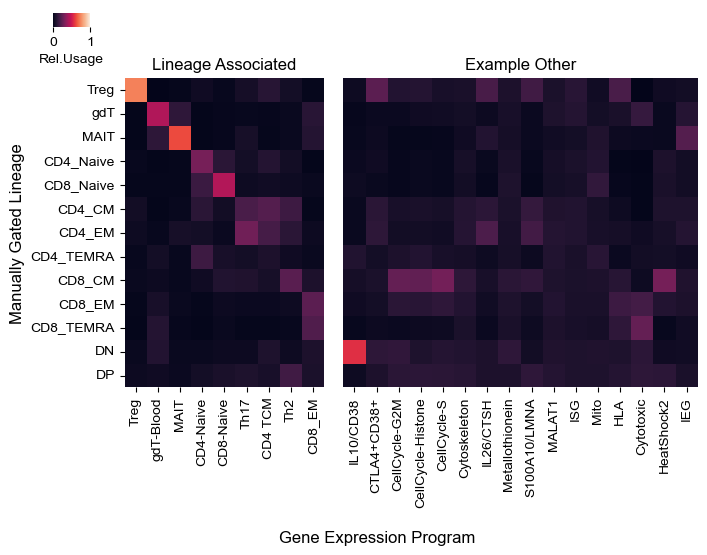

In [358]:
cluster = tcat_usage_ren.groupby(label).mean()

lineage_order = ['Treg', 'gdT', 'MAIT','CD4_Naive',  'CD8_Naive', 'CD4_CM', 'CD4_EM', 'CD4_TEMRA',  'CD8_CM', 'CD8_EM',  'CD8_TEMRA',
                 'DN', 'DP',  ]


max_usage = cluster.max(axis=0).sort_values(ascending=False)


lineage_geps = ['Treg', 'gdT-Blood', 'MAIT', 'CD4-Naive', 'CD8-Naive', 'Th17',  'CD4 TCM', 'Th2','CD8_EM']
other_geps = [ 'IL10/CD38', 'CTLA4+CD38+',
 'CellCycle-G2M',
 'CellCycle-Histone',
 'CellCycle-S',
 'Cytoskeleton',
 'IL26/CTSH',
 'Metallothionein',
'S100A10/LMNA', 'MALAT1',  'ISG', 'Mito', 'HLA',  'Cytotoxic',  'HeatShock2', 'IEG']
gep_order = lineage_geps + other_geps

cluster = cluster.loc[lineage_order, gep_order]


cluster_norm = cluster.div(cluster.sum(axis=0), axis=1)



frac_lineage = (len(lineage_geps) / len(lineage_geps+other_geps))
frac_other = 1-frac_lineage



fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(2, 3, width_ratios=[0.05, frac_lineage, frac_other], height_ratios=[.1,.9], wspace=0.1, bottom=0.25)

# Colorbar axis
top_ax = fig.add_subplot(gs[0, 0:2])
lin_ax = fig.add_subplot(gs[1,1])
other_ax = fig.add_subplot(gs[1, 2])
top_ax.axis('off')


cax = top_ax.inset_axes([-0.1, .5, 0.15, 0.4], transform=top_ax.transAxes)
#fig.colorbar(scim, ax=axes[x,y], cax=cax, orientation='horizontal')



sns.heatmap(cluster_norm.loc[:,lineage_geps], ax=lin_ax, cbar_ax=cax, xticklabels=True, cbar_kws={'label': 'Rel.Usage', 'orientation':'horizontal',
                                                                               'ticks':[0,1], 'shrink':0.1, 'aspect':30}, vmin=0, vmax=1)
sns.heatmap(cluster_norm.loc[:,other_geps], ax=other_ax, cbar=False, vmin=0, vmax=1, xticklabels=True)
other_ax.set_yticks([])
lin_ax.set_ylabel('Manually Gated Lineage', fontsize=12)
other_ax.set_ylabel('')
fig.text(0.5, 0, 'Gene Expression Program', ha='center', va='center', fontsize=12)

lin_ax.set_title('Lineage Associated', fontsize=12)
other_ax.set_title('Example Other', fontsize=12)

plt.savefig(os.path.join(figdir, 'LineageAssociate_COMBAT_Relative.png'))
plt.savefig(os.path.join(figdir, 'LineageAssociate_COMBAT_Relative.pdf'))

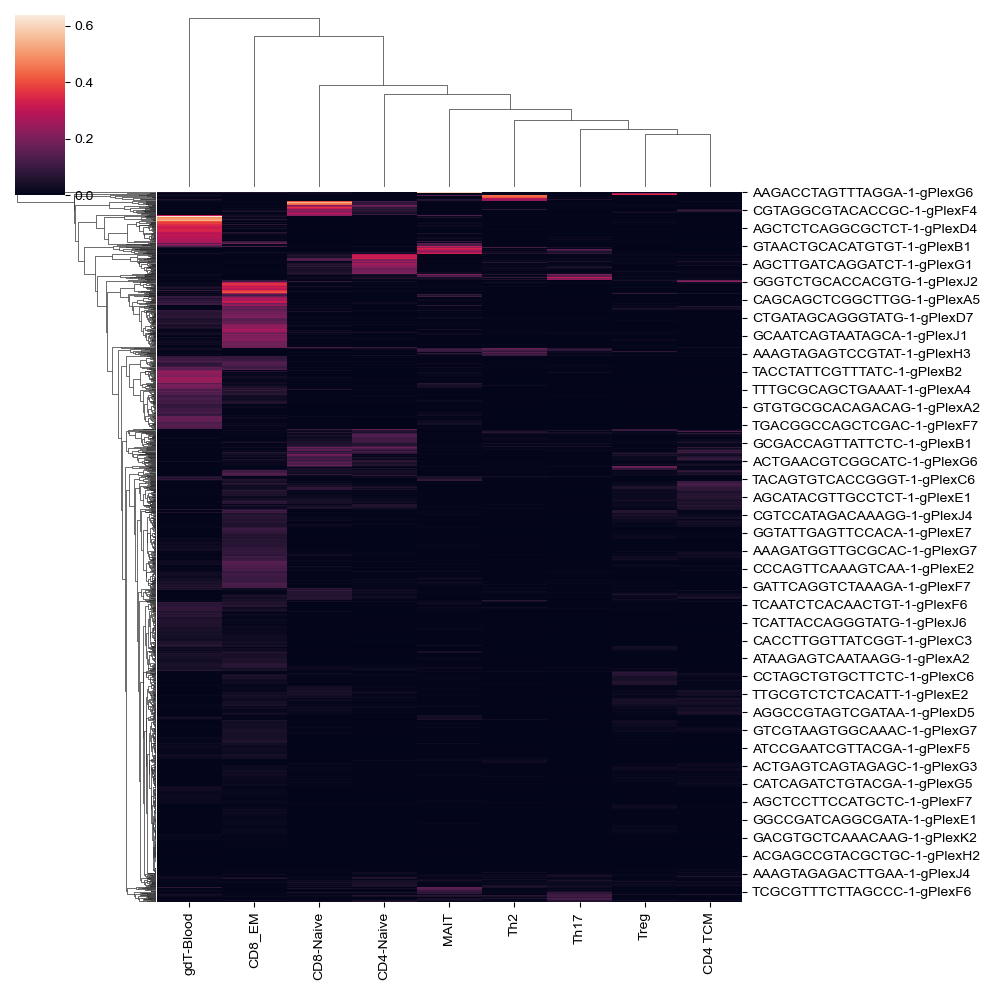

In [280]:
geeps = ['Treg',
 'gdT-Blood',
 'MAIT',
 'CD4-Naive',
 'CD8-Naive',
 'Th17',
 'CD4 TCM',
 'Th2',
 'CD8_EM']
sns.clustermap(tcat_usage_ren.loc[label=='DN', geeps])

In [322]:
Z = tcat_usage_ren.drop('IL10/CD38', axis=1)
Z = Z.div(Z.sum(axis=1), axis=0)

In [351]:
pd.crosstab(label, tcat_usage_ren['IL10/CD38']>.1)

IL10/CD38   False  True
0                      
CD4_CM      98274   227
CD4_EM      40655   114
CD4_Naive  114818   430
CD4_TEMRA    1068    41
CD8_CM       9578   128
CD8_EM      33019   260
CD8_Naive   25306   220
CD8_TEMRA   36666   181
DN            945   441
DP          12917   127
MAIT         6033    15
Treg        13220    38
gdT          6198     6

Text(0.5, 1.0, 'Lineage GEP Usage')

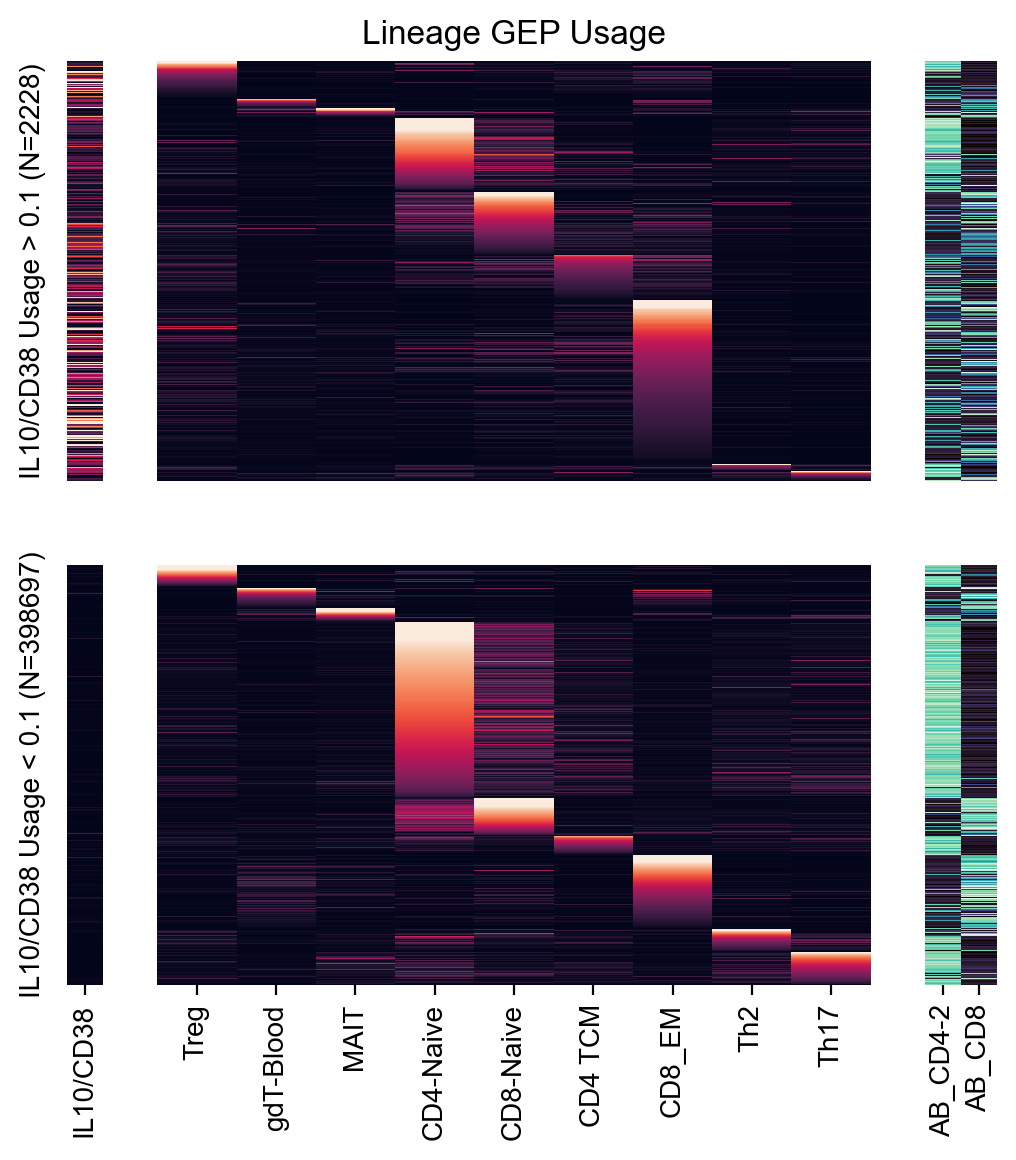

In [375]:
geeps = ['Treg',
 'gdT-Blood',
 'MAIT',
 'CD4-Naive',
 'CD8-Naive',
 'CD4 TCM',
 'CD8_EM',
        'Th2',  'Th17']

cmap2 = sns.color_palette("mako", as_cmap=True)

fig = plt.figure(figsize=(6, 6), dpi=200)   
gs = gridspec.GridSpec(2, 3, width_ratios=[0.05, 1, .1], height_ratios=[1, 1])

# Create the subplots using GridSpec
high_il10_gep_ax = fig.add_subplot(gs[0, 0])
high_il10_lineage_ax = fig.add_subplot(gs[0, 1])
low_il10_gep_ax = fig.add_subplot(gs[1, 0])
low_il10_lineage_ax = fig.add_subplot(gs[1, 1])

high_il10_marker_ax = fig.add_subplot(gs[0, 2])
low_il10_marker_ax = fig.add_subplot(gs[1, 2])


ind = tcat_usage_ren['IL10/CD38']>0.1
Z_filt = Z.loc[ind, geeps]

lineage_max = Z_filt.idxmax(axis=1)

order = []
for g in geeps:
    cells = lineage_max==g
    order += list(Z_filt.loc[cells, g].sort_values(ascending=False).index)
  
nhigh = len(order)

sns.heatmap(Z_filt.loc[order, geeps], ax=high_il10_lineage_ax, yticklabels=False, xticklabels=False, cbar=False, vmax=0.5)
sns.heatmap(tcat_usage_ren.loc[order, 'IL10/CD38'].values.reshape(-1, 1), ax=high_il10_gep_ax, yticklabels=False, xticklabels=False, cbar=False, vmax=0.5)
sns.heatmap(unsmoothed_markers.loc[order, ['AB_CD4-2', 'AB_CD8']], ax=high_il10_marker_ax, yticklabels=False, xticklabels=False, cbar=False, cmap=cmap2, vmin=0, vmax=3)




ind = tcat_usage_ren['IL10/CD38']<0.1
Z_filt = Z.loc[ind, geeps]


lineage_max = Z_filt.idxmax(axis=1)

order = []
for g in geeps:
    cells = lineage_max==g
    order += list(Z_filt.loc[cells, g].sort_values(ascending=False).index)

nlow = len(order)

    
sns.heatmap(Z_filt.loc[order, geeps], ax=low_il10_lineage_ax, yticklabels=False, xticklabels=True, cbar=False, vmax=0.5)
sns.heatmap(tcat_usage_ren.loc[order, 'IL10/CD38'].values.reshape(-1, 1), ax=low_il10_gep_ax, yticklabels=False, xticklabels=False, cbar=False, vmax=0.5)
sns.heatmap(unsmoothed_markers.loc[order, ['AB_CD4-2', 'AB_CD8']], ax=low_il10_marker_ax, yticklabels=False, xticklabels=True, cbar=False, cmap=cmap2, vmin=0, vmax=3)

low_il10_gep_ax.set_xticks([0.5])
low_il10_gep_ax.set_xticklabels(['IL10/CD38'], rotation=90)

high_il10_gep_ax.set_ylabel('IL10/CD38 Usage > 0.1 (N=%d)' % nhigh)
low_il10_gep_ax.set_ylabel('IL10/CD38 Usage < 0.1 (N=%d)' % nlow)

high_il10_lineage_ax.set_title('Lineage GEP Usage')







Text(129.16666666666666, 0.5, 'IL10/CD38 Usage < 0.1 (N=398697)')

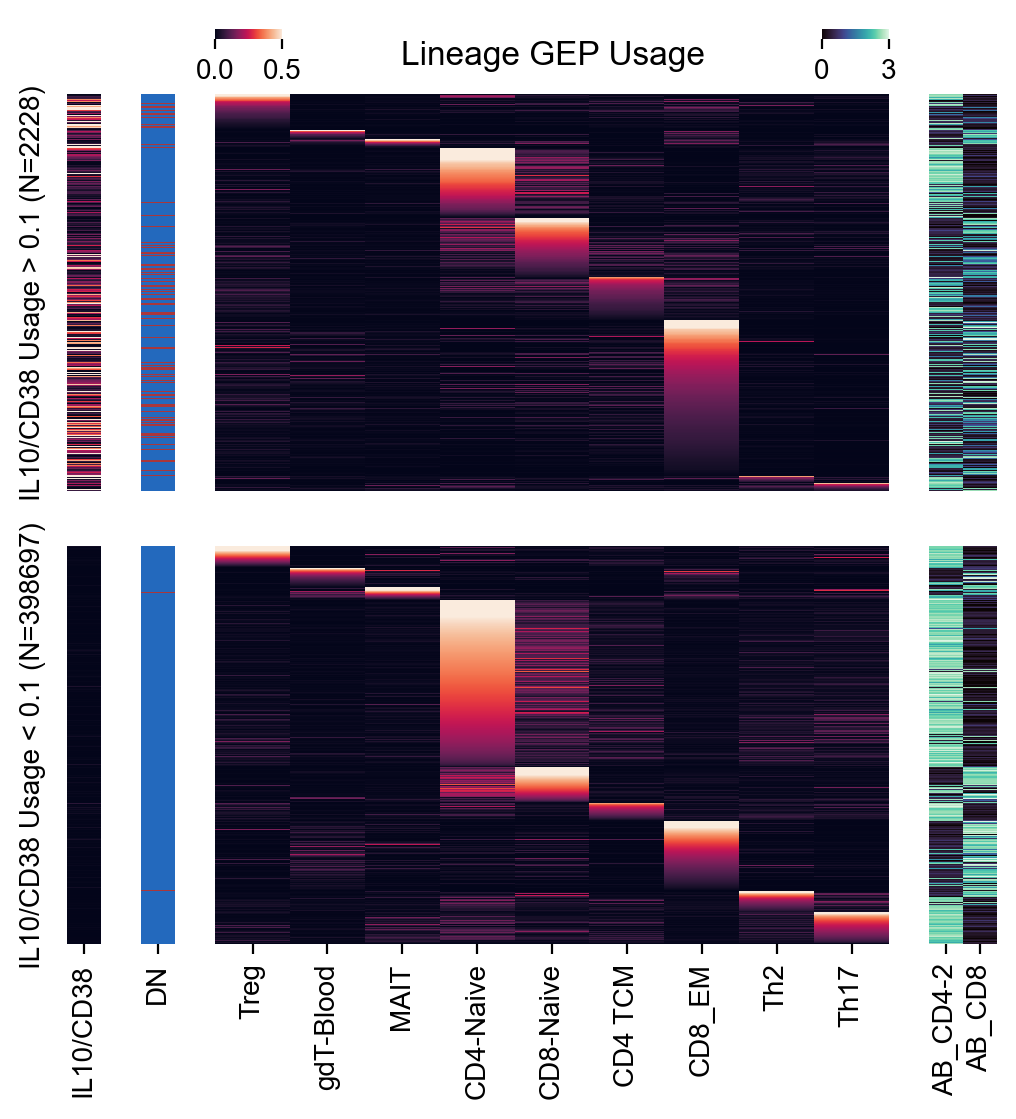

In [436]:
geeps = ['Treg',
 'gdT-Blood',
 'MAIT',
 'CD4-Naive',
 'CD8-Naive',
 'CD4 TCM',
 'CD8_EM',
        'Th2',  'Th17']

cmap2 = sns.color_palette("mako", as_cmap=True)
cmap3= sns.color_palette("vlag", as_cmap=True)

fig = plt.figure(figsize=(6, 6), dpi=200)   
gs = gridspec.GridSpec(3, 4, width_ratios=[0.05, 0.05, 1, .1], height_ratios=[.05, 1, 1])

# Create the subplots using GridSpec

title_ax = fig.add_subplot(gs[0, 2])



high_il10_gep_ax = fig.add_subplot(gs[1, 0])
high_il10_dn_ax = fig.add_subplot(gs[1, 1])
high_il10_lineage_ax = fig.add_subplot(gs[1, 2])
high_il10_marker_ax = fig.add_subplot(gs[1, 3])

low_il10_gep_ax = fig.add_subplot(gs[2, 0])
low_il10_dn_ax = fig.add_subplot(gs[2, 1])
low_il10_lineage_ax = fig.add_subplot(gs[2, 2])
low_il10_marker_ax = fig.add_subplot(gs[2, 3])


ind = tcat_usage_ren['IL10/CD38']>0.1
Z_filt = Z.loc[ind, geeps]

lineage_max = Z_filt.idxmax(axis=1)

order = []
for g in geeps:
    cells = lineage_max==g
    order += list(Z_filt.loc[cells, g].sort_values(ascending=False).index)
  
nhigh = len(order)


cbar_ax = title_ax.inset_axes([0, 0, .1, 0.5], transform=title_ax.transAxes)
cbar2_ax = title_ax.inset_axes([.9, 0, .1, 0.5], transform=title_ax.transAxes)

title_ax.axis('off')


sns.heatmap(Z_filt.loc[order, geeps], ax=high_il10_lineage_ax, yticklabels=False, xticklabels=False, cbar=True, vmax=0.5,
            cbar_ax=cbar_ax, cbar_kws={'orientation':'horizontal', 'ticks':[0,.5]})
cax.set_xticks([0, .5])
cax.set_xticklabels([0, .5], fontsize=6)
plt.figtext(x=.53, y=.85, s='Lineage GEP Usage', fontsize=12, ha='center', va='center', zorder=10)
sns.heatmap(tcat_usage_ren.loc[order, 'IL10/CD38'].values.reshape(-1, 1), ax=high_il10_gep_ax, yticklabels=False, xticklabels=False, cbar=False, vmax=0.5)
sns.heatmap((label.loc[order]=='DN').astype(int).values.reshape(-1, 1), ax=high_il10_dn_ax, yticklabels=False, xticklabels=False, cbar=False, cmap=cmap3)
sns.heatmap(unsmoothed_markers.loc[order, ['AB_CD4-2', 'AB_CD8']], ax=high_il10_marker_ax, yticklabels=False, xticklabels=False, cbar=True, cbar_ax=cbar2_ax,
            cbar_kws={'orientation':'horizontal', 'ticks':[0,3]}, cmap=cmap2, vmin=0, vmax=3)




ind = tcat_usage_ren['IL10/CD38']<0.1
Z_filt = Z.loc[ind, geeps]


lineage_max = Z_filt.idxmax(axis=1)

order = []
for g in geeps:
    cells = lineage_max==g
    order += list(Z_filt.loc[cells, g].sort_values(ascending=False).index)

nlow = len(order)

    
sns.heatmap(Z_filt.loc[order, geeps], ax=low_il10_lineage_ax, yticklabels=False, xticklabels=True, cbar=False, vmax=0.5)
sns.heatmap(tcat_usage_ren.loc[order, 'IL10/CD38'].values.reshape(-1, 1), ax=low_il10_gep_ax, yticklabels=False, xticklabels=False, cbar=False, vmax=0.5)
sns.heatmap((label.loc[order]=='DN').astype(int).values.reshape(-1, 1), ax=low_il10_dn_ax, yticklabels=False, xticklabels=False, cbar=False, vmax=0.5,  cmap=cmap3)
sns.heatmap(unsmoothed_markers.loc[order, ['AB_CD4-2', 'AB_CD8']], ax=low_il10_marker_ax, yticklabels=False, xticklabels=True, cbar=False, cmap=cmap2, vmin=0, vmax=3)

low_il10_gep_ax.set_xticks([0.5])
low_il10_gep_ax.set_xticklabels(['IL10/CD38'], rotation=90)


low_il10_dn_ax.set_xticks([0.5])
low_il10_dn_ax.set_xticklabels(['DN'], rotation=90)

high_il10_gep_ax.set_ylabel('IL10/CD38 Usage > 0.1 (N=%d)' % nhigh)
low_il10_gep_ax.set_ylabel('IL10/CD38 Usage < 0.1 (N=%d)' % nlow)

4